In [1]:
#Retrieves Commodity Prices from http://tradingeconomics.com/commodities

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

clean_rates = lambda x: round(float(re.sub(r'[^0-9.]', '', x)), 3)

currencies = pd.read_html('http://tradingeconomics.com/currencies')[2]
currencies

Unnamed: 0 America       Price      Day       %   Weekly Monthly     YoY  \
0          NaN  USDCAD     1.28736   0.0010  -0.08%   -1.86%  -0.55%   2.46%   
1          NaN  USDMXN    20.56410   0.0321   0.16%   -1.09%   2.59%   2.32%   
2          NaN  USDBRL     5.47140   0.0000   0.00%    0.89%   5.34%   5.21%   
3          NaN     DXY   106.84910   0.2269  -0.21%   -1.56%   2.55%  15.11%   
4          NaN  USDARS   129.38000   0.2400   0.19%    1.22%   4.62%  34.27%   
5          NaN  USDCOP  4344.25000   0.0000   0.00%   -3.09%   8.20%  12.36%   
6          NaN  USDCLP   925.53000   0.5000  -0.05%  -11.80%   4.12%  22.86%   
7          NaN  USDPEN     3.87730   0.0158   0.41%   -1.64%   4.53%  -1.69%   
8          NaN  USDCUC    24.00000   0.0000   0.00%    0.00%   0.00%   0.00%   
9          NaN  USDDOP    54.28000   0.0000   0.00%   -0.46%  -0.46%  -4.65%   
10         NaN  USDGTQ     7.72500   0.0000   0.00%   -0.06%  -0.19%  -0.27%   
11         NaN  USDURY    41.99000   0.0000   0.00%    2.24%   5.48%  -4.15%   
12         NaN  USDCRC   670.50000   0.0000   0.00%   -1.08%  -2.87%   9.12%   
13         NaN  USDPAB     1.00000   0.0000   0.00%    0.00%   0.00%   0.00%   
14         NaN  USDBOB     6.80000   0.0000   0.00%    0.00%  -0.15%  -0.29%   
15         NaN  USDPYG  6841.51000  16.9300  -0.25%   -0.27%  -0.46%  -0.58%   
16         NaN  USDSVC     8.74950   0.0000   0.00%    0.00%   0.00%   0.00%   
17         NaN  USDTTD     6.76230   0.0000   0.00%    0.05%  -0.07%   0.66%   
18         NaN  USDHNL    24.38690   0.0000   0.00%    0.07%   0.18%   3.01%   
19         NaN  USDJMD   151.18000   0.0900   0.06%    0.14%   0.08%  -1.55%   
20         NaN  USDNIO    35.71000   0.0000   0.00%    0.00%   0.00%   1.42%   
21         NaN  USDHTG   114.36100   0.0000   0.00%    0.33%   0.32%  22.97%   
22         NaN  USDBSD     1.00000   0.0000   0.00%    0.00%   0.00%   0.00%   
23         NaN  USDSRD    22.59800   0.0310   0.14%    0.90%   3.66%   6.86%   
24         NaN  USDGYD   207.98000   0.2100  -0.10%    0.00%   0.00%   0.00%   
25         NaN  USDKYD     0.82500   0.0000   0.00%    0.00%   0.00%   0.61%   
26         NaN  USDVES     5.71420   0.0273   0.48%    1.26%   4.80%  54.30%   

      Date  
0   Jul/21  
1   Jul/21  
2   Jul/21  
3   Jul/21  
4   Jul/20  
5   Jul/21  
6   Jul/21  
7   Jul/20  
8   Jul/20  
9   Jul/21  
10  Jul/21  
11  Jul/21  
12  Jul/21  
13  Jul/20  
14  Jul/21  
15  Jul/20  
16  Jul/21  
17  Jul/21  
18  Jul/21  
19  Jul/21  
20  Jul/21  
21  Jul/20  
22  Jul/21  
23  Jul/20  
24  Jul/20  
25  Jul/21  
26  Jul/20

In [39]:
#Retrieves Commodity Prices from http://tradingeconomics.com/commodities

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

clean_rates = lambda x: round(float(re.sub(r'[^0-9.]', '', x)), 3)

energy = pd.read_html('http://tradingeconomics.com/commodities')[0]
metals = pd.read_html('http://tradingeconomics.com/commodities')[1]
agricultural = pd.read_html('http://tradingeconomics.com/commodities')[2]
industrial = pd.read_html('http://tradingeconomics.com/commodities')[3]
livestock = pd.read_html('http://tradingeconomics.com/commodities')[4]
index = pd.read_html('http://tradingeconomics.com/commodities')[5]
print(energy)
print(metals)
print(index)

                   Energy      Price      Day       %   Weekly  Monthly  \
0       Crude Oil USD/Bbl    96.3200   3.5600  -3.56%    3.76%   -7.38%   
1           Brent USD/Bbl   103.9500   2.9700  -2.78%    4.89%   -4.33%   
2   Natural gas USD/MMBtu     7.9010   0.1060  -1.32%   19.71%   14.97%   
3        Gasoline USD/Gal     3.1502   0.1252  -3.82%   -1.15%  -15.54%   
4     Heating Oil USD/Gal     3.5816   0.0227  -0.63%   -1.86%  -16.33%   
5              Coal USD/T   408.6000   9.6000   2.41%   -5.42%    4.77%   
6         TTF Gas EUR/MWh   155.6000   0.5600   0.36%  -11.10%   22.35%   
7          UK Gas GBp/thm   313.0100  44.6900  16.66%   32.17%   70.47%   
8         Ethanol USD/Gal     2.5200   0.0200  -0.79%    1.41%  -10.48%   
9           Naphtha USD/T   769.7300   5.1300  -0.66%   -0.16%   -3.77%   
10        Propane USD/Gal     1.1400   0.0000  -0.30%   -0.02%   -5.83%   
11        Uranium USD/Lbs    46.7000   0.0000   0.00%   -1.68%   -1.58%   
12         Methanol CNY/T

In [33]:
#pd.read_html('http://tradingeconomics.com/calendar')
#pd.read_html('http://investing.com')
#pd.read_html('https://www.macrotrends.net/stocks/charts/NET/cloudflare/income-statement?freq=Q')

In [42]:
# Retrieves Economic Calendar from http://tradingeconomics.com/calendar

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine
import warnings
import requests

warnings.filterwarnings('ignore')

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df



dbase = "visiblealpha_laptop"

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

clean_rates = lambda x: re.sub(r'[^0-9.-]', '', x)
clean_rates2 = lambda x: re.sub(r'[^B]', '1', x)
clean_rates3 = lambda x: list(pd.Series(x).replace({'B': '1000'}))[0]
extract_date_str = lambda x: x.split(' ')
compose_date = lambda x: x[1] + ',' + x[2] + ',' + x[3]
str_to_date = lambda x: datetime.strptime(x, "%B,%d,%Y").date()
str_to_date2 = lambda x: datetime.strptime(x, "%d-%b-%y").date()
str_to_date3 = lambda x: datetime.strptime(x, "%Y-%m-%d").date()
str_to_date4 = lambda x: datetime.strptime(x, "%m/%d/%Y").date()
str_to_float = lambda x: float(x)
float_to_str = lambda x: str(x)
clean_name = lambda x: x[:-5]
clean_name2 = lambda x: x.split(' ')
clean_name3 = lambda x: list(pd.Series(x).replace({'Prel': '', 'Final': '', 'Rev': '', 'Flash': '' }))
clean_name4 = lambda x: ' '.join(x)
clean_last = lambda x: x[-1]
clean_last2 = lambda x: list(pd.Series(x).replace({' ': ''}))[0]
clean_last3 = lambda x: x[:-1]
#clean_last4 = lambda x: list(pd.Series(x).replace({'0': ''}))[0]
clean_last4 = lambda x: re.sub(r'[0-9]', '', x)
clean_mess1a = lambda x: x.split('QOQ')[0]
clean_mess1b = lambda x: x.split('QOQ')[1]
clean_mess2a = lambda x: x.split('YOY')[0]
clean_mess2b = lambda x: x.split('YOY')[1]
clean_mess3a = lambda x: x.split('MOM')[0]
clean_mess3b = lambda x: x.split('MOM')[1]
clean_mess = lambda x: x[-3:]


name_upper = lambda x: x.upper()
fill_na = lambda x: list(pd.Series(x).replace({'': np.nan, None: np.nan}))[0]

today = date.today()
url = 'http://tradingeconomics.com/calendar'

r = requests.get(url)
todays_calendar = pd.read_html(r.text)
test_cal = pd.DataFrame(todays_calendar[1])

dates_list = test_cal.columns.values.tolist()[0]
Dates_df = pd.DataFrame(dates_list, columns = ['Dates'])
dates_list = list(Dates_df['Dates'].map(extract_date_str).map(compose_date).map(str_to_date))

print(dates_list)
Remove_Date = input("Remove Date (empty for none): (YY/MM/DD)")

if (Remove_Date != ''):
    Remove_Date = datetime.strptime(Remove_Date, "%y/%m/%d").date()
    if (Remove_Date in dates_list):
        dates_list.remove(Remove_Date)
        print(dates_list)
        Remove_Date = input("Remove Date (empty for none): (YY/MM/DD)")
        if (Remove_Date != ''):
            Remove_Date = datetime.strptime(Remove_Date, "%y/%m/%d").date()
            if (Remove_Date in dates_list):
                dates_list.remove(Remove_Date)

test_cal.columns = ['Time', 'Country', 'Economic Data', 'Actual', 'Previous', 'Consensus', 'Forecast', 'Dummy0', 'Dummy1']
test_cal.dropna(how = 'all', axis = 1, inplace = True)
test_cal['Dates'] = today
prev = ''
day_count = 0
element_count = 0
test_cal['Time'].fillna(method = 'ffill', inplace = True)

for element in test_cal['Time']:
    
    if (prev != '') & (type(prev) != float):
        jump = True
        element_number_prev = int(prev[:2])
        element_str_prev = prev[-2:]
        element_number_curr = int(element[:2])
        element_str_curr = element[-2:]
        
        if (element_number_prev == 12):
            element_number_prev = 0
        if (element_number_curr == 12):
            element_number_curr = 0
        
        if (element_str_prev == 'PM'):
            element_number_prev = element_number_prev + 12
        if (element_str_curr == 'PM'):
            element_number_curr = element_number_curr + 12
        if (element_number_curr < element_number_prev):
            if (element_str_curr != element_str_prev) | (1):
                day_count = day_count + 1
                jump = False
        if (element_number_curr - element_number_prev > 17) & (jump) & (current_date.weekday() == 5):
            day_count = day_count + 1
        

    day_count = min(len(dates_list) - 1, day_count)
    current_date = dates_list[day_count]
    test_cal['Dates'][element_count] = current_date  
    prev = element
    element_count = element_count + 1
test_cal.index = test_cal['Dates']
test_cal.drop(['Dates'], axis = 1, inplace = True)

test_cal['Economic Data'] = test_cal['Economic Data'].map(clean_name).map(clean_name2).map(clean_name3).map(clean_name4).map(name_upper)
test_cal['Dummy'] = test_cal['Economic Data'].map(clean_last).map(clean_last2)
test_cal['Economic Data'] = test_cal['Economic Data'].map(clean_last3) + test_cal['Dummy']

test_cal['Dummy'] = test_cal['Economic Data'].map(clean_last).map(clean_last4)
test_cal['Economic Data'] = test_cal['Economic Data'].map(clean_last3) + test_cal['Dummy']

test_cal['Dummy'] = test_cal['Economic Data'].map(clean_last).map(clean_last2)
test_cal['Economic Data'] = test_cal['Economic Data'].map(clean_last3) + test_cal['Dummy']
test_cal['Dummy'] = test_cal['Economic Data'].map(clean_last).map(clean_last2)
test_cal['Economic Data'] = test_cal['Economic Data'].map(clean_last3) + test_cal['Dummy']

test_cal['Dummy'] = test_cal['Actual'].map(float_to_str).map(clean_last)
test_cal['Dummy'] = test_cal['Dummy'].map(clean_rates2).map(clean_rates3).map(str_to_float)
test_cal['Actual'] = test_cal['Actual'].map(float_to_str).map(clean_rates).map(fill_na).map(str_to_float) * test_cal['Dummy']

test_cal['Dummy2'] = test_cal['Economic Data'].map(clean_mess)
test_cal['Economic Data'] = test_cal['Economic Data'] + 'QOQ'
test_cal['Dummy'] = test_cal['Economic Data'].map(clean_mess1b)
test_cal['Economic Data'] = test_cal['Economic Data'].map(clean_mess1a)
test_cal['Dummy'][test_cal['Dummy'] != ''] = 'QOQ'
test_cal['Dummy2'][test_cal['Dummy2'] != 'QOQ'] = ''
test_cal['Economic Data'] = test_cal['Economic Data'] + test_cal['Dummy'] + test_cal['Dummy2']

test_cal['Dummy2'] = test_cal['Economic Data'].map(clean_mess)
test_cal['Economic Data'] = test_cal['Economic Data'] + 'YOY'
test_cal['Dummy'] = test_cal['Economic Data'].map(clean_mess2b)
test_cal['Economic Data'] = test_cal['Economic Data'].map(clean_mess2a)
test_cal['Dummy'][test_cal['Dummy'] != ''] = 'YOY'
test_cal['Dummy2'][test_cal['Dummy2'] != 'YOY'] = ''
test_cal['Economic Data'] = test_cal['Economic Data'] + test_cal['Dummy'] + test_cal['Dummy2']

test_cal['Dummy2'] = test_cal['Economic Data'].map(clean_mess)
test_cal['Economic Data'] = test_cal['Economic Data'] + 'MOM'
test_cal['Dummy'] = test_cal['Economic Data'].map(clean_mess3b)
test_cal['Economic Data'] = test_cal['Economic Data'].map(clean_mess3a)
test_cal['Dummy'][test_cal['Dummy'] != ''] = 'MOM'
test_cal['Dummy2'][test_cal['Dummy2'] != 'MOM'] = ''
test_cal['Economic Data'] = test_cal['Economic Data'] + test_cal['Dummy'] + test_cal['Dummy2']

test_cal.drop(['Dummy', 'Dummy2'], axis = 1, inplace = True)

ow = False
owr = input("Overwrite? (Y/N): ").upper()
if (owr == 'Y'):
    ow = True
    
up = False
upd = input("Update csv? (Y/N): ").upper()
if (upd == 'Y'):
    up = True
    
to = False
tdo = input("Today only? (Y/N): ").upper()
if (tdo == 'Y'):
    to = True

prev_country = ''
country_list = test_cal['Country']
c = 0
regions_list = ['KR', 'JP', 'CA', 'IT', 'EA', 'IN', 'BR', 'ES', 'DE', 'AU', 'CL', 'ZA', 'GR', 'FR', 'CH', 'NL', 'SE', 'SG', 'VN', 'TH', 'TW', 'MY', 'ID', 'GB', 'US', 'HK', 'MX', 'PH', 'CN']

for cur_country in country_list:
    if (((test_cal.index[c] <= today) & (not to)) | ((test_cal.index[c] == today) & (to))) & (test_cal['Actual'].replace({np.nan: 'z'})[c] != 'z') & (test_cal['Country'][c] in regions_list):
        if (prev_country != cur_country):
            country_macro = pd.read_csv(r'C:/Users/Utilizador/OneDrive/Documentos/Malta/Systematic/' + cur_country + '_macro.csv')
            try:
                country_macro['Date'] = country_macro['Date'].map(str_to_date2)
            except:
                try:
                    country_macro['Date'] = country_macro['Date'].map(str_to_date3)
                except:
                    country_macro['Date'] = country_macro['Date'].map(str_to_date4)
            
            country_macro_bu_df = Set_DF(country_macro)
            country_macro_bu_df = DD_Index(country_macro_bu_df)
            country_macro_df_name = cur_country.lower() + '_macro'
            if (country_macro_df_name in new_tables_list) & (not ow):
                query_macro = "SELECT * FROM " + country_macro_df_name
                country_macro_df = pd.read_sql_query(query_macro, engine)
                country_macro_df = Set_DF(country_macro_df)
                country_macro_df = DD_Index(country_macro_df)
                country_macro_df.columns = country_macro_bu_df.columns
            else:
                country_macro_df = country_macro_bu_df
            country_macro_df.sort_index(ascending = True, inplace = True)
            last_date = country_macro_df.index[-1]
            new_date_range = pd.date_range(last_date, today, freq = 'b').date
            for new_date in new_date_range:
                country_macro_df.loc[new_date] = country_macro_df.loc[last_date]

        if (test_cal['Economic Data'][c] in country_macro_df.columns):
            country_macro_df[test_cal['Economic Data'][c]] = country_macro_df.loc[country_macro_df.index < test_cal.index[c]][test_cal['Economic Data'][c]].values.tolist() + [test_cal['Actual'][c]] * len(country_macro_df.index[country_macro_df.index >= test_cal.index[c]])
            print(test_cal.index[c].strftime('%d-%b-%y') + ' ' + cur_country + ' ' + test_cal['Economic Data'][c] + ' RECORDED')
        else:
            print('')
            print(test_cal.index[c].strftime('%d-%b-%y') + ' ' + cur_country + ' ' + test_cal['Economic Data'][c] + ' NOT SAVED ****************')
            print('')
        if (c == len(test_cal.index)) | (test_cal['Country'][c + 1] != test_cal['Country'][c]) | (test_cal['Actual'].replace({np.nan: 'z'})[c + 1] == 'z'):
#            country_macro_df.sort_index(ascending = True, inplace = True)
#            country_macro_df.to_sql(country_macro_df_name, engine, index = True, if_exists = 'replace')
            if (up):
                pass
#               country_macro_df.to_csv(r'C:/Users/Utilizador/OneDrive/Documentos/Malta/Systematic/' + cur_country + '_macro.csv')

        prev_country = cur_country
    c = c + 1

print('Todays Calendar')
print('')
test_cal[test_cal.index == today + timedelta(0)]

ValueError: No tables found

In [8]:
## Manual Updates of Macro Databases

import pandas as pd
import math
import numpy as np
import os
import csv
import yfinance as yf
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
import tkinter as tk
import re
from datetime import datetime
from datetime import timedelta
from datetime import date
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
        
    return merged_df

def on_selection(value):
    global choice
    choice = value  # store the user's choice
    root.destroy()  # close window
    
def on_pre_selection(value):
    global pre_choice
    pre_choice = value  # store the user's choice
    root.destroy()  # close window
    
dbase = "visiblealpha_laptop"

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

to_date = lambda x: datetime.strptime(x, "%m/%d/%Y").date()

today = date.today()
if (today.weekday() == 5):
    today = today - timedelta(1)
elif (today.weekday() == 6):
    today = today - timedelta(2)

regions_list = ['KR', 'JP', 'CA', 'IT', 'EA', 'IN', 'BR', 'ES', 'DE', 'AU', 'CL', 'ZA', 'GR', 'FR', 'CH', 'NL', 'SE', 'SG', 'VN', 'TH', 'TW', 'MY', 'ID', 'GB', 'US', 'HK', 'MX', 'PH', 'CN']
indices = {'KR': 'US', 'JP': 'US', 'CA': 'US', 'IT': 'EA', 'EA': 'EA', 'IN': 'US', 'BR': 'BR', 'ES': 'EA', 'DE': 'EA', 'AU': 'US', 'CL': 'US', 'ZA': 'US', 'GR': 'EA', 'FR': 'EA', 'CH': 'CN', 'NL': 'EA', 'SE': 'EA', 'SG': 'US', 'VN': 'CN', 'TH': 'CN', 'TW': 'US', 'MY': 'US', 'ID': 'US', 'GB': 'EA', 'US': 'US', 'HK': 'CH', 'MX': 'US', 'PH': 'US', 'CN': 'CN'}

prev_reg = ''
update = ''
valid = True

while (valid):
    region = input("Input region (Invalid will terminate, NULL to repeat): ").upper()
    if (region == ''):
        region = prev_reg
    if (region != prev_reg) & (prev_reg != ''):
        country_macro_df.sort_index(ascending = True, inplace = True)
        country_macro_df.to_sql(country_macro_df_name, engine, index = True, if_exists = 'replace')
        if (update != 'N') & (prev_reg != ''):
            country_macro_df.to_csv(r'C:/Users/Utilizador/OneDrive/Documentos/Malta/Systematic/' + prev_reg + '_macro.csv')
            print('CSV saved')
        
    country_macro_df_name = region.lower() + '_macro'
    if (country_macro_df_name in new_tables_list):
        if (region != prev_reg):
            query_macro = "SELECT * FROM " + country_macro_df_name
            country_macro_df = pd.read_sql_query(query_macro, engine)
            country_macro_df = Set_DF(country_macro_df)
            country_macro_df = DD_Index(country_macro_df)
            load_csv = input("Load CSV (Y/N)? ").upper()
            if (load_csv == 'Y'):
                country_macro = pd.read_csv(r'C:/Users/Utilizador/OneDrive/Documentos/Malta/Systematic/' + region + '_macro.csv')
                country_macro_df = Set_DF(country_macro)
                country_macro_df = DD_Index(country_macro_df)
                country_macro_df.index = country_macro_df.T.columns.map(to_date)
            reports_lists = country_macro_df.columns.values.tolist() + ['']
            if (today not in country_macro_df.index):
                incl_d = input("Add today (Y/N)? ").upper()
                if (incl_d != 'N'):
                    country_macro_df.loc[today] = country_macro_df.iloc[-1]
            update = input("Update CSV (Y/N)? ").upper()
            valid = True
    else:
        valid = False
        print('Invalid Region')

    if (valid):
        pre_choice_list = sorted(reports_lists)
        root = tk.Tk()
        tkvar = tk.StringVar(root)
        popupMenu = tk.OptionMenu(root, tkvar, *pre_choice_list, command = on_pre_selection)
        tk.Label(root, text = "Available Dataseries:").grid(row = 0, column = 0)
        popupMenu.grid(row = 1, column = 0)
        root.mainloop()
        
        if (pre_choice != ''):
            keep = True
            while (keep):            
                Start_Date = input("Enter Start Date: (YY/MM/DD)")
                if (Start_Date != ''):
                    try:
                        Start_Date = datetime.strptime(Start_Date, "%y/%m/%d").date()
                        keep = False
                    except:
                        print('enter date again...')
                        keep = True
                else:
                    Start_Date = today
                    keep = False

            list_new = []
            last_value = country_macro_df[pre_choice][-1]
            print(pre_choice)
            keep = True
            while (keep):
                new_value = input("Last Value: " + str(last_value) + " Enter New: ")
                if (new_value == ''):
                    new_value = last_value
                    keep = False
                else:
                    try:
                        new_value = float(new_value)
                        keep = False
                    except:
                        keep = True
                        print('enter value again...')
                print('')
            list_new.append(new_value)
            data_list = country_macro_df[pre_choice] [:country_macro_df.index.values.tolist().index(country_macro_df.index[country_macro_df.index <= Start_Date][-1])].values.tolist() + list_new * len(country_macro_df.index[country_macro_df.index.values.tolist().index(country_macro_df.index[country_macro_df.index <= Start_Date][-1]):])
            country_macro_df[pre_choice] = data_list
        prev_reg = region
        
country_macro_df

Input region (Invalid will terminate, NULL to repeat): CN
Load CSV (Y/N)? 
Add today (Y/N)? 
Update CSV (Y/N)? 
Enter Start Date: (YY/MM/DD)
INDUSTRIAL PROFITS (YTD) YOY
Last Value: 0.5 Enter New: -3.5

Input region (Invalid will terminate, NULL to repeat): TW
CSV saved
Load CSV (Y/N)? 
Add today (Y/N)? 
Update CSV (Y/N)? 
Input region (Invalid will terminate, NULL to repeat): MY
CSV saved
Load CSV (Y/N)? 
Add today (Y/N)? 
Update CSV (Y/N)? 
Input region (Invalid will terminate, NULL to repeat): TH
CSV saved
Load CSV (Y/N)? 
Add today (Y/N)? 
Update CSV (Y/N)? 
Enter Start Date: (YY/MM/DD)
EXPORTS YOY
Last Value: 7.0 Enter New: 1.1

Input region (Invalid will terminate, NULL to repeat): 
Enter Start Date: (YY/MM/DD)
IMPORTS YOY
Last Value: 8.9 Enter New: 9.9

Input region (Invalid will terminate, NULL to repeat): 
Enter Start Date: (YY/MM/DD)
BALANCE OF TRADE
Last Value: 260.0 Enter New: 390

Input region (Invalid will terminate, NULL to repeat): SE
CSV saved
Load CSV (Y/N)? 
Add toda

BOP OVERALL  BUDGET BAL  CA BAL  INFLATION RATE YOY  EXPORTS YOY  \
Date                                                                           
2005-01-31        27.33       25.18   60.33                -0.5         34.8   
2005-02-01        27.33       25.18   60.33                -0.5         34.8   
2005-02-02        27.33       25.18   60.33                -0.5         34.8   
2005-02-03        27.33       25.18   60.33                -0.5         34.8   
2005-02-04        27.33       25.18   60.33                -0.5         34.8   
...                 ...         ...     ...                 ...          ...   
2024-10-07       -52.49      -38.33  101.00                 2.5          6.4   
2024-10-18       -52.49      -38.33  101.00                 2.5          6.4   
2024-10-22       -52.49      -38.33  101.00                 2.2          6.4   
2024-10-25       -52.49      -38.33  101.00                 2.2          6.4   
2024-10-28       -52.49      -38.33  101.00                 2.2          4.7   

            FOREIGN RESERVES  GDP SA QOQ  GDP YOY  IMPORTS YOY  IP YOY  \
Date                                                                     
2005-01-31             124.7         2.0      8.2         37.2     NaN   
2005-02-01             124.7         2.0      8.2         37.2     NaN   
2005-02-02             124.7         2.0      8.2         37.2     NaN   
2005-02-03             124.7         2.0      8.2         37.2     NaN   
2005-02-04             124.7         2.0      8.2         37.2     NaN   
...                      ...         ...      ...          ...     ...   
2024-10-07             422.8         0.4      3.3          7.9     0.7   
2024-10-18             422.8         0.4      3.3          7.9     0.7   
2024-10-22             422.8         0.4      3.3          7.9     0.7   
2024-10-25             422.8         0.4      3.3          7.9     0.7   
2024-10-28             422.8         0.4      3.3          1.4     0.7   

            M1 YOY  M2 YOY  M3 YOY  PPI YOY  RETAIL SALES VALUE YOY  \
Date                                                                  
2005-01-31    18.1     1.6     1.5      NaN                     NaN   
2005-02-01    18.1     1.6     1.5      NaN                     NaN   
2005-02-02    18.1     1.6     1.5      NaN                     NaN   
2005-02-03    18.1     1.6     1.5      NaN                     NaN   
2005-02-04    18.1     1.6     1.5      NaN                     NaN   
...            ...     ...     ...      ...                     ...   
2024-10-07    -0.8     0.0    -0.1      2.3                   -11.8   
2024-10-18    -0.8     0.0    -0.1      2.3                   -11.8   
2024-10-22    -0.8     0.0    -0.1      2.3                   -11.8   
2024-10-25    -0.8     0.0    -0.1      2.3                   -11.8   
2024-10-28    -0.8     0.0    -0.1      2.3                   -11.8   

            RETAIL SALES VOLUMNE YOY  S&P GLOBAL PMI  BALANCE OF TRADE  \
Date                                                                     
2005-01-31                       NaN             NaN            -2.044   
2005-02-01                       NaN             NaN            -2.044   
2005-02-02                       NaN             NaN            -2.044   
2005-02-03                       NaN             NaN            -2.044   
2005-02-04                       NaN             NaN            -2.044   
...                              ...             ...               ...   
2024-10-07                      -4.9            50.0        -33100.000   
2024-10-18                      -4.9            50.0        -33100.000   
2024-10-22                      -4.9            50.0        -33100.000   
2024-10-25                      -4.9            50.0        -33100.000   
2024-10-28                      -4.9            50.0        -53200.000   

            UNEMPLOYMENT RATE SA  
Date                              
2005-01-31                   6.4  
2005-02-01      

Change base variable (Y/y or empty)? 
0 lag, 1y 10 best positive corrs: 
FACTORY ORDERS EX TRANSPORTATION    83.05
PPI YOY                             79.52
RICHMOND FED MANUFACTURING INDEX    72.22
ISM MANUFACTURING PMI               71.39
EXPORT PRICES MOM                   70.65
PCE PRICE INDEX MOM                 67.58
INFLATION RATE MOM                  62.08
Crude Oil USD/Bbl                   55.47
PPI MOM                             52.82
UNEMPLOYMENT RATE                   52.46
Name: 1y, dtype: object

0 lag, 1y 10 best negative corrs: 
HOUSING STARTS                -79.13
CB CONSUMER CONFIDENCE        -76.97
S&P GLOBAL SERVICES PMI       -70.92
INITIAL JOBLESS CLAIMS        -66.66
S&P GLOBAL COMPOSITE PMI      -57.76
CONSUMER CREDIT CHANGE        -51.77
CORE INFLATION RATE YOY       -47.68
CONSTRUCTION SPENDING MOM     -45.84
AVERAGE HOURLY EARNINGS MOM   -44.07
HOUSING STARTS MOM            -38.62
Name: 1y, dtype: object


0 lag, 2y 10 best positive corrs: 
FED INTEREST RAT

Name: 5y, dtype: object


0 LAG RESULTS:
                                     1y     2y     3y     5y
FED INTEREST RATE DEC             41.72  74.04  92.83  91.49
ISM MANUFACTURING PMI             71.39 -44.94  -90.6 -48.14
PARTICIPATION RATE                50.13  68.96  86.98  48.49
EXISTING HOME SALES               -0.94 -70.85 -93.57 -80.06
UNEMPLOYMENT RATE                 52.46  58.57  -64.3 -59.51
PPI YOY                           79.52 -69.06 -71.56  10.68
HOUSING STARTS                   -79.13 -54.63 -78.76  -7.72
INITIAL JOBLESS CLAIMS           -66.66 -46.47 -59.72 -42.88
NAHB HOUSING MARKET INDEX        -28.27 -30.03 -85.94 -69.32
EXPORT PRICES YOY                 52.14  -62.6 -79.76 -17.06
PHILADELPHIA FED PRICES PAID      49.92 -52.95  -88.1 -18.42
JOLTS JOB OPENINGS               -22.52 -75.47 -59.12  51.22
JOLTS JOB QUITS (NORMALIZE)      -36.83  -75.7 -80.12  15.54
AVERAGE WEEKLY HOURS              21.89 -46.84 -86.25 -46.08
ISM MANUFACTURING PRICES          31.88 -52.

6 lag, 3y 10 best positive corrs: 
PARTICIPATION RATE                         89.1
CHALLENGER JOB CUTS                       84.77
FED INTEREST RATE DEC                     78.26
CAPACITY UTILIZATION                      76.78
REAL PERSONAL SPENDING                    52.22
EMPLOYMENT COST - BENEFITS QO             48.67
EMPLOYMENT COST INDEX QO                  43.65
TOTAL VEHICLE SALES                       31.33
MICHIGAN 5 YEAR INFLATION EXPECTATIONS    31.29
CORE PCE PRICE INDEX YOY                  27.32
Name: 3y, dtype: object

6 lag, 3y 10 best negative corrs: 
NFIB BUSINESS OPTIMISM INDEX     -90.34
PHILADELPHIA FED CAPEX INDEX      -88.5
RETAIL SALES YOY                 -88.15
ISM MANUFACTURING NEW ORDERS     -87.19
UNEMPLOYMENT RATE                -85.52
UNDEREMPLOYMENT                  -83.55
ISM MANUFACTURING PMI             -83.0
MANUFACTURING PRODUCTION YOY      -81.3
DALLAS FED MANUFACTURING INDEX   -80.99
INDUSTRIAL PRODUCTION YOY        -80.15
Name: 3y, dtype: object



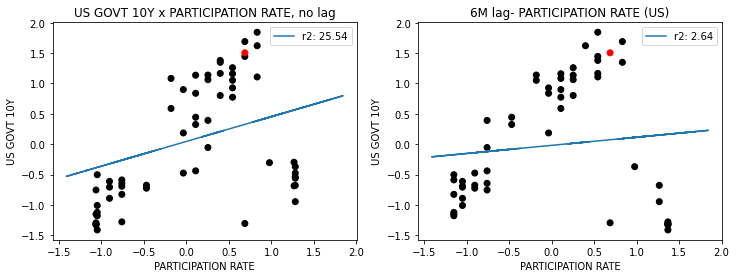

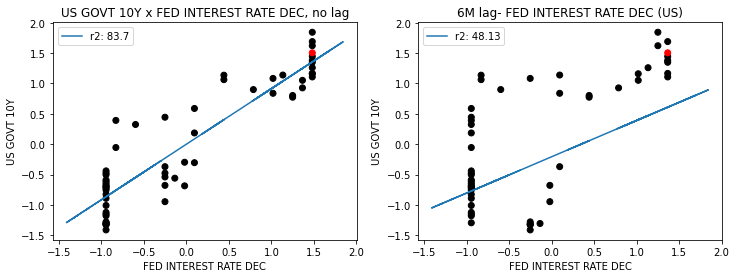

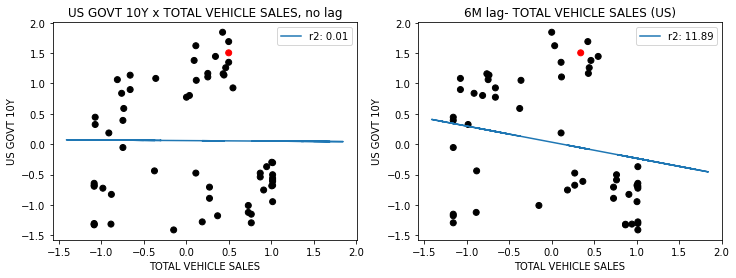

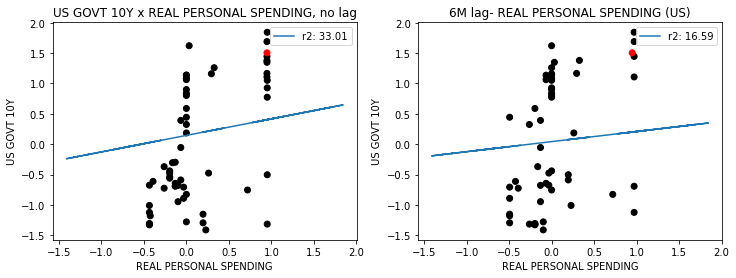

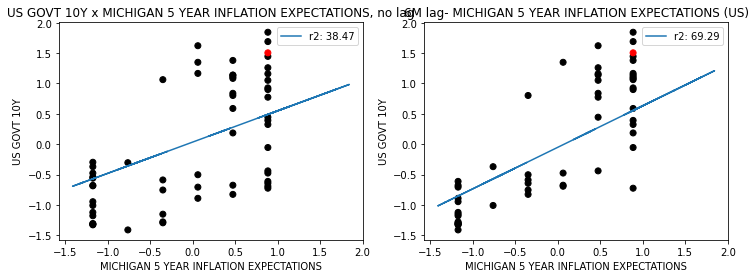

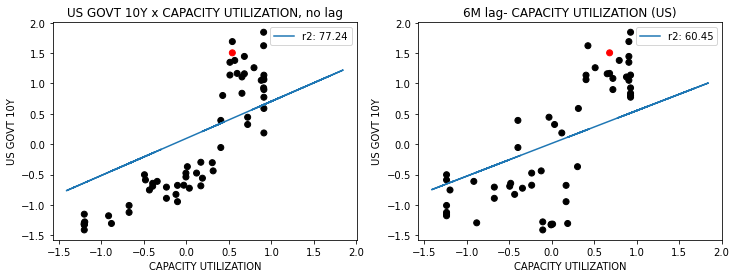

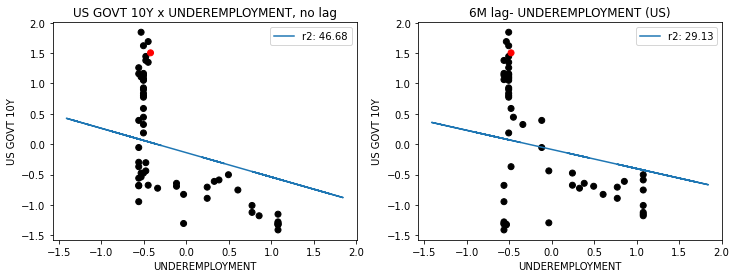

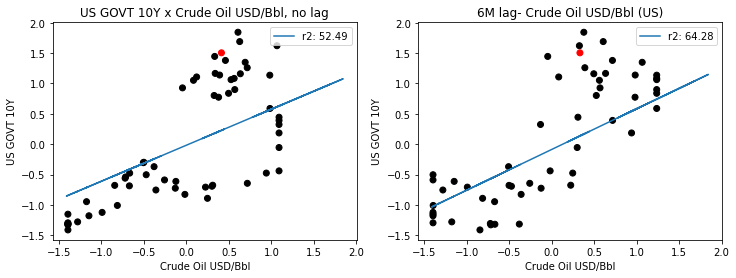

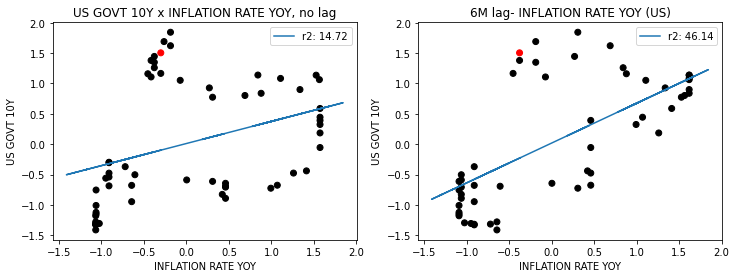

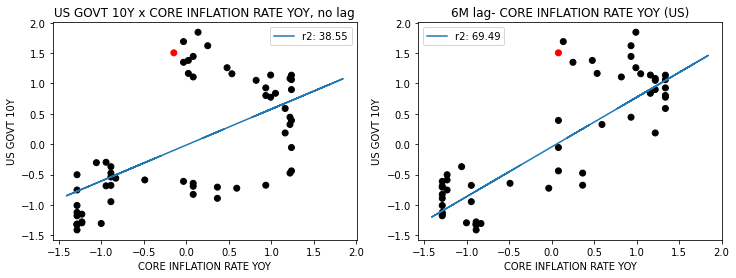

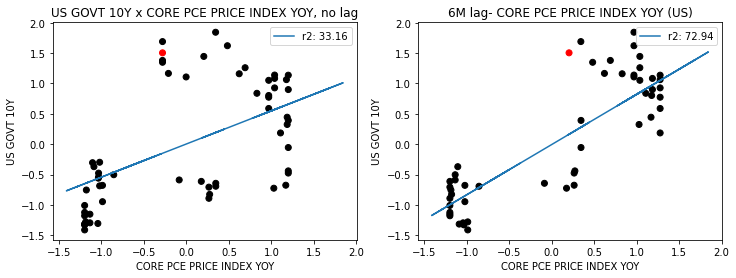

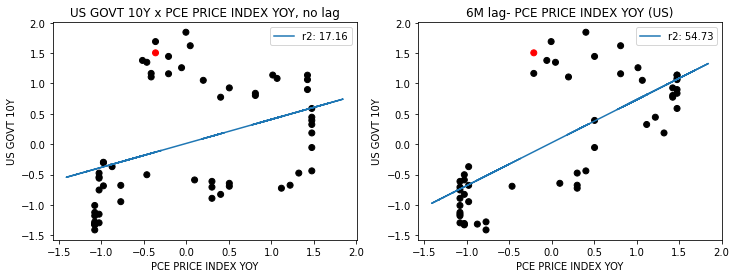

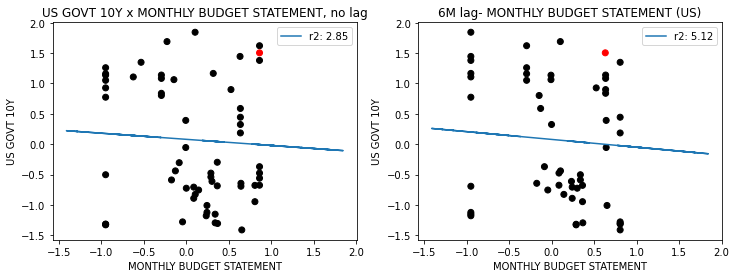

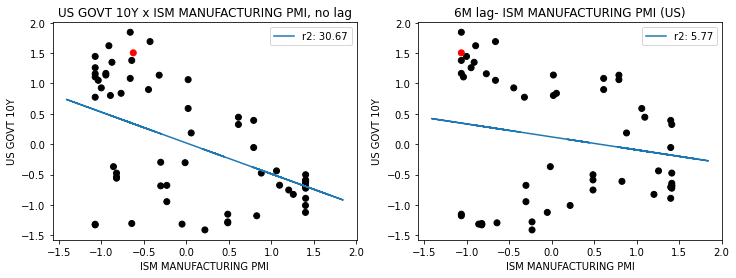

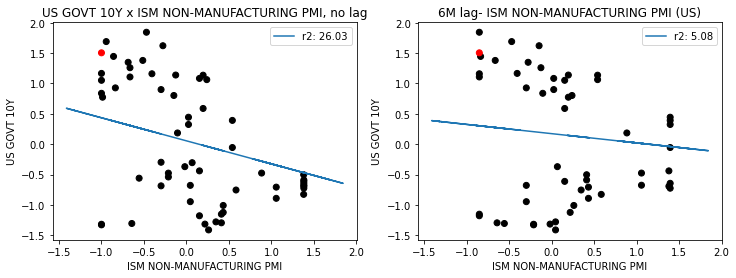

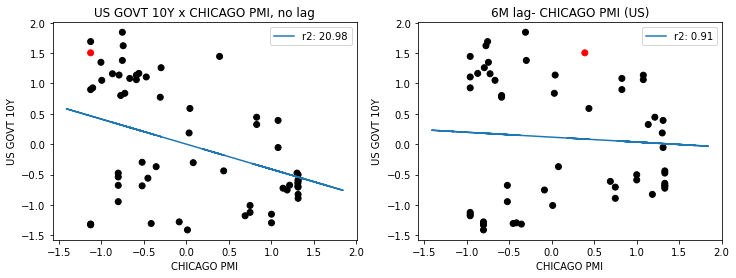

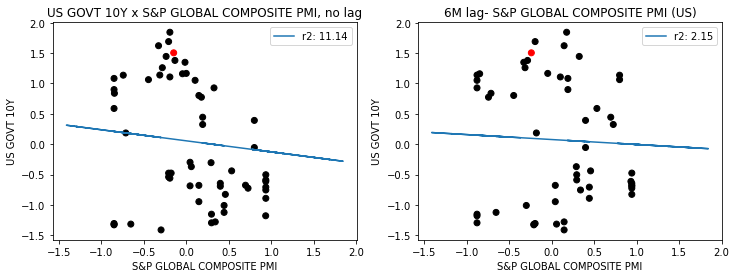

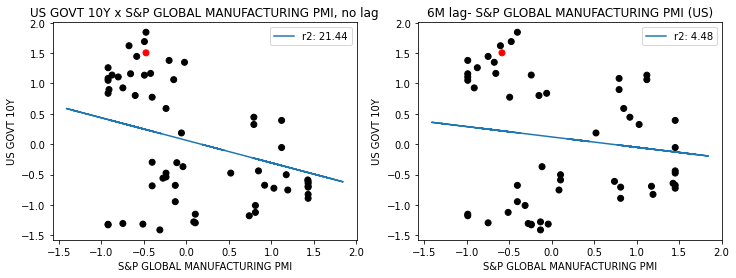

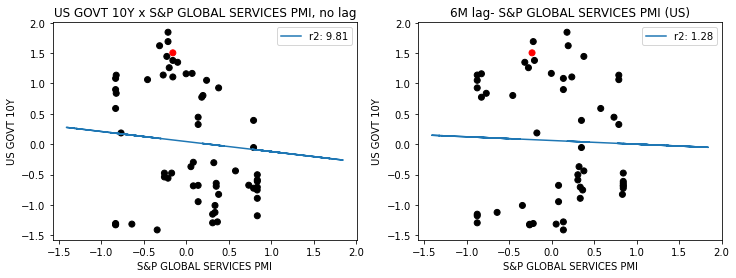

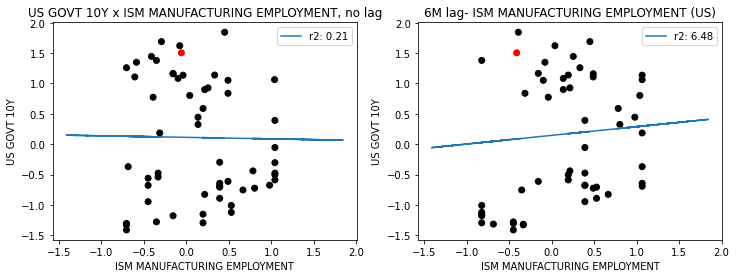

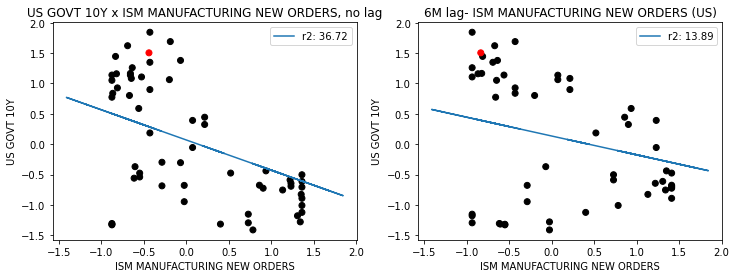

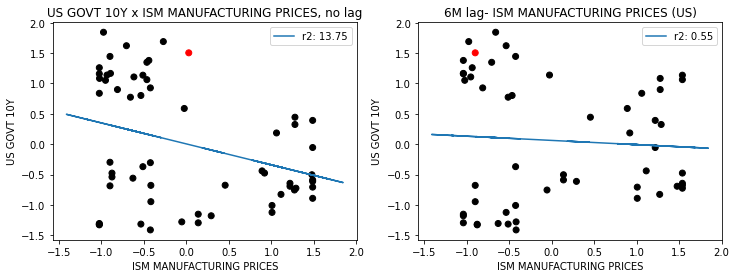

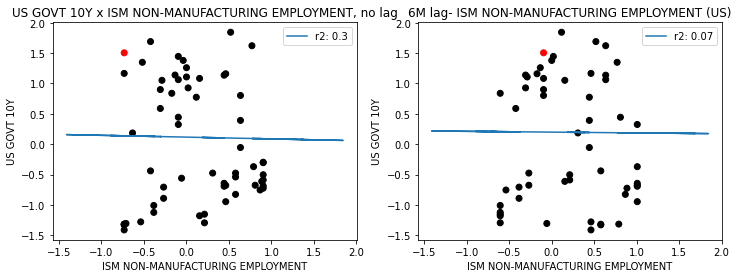

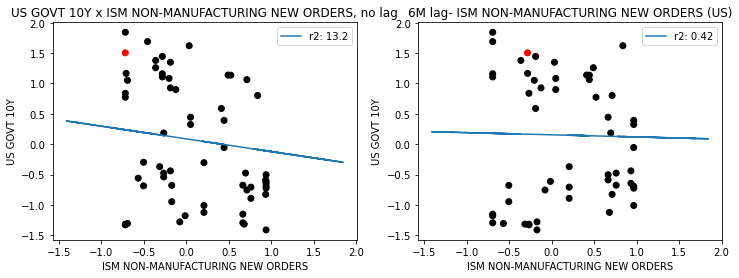

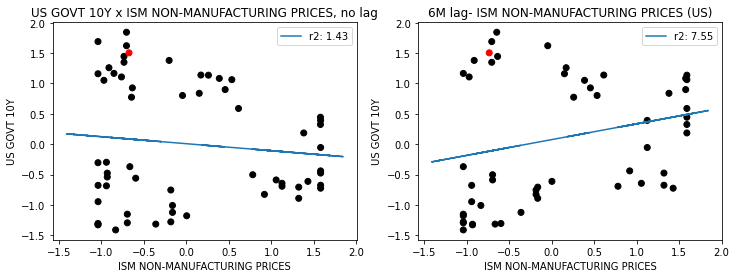

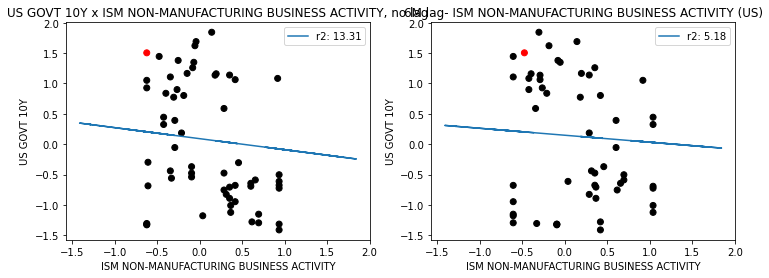

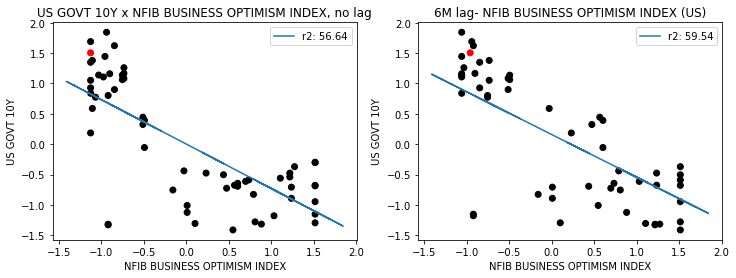

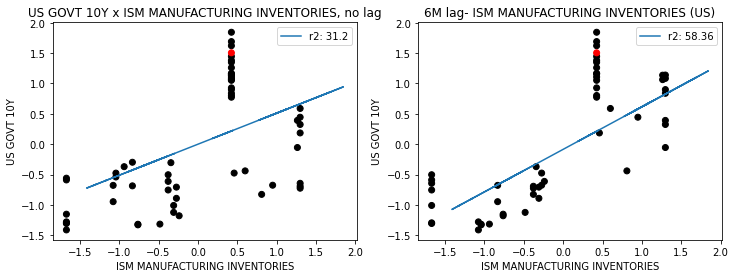

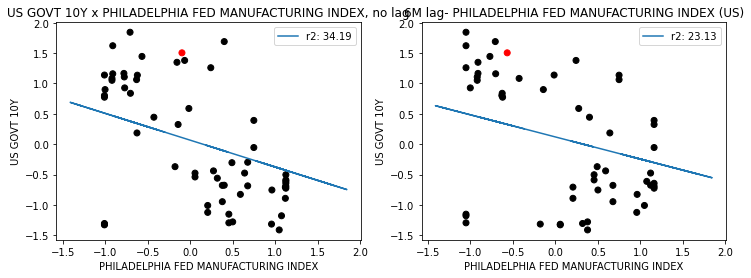

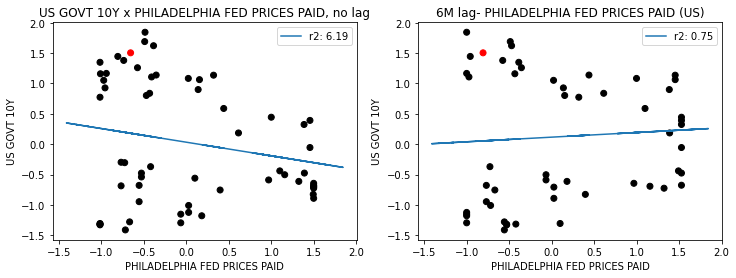

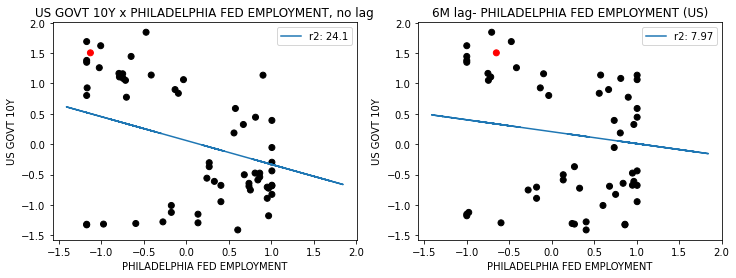

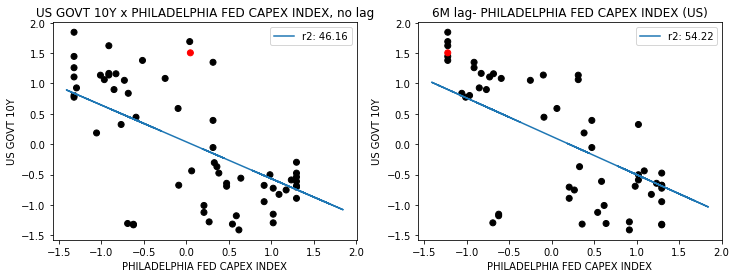

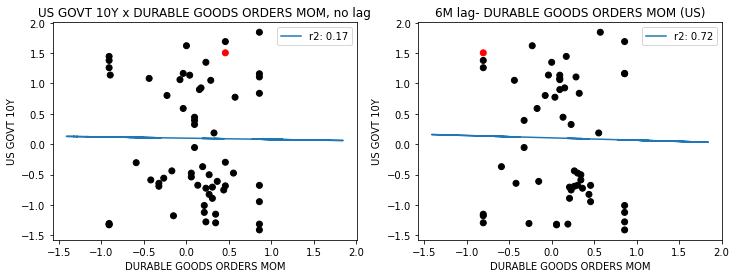

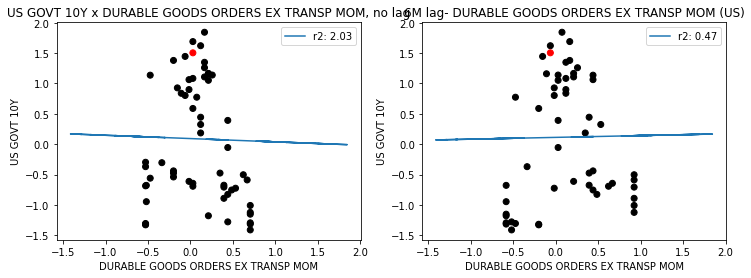

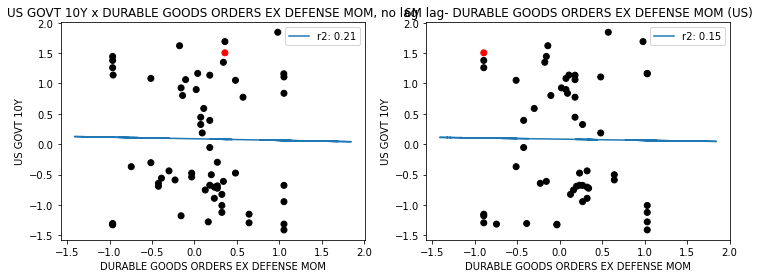

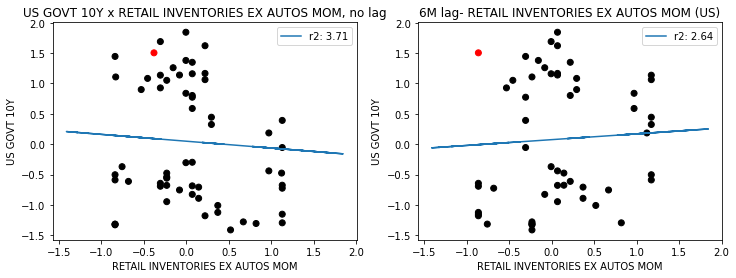

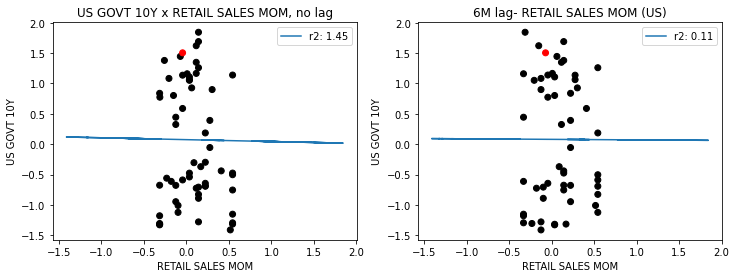

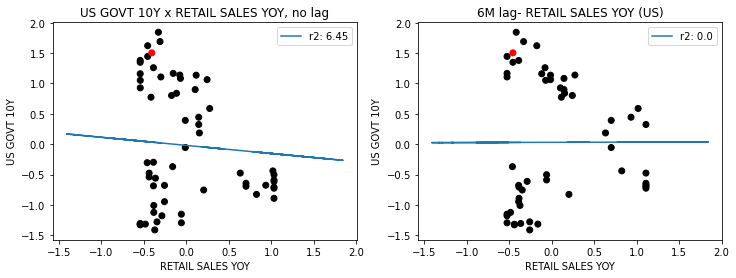

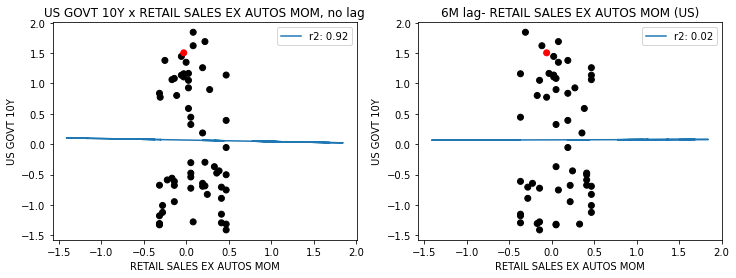

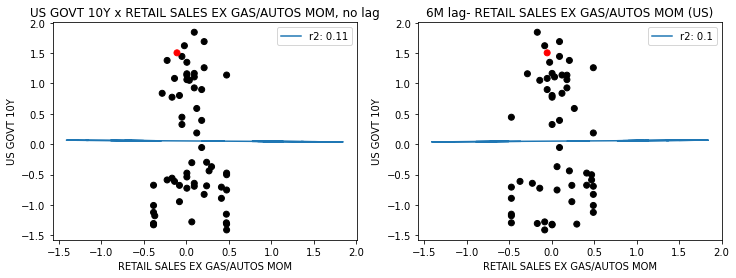

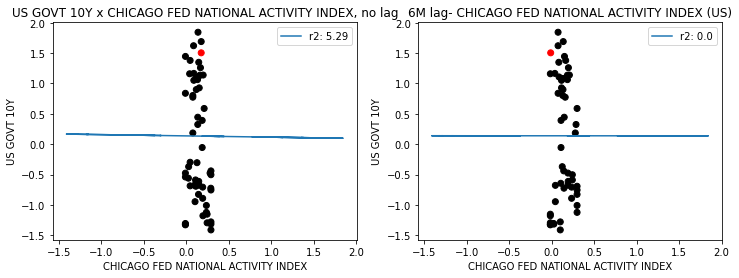

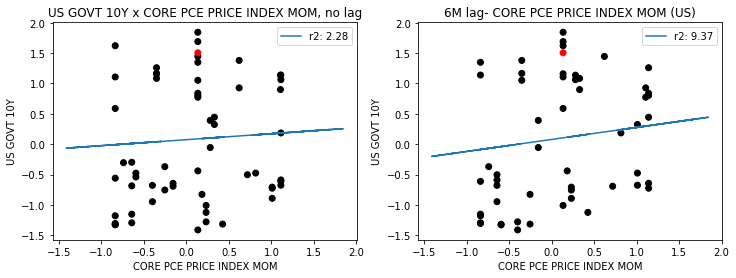

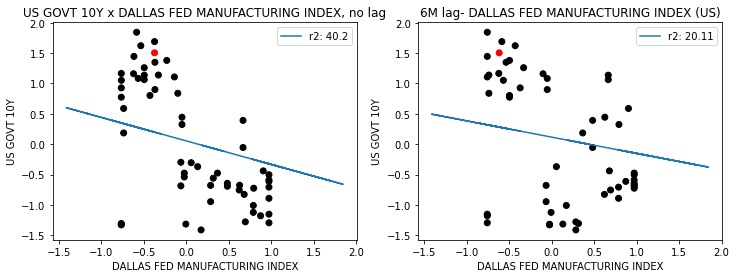

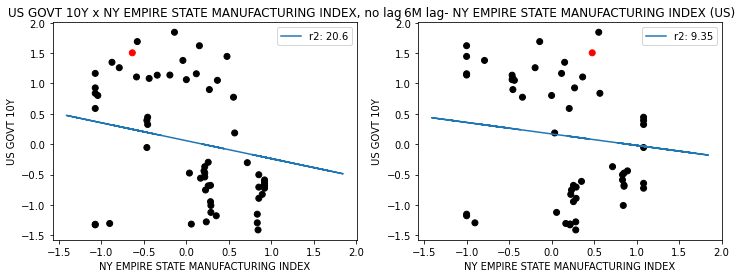

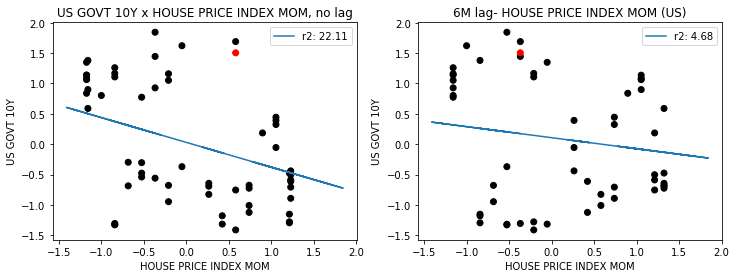

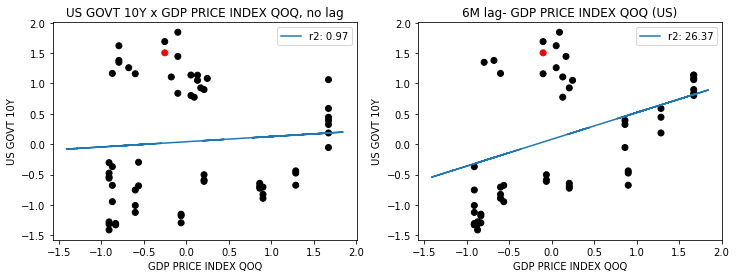

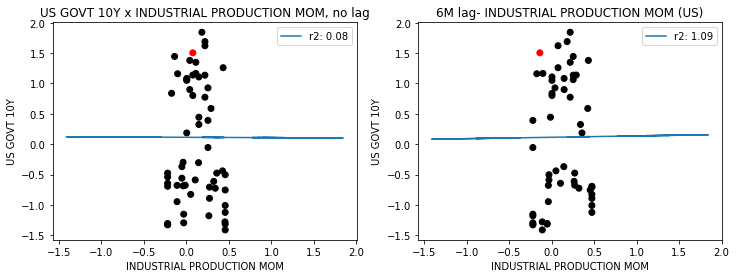

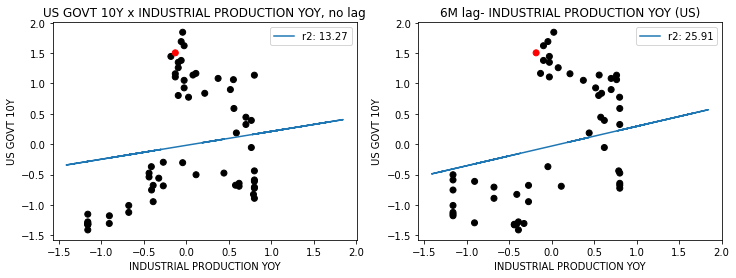

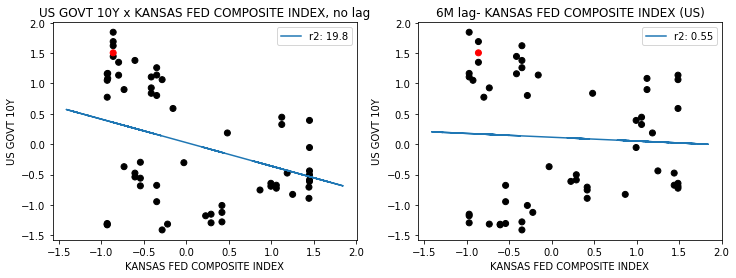

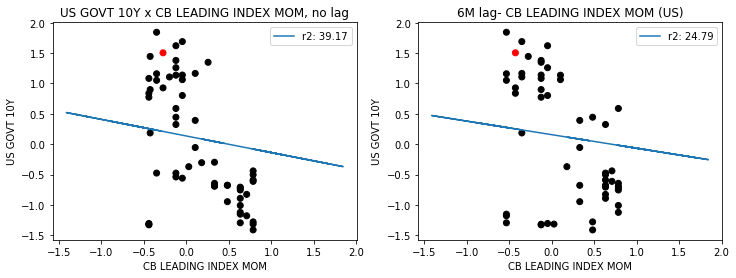

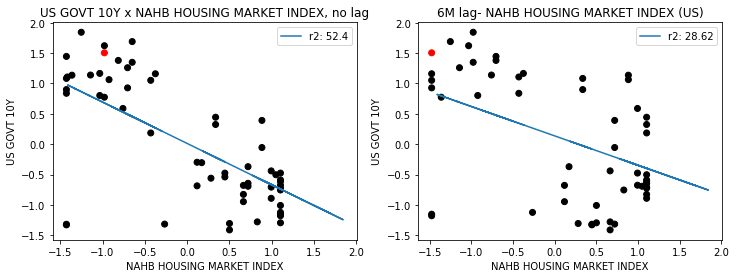

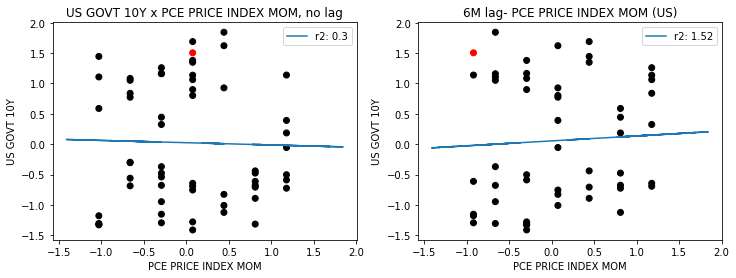

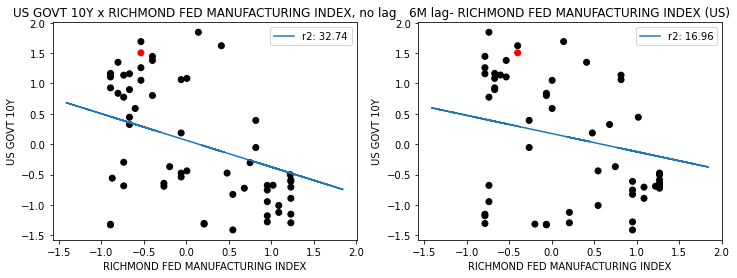

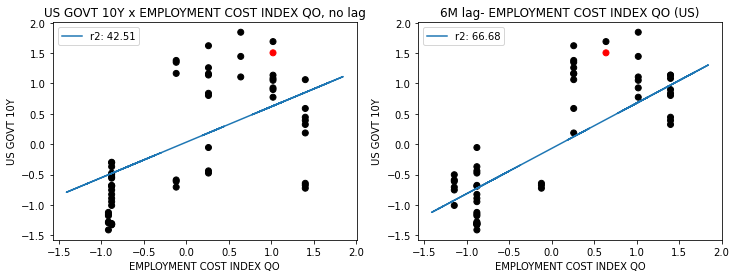

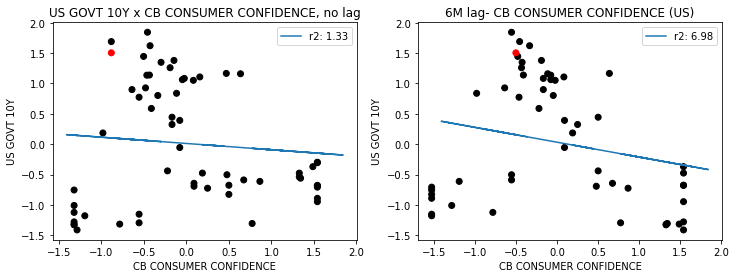

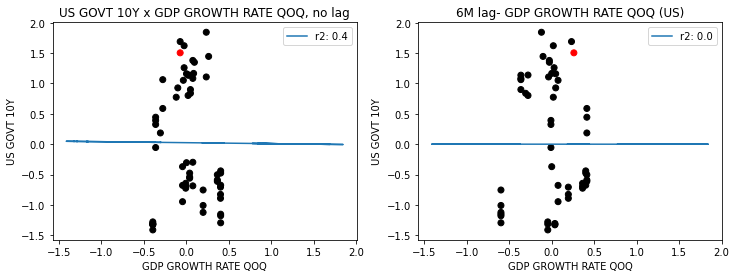

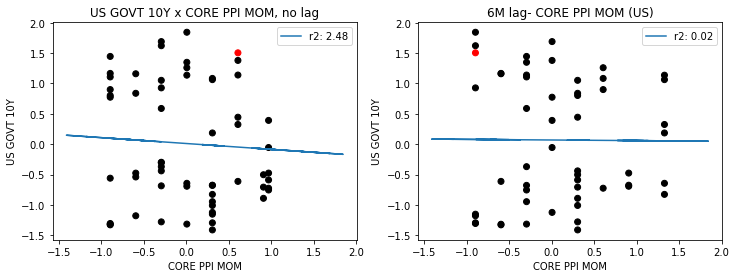

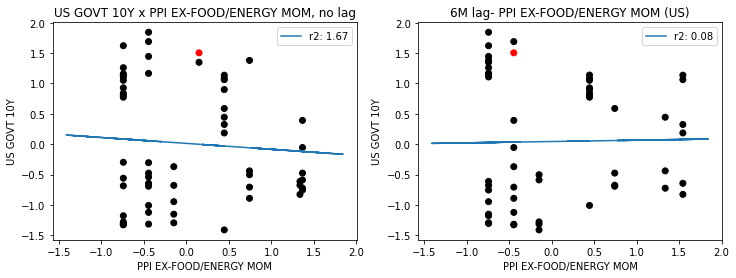

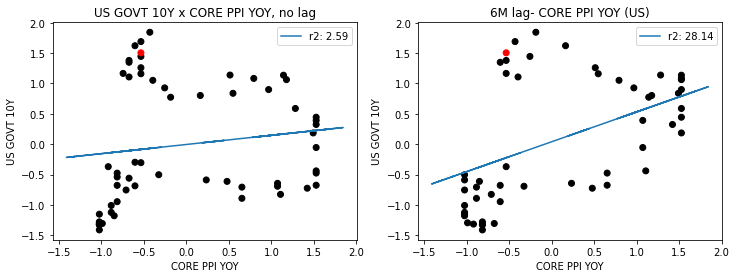

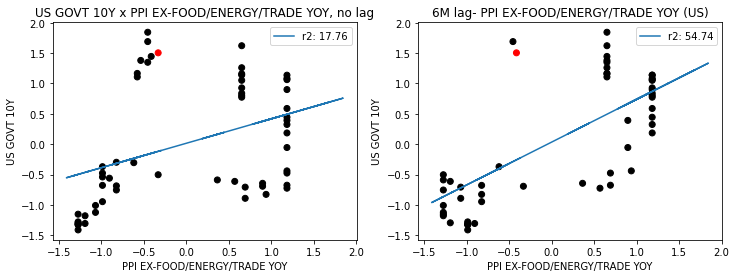

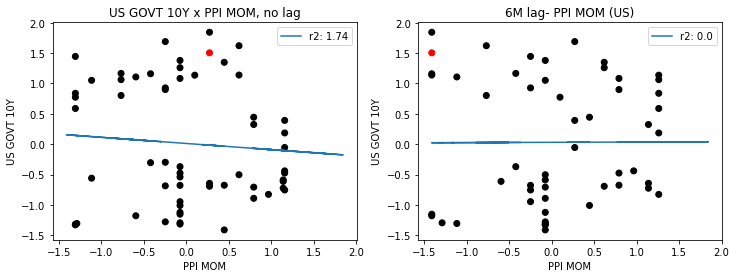

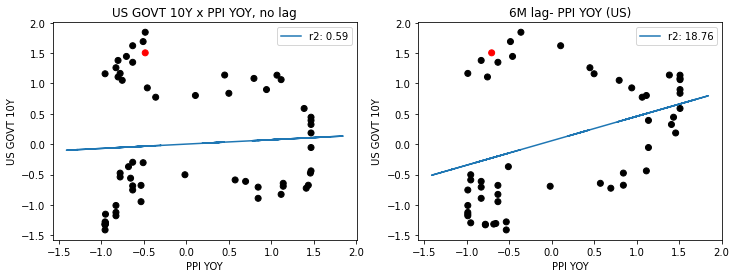

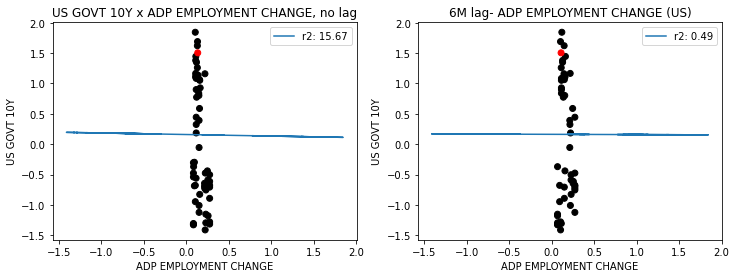

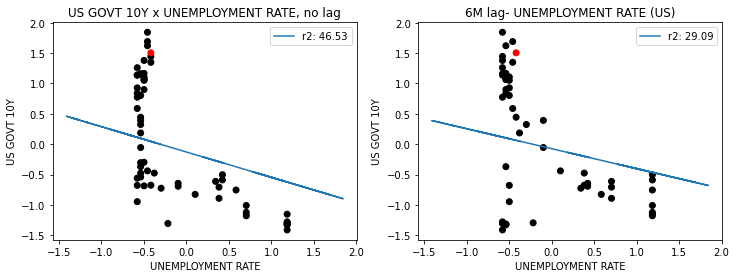

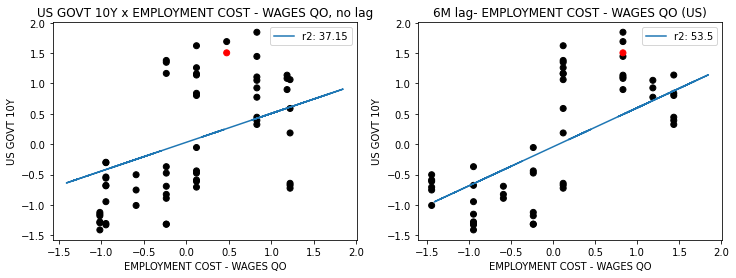

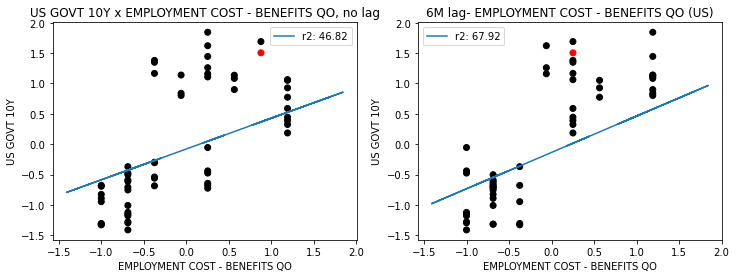

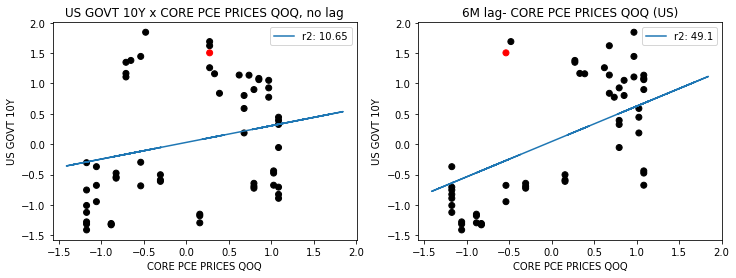

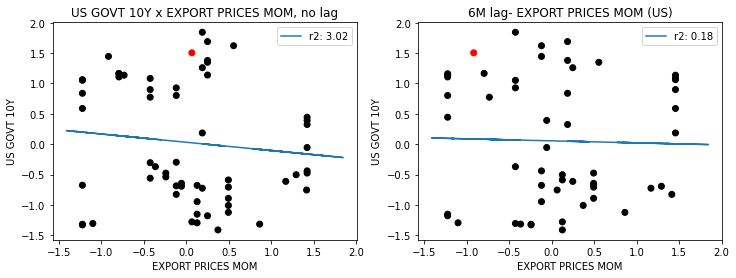

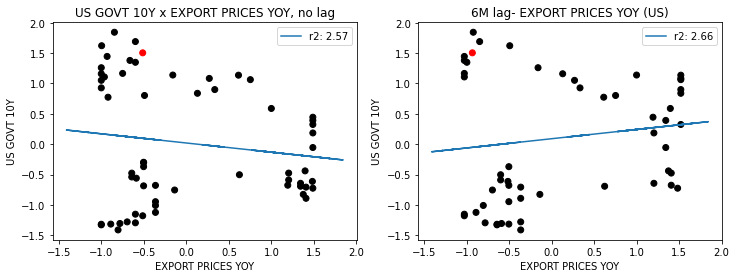

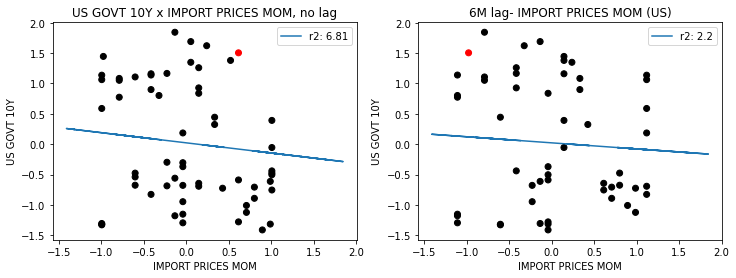

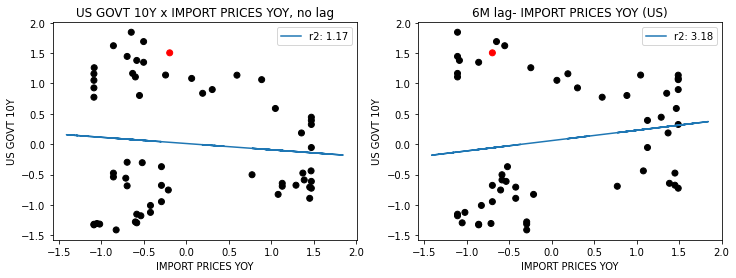

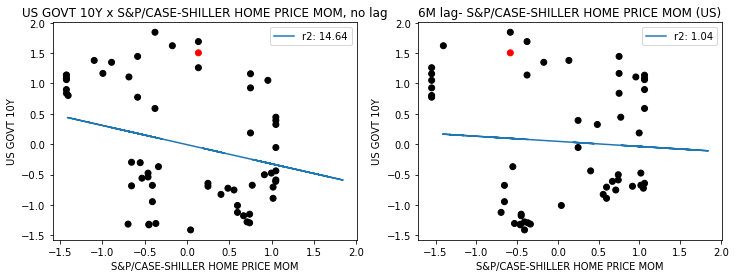

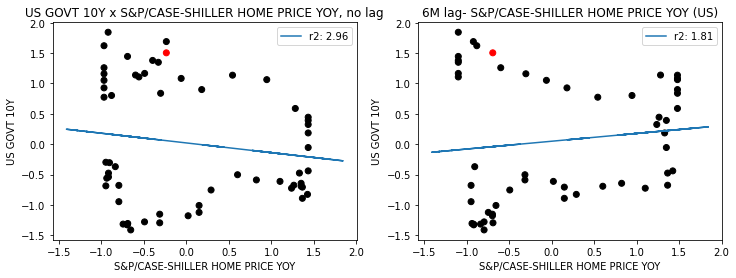

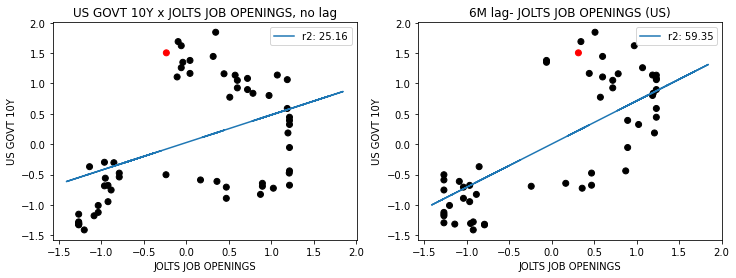

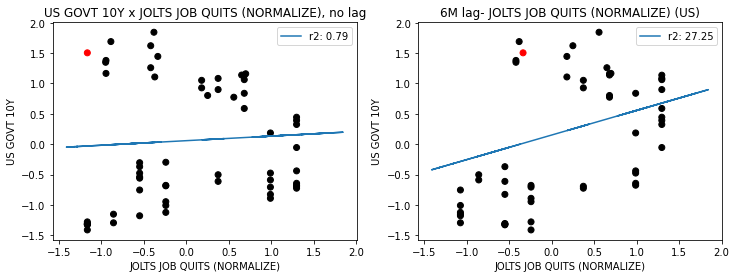

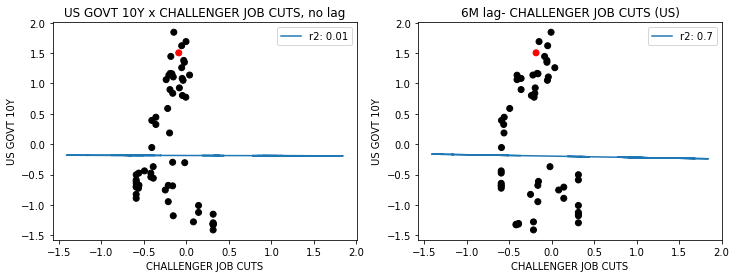

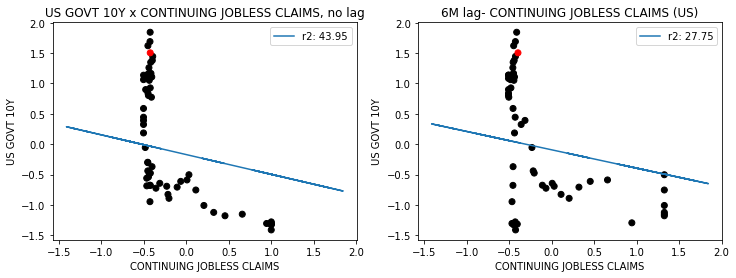

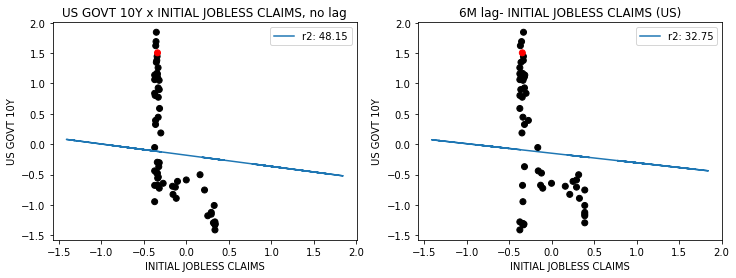

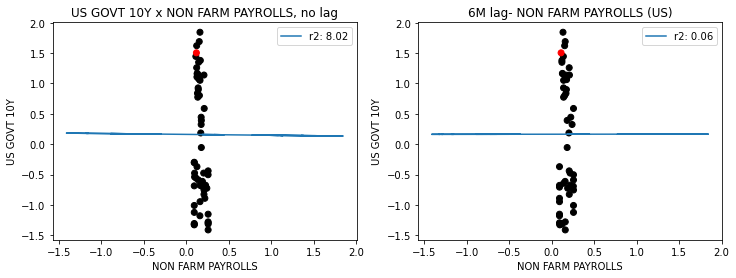

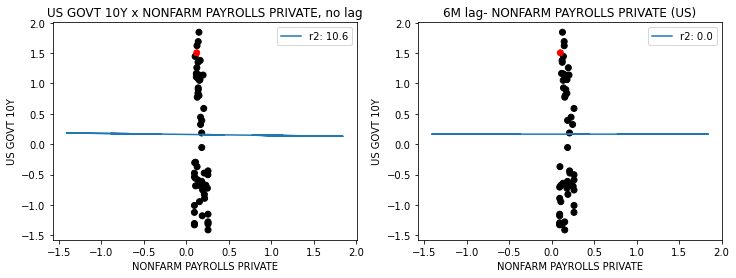

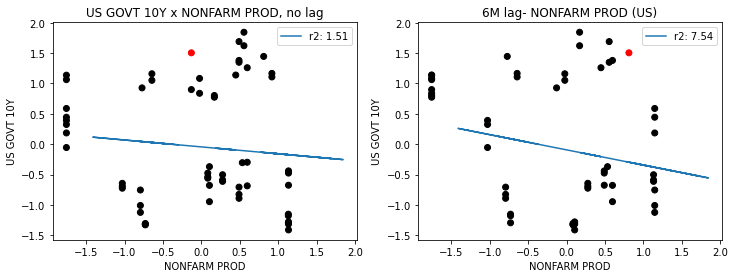

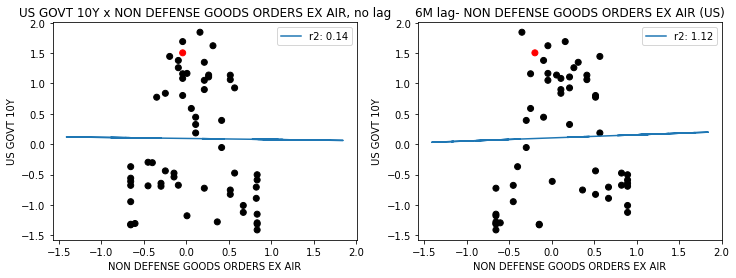

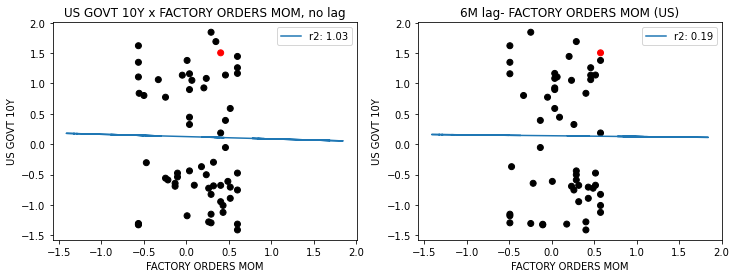

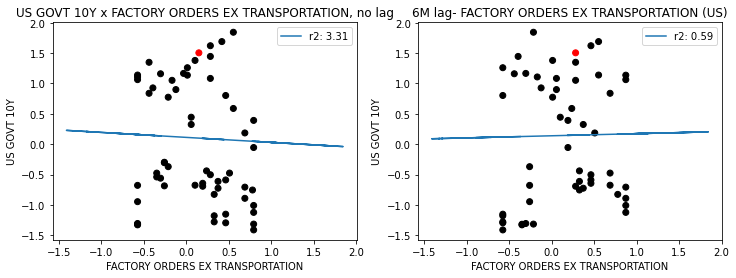


Correlations Summary - LAG 6 Months
                                           1y     2y     3y     5y    AVG
PARTICIPATION RATE                      71.08  67.38   89.1  18.94  61.62
FED INTEREST RATE DEC                   58.88  64.55  78.26  69.49  67.80
TOTAL VEHICLE SALES                     42.18  67.96  31.33 -19.09  30.59
REAL PERSONAL SPENDING                  36.06  63.26  52.22  36.85  47.10
MICHIGAN 5 YEAR INFLATION EXPECTATIONS  22.91   44.7  31.29  82.46  45.34
CAPACITY UTILIZATION                    17.12 -38.83  76.78   67.9  30.74
UNDEREMPLOYMENT                          8.37 -11.49 -83.55 -48.92 -33.90



1y     2y     3y     5y    AVG
BALANCE OF TRADE                        96.55  51.15  18.19 -62.64  25.81
IMPORT PRICES YOY                       92.76 -65.66 -65.32  18.55  -4.92
FACTORY ORDERS EX TRANSPORTATION        92.15  13.38 -30.97  19.18  23.44
RETAIL SALES YOY                        89.82 -64.93 -88.15   3.83 -14.86
EXPORT PRICES YOY                       88.51  -62.0 -65.72  13.99  -6.30
CORE INFLATION RATE YOY                -86.73 -65.07  25.27  82.91 -10.91
PPI EX-FOOD/ENERGY/TRADE YOY           -83.85 -71.31 -34.48  73.87 -28.94
PPI EX-FOOD/ENERGY MOM                  83.25 -71.11 -45.85  14.32  -4.85
NONFARM PROD                            81.97  69.41 -10.39 -29.88  27.78
ISM MANUFACTURING NEW ORDERS            81.25 -34.14 -87.19 -23.78 -15.96
S&P/CASE-SHILLER HOME PRICE YOY         80.82 -65.55 -66.67  10.87 -10.13
CORE PCE PRICE INDEX YOY                -80.4 -59.84  27.32  84.99  -6.98
GDP GROWTH RATE QOQ                     80.35  40.49 -48.41   5.85  19.57
MICHIGAN INFLATION EXPECTATIONS         76.91 -39.55 -22.02  70.54  21.47
S&P GLOBAL SERVICES PMI                -72.94  57.81 -52.27   1.03 -16.59
PARTICIPATION RATE                      71.08  67.38   89.1  18.94  61.62
S&P GLOBAL COMPOSITE PMI               -63.66  57.56  -54.5   0.38 -15.05
EMPLOYMENT COST - BENEFITS QO          -58.88 -25.24  48.67  70.38   8.73
FED INTEREST RATE DEC                   58.88  64.55  78.26  69.49  67.80
UNEMPLOYMENT RATE                       47.81   4.25 -85.52  -49.1 -20.64
TOTAL VEHICLE SALES                     42.18  67.96  31.33 -19.09  30.59
REAL PERSONAL SPENDING                  36.06  63.26  52.22  36.85  47.10
JOLTS JOB OPENINGS                     -30.37 -44.44 -16.94  76.47  -3.82
PCE PRICE INDEX YOY                    -24.75 -66.57  -7.04  74.16  -6.05
Crude Oil USD/Bbl                       23.61 -40.82   19.6  76.58  19.74
MICHIGAN 5 YEAR INFLATION EXPECTATIONS  22.91   44.7  31.29  82.46  45.34
CAPACITY UTILIZATION                    17.12 -38.83  76.78   67.9  30.74
UNDEREMPLOYMENT                          8.37 -11.49 -83.55 -48.92 -33.90
EMPLOYMENT COST INDEX QO                -6.23 -44.82  43.65  79.49  18.02

In [17]:
#CHECKS MACRO DATA CORRELATIONS W/ RATES

def open_df(*args):
    open_str = args[0]
    
    query_open = 'SELECT * FROM ' + open_str
    opened_df = pd.read_sql_query(query_open, engine)
    opened_df = Set_DF(opened_df)
    opened_df = DD_Index(opened_df)
    opened_df = opened_df.sort_index()
    
    return opened_df

def on_selection_tenors(value):
    global tenor_option
    tenor_option = value
    root.destroy()
    
def on_selection_regions(value):
    global region_option
    region_option = value
    root.destroy()   
    
def on_selection_base(value):
    global base_option
    base_option = value
    root.destroy()       
    
px_df = open_df('prices_relation')    
lag_list = [0, 3, 6]  
europe_list = ['EUROPE', 'ESP', 'FRA', 'GER', 'ITA', 'NL']
region_dikt = {'AUS': 'AU', 'CAN': 'CA', 'ESP': 'ES', 'EUROPE': 'EA', 'FRA': 'FR', 'GER': 'DE', 'ITA': 'IT', 'UK': 'GB', 'US': 'US', 'NL': 'NL'}
exception_list = ['UNEMPLOYMENT RATE', 'UNDEREMPLOYMENT', 'INITIAL JOBLESS CLAIMS', 'CONTINUING JOBLESS CLAIMS', 
                  'CHALLENGER JOB CUTS']
windows_list = ['1y', '2y', '3y', '5y']
highlight = 10
start_date = datetime(2015, 1, 1).date()
rates_df = open_df('global_rates_dm')

regions_list = pd.unique(rates_df.columns.map(lambda x: x.split(' ')[0]))
root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *regions_list, command = on_selection_regions)
tk.Label(root, text = "Choose region: ").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()


tenors_list = pd.unique(rates_df.columns[rates_df.columns.map(lambda x: x.find(region_option)) != -1].map(lambda x: x.split(' ')[-1]))
root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *tenors_list, command = on_selection_tenors)
tk.Label(root, text = "Choose tenor: ").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()

if (region_option == 'EUROPE'):
    asset_str = region_option + ' ' + tenor_option
    for c_ec in europe_list:
        ec_df = open_df(region_dikt[c_ec] + '_macro')
        if (c_ec == 'EUROPE'):
            macro_df = ec_df.copy()
        else:
            macro_df = macro_df.join(ec_df, rsuffix = '_' + c_ec)
else:    
    asset_str = region_option + ' GOVT ' + tenor_option
    macro_df = open_df(region_dikt[region_option] + '_macro')
rates_s = rates_df[asset_str]
macro_df = macro_df.join(px_df['Crude Oil USD/Bbl'])
macro_list = macro_df.columns.tolist()
all_df = macro_df.join(rates_s)

change_base = input('Change base variable (Y/y or empty)? ').upper()
if (change_base == 'Y'):
    root = tk.Tk()
    tkvar = tk.StringVar(root)
    popupMenu = tk.OptionMenu(root, tkvar, *sorted(all_df.columns.tolist()), command = on_selection_base)
    tk.Label(root, text = "Choose new base: ").grid(row = 0, column = 0)
    popupMenu.grid(row = 1, column = 0)
    root.mainloop() 
    macro_list.remove(base_option)
    macro_list.append(asset_str)
    asset_str = base_option    

allS_df = all_df[all_df.index >= start_date]
allS_df = allS_df.dropna(subset = [asset_str])
allM_df = allS_df.copy()
allM_df.index = allM_df.index.map(lambda x: datetime(x.year, x.month, x.day))
allM_df = allM_df.resample('M').last()

corr_df = pd.DataFrame(index = macro_list, columns = windows_list)
highlight_l = []
chosen_lag = 6
for c_lag in lag_list: 
    for window in windows_list:
        w = int(window.split('y')[0]) * 12
        allMS_df = allM_df[-w:].copy()
        if (window == windows_list[-1]):
            std_s = allMS_df.std()
            print('ST DEVs:')
            print(round(std_s[:60], 2))
            print(round(std_s[60:], 2))
            print('')
        allMS_df /= allMS_df.std()
        allMS_df -= allMS_df.mean()
        baseS_s = allMS_df[asset_str]
        macroMS_df = allMS_df.drop([asset_str], axis = 1).shift(c_lag)
        for macro_f in macro_list:
            macro_s = macroMS_df[macro_f].dropna()
            SbaseS_s = baseS_s.loc[macro_s.index]
            corr_c = round(100 * macro_s.corr(SbaseS_s), 2)
            corr_df.loc[macro_f, window] = corr_c
        print(str(c_lag) + ' lag, ' + window + ' ' + str(highlight) + ' best positive corrs: ')
        bestP_s = corr_df[window].sort_values(ascending = False)[:highlight]
        print(bestP_s)
        print('')
        print(str(c_lag) + ' lag, ' + window + ' ' + str(highlight) + ' best negative corrs: ')
        bestN_s = corr_df[window].sort_values()[:highlight]
        print(bestN_s)
        print('')
        print('')
        if (c_lag == chosen_lag):
            bestPC_l = [feature for feature in bestP_s.index.tolist() if feature not in exception_list]
            bestNC_l = [feature for feature in bestN_s.index.tolist() if feature in exception_list]
            highlight_l = highlight_l + bestPC_l + bestNC_l            
    
    print(str(c_lag) + ' LAG RESULTS:')
    print(corr_df.loc[abs(corr_df).sum(axis = 1).sort_values(ascending= False)[:20].index])      
    print('')
    print('')
    if (c_lag == chosen_lag):
        highlight_l = pd.unique(highlight_l)  
        Ccorr_df = corr_df.copy()
        LmacroMS_df = macroMS_df.dropna(how = 'all').copy()
        
Ccorr_df['AVG'] = round(Ccorr_df.mean(axis = 1), 2)
Select_df = Ccorr_df.loc[abs(Ccorr_df.loc[highlight_l]).sort_values(by = ['1y'], ascending = False).index].dropna()

figs = {}
axs = {}
axs_ = {}
addPMI_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('PMI')) != -1].index.tolist()
addISM_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('ISM')) != -1].index.tolist()
addPH_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('PHILADELPHIA')) != -1].index.tolist()
addIFO_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('IFO')) != -1].index.tolist()
addZEW_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('ZEW')) != -1].index.tolist()
addGFK_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('GFK')) != -1].index.tolist()
addDUR_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('DURABLE')) != -1].index.tolist()
addRET_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('RETAIL')) != -1].index.tolist()
addIP1_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('IND')) != -1].index.tolist()
addIP2_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('IP')) != -1].index.tolist()
addCONF_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('CONFIDENCE')) != -1].index.tolist()
addGDP_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('GDP')) != -1].index.tolist()
addPPI_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('PPI')) != -1].index.tolist()
addECI_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('EMPLOYMENT')) != -1].index.tolist()
addCHL_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('JOB')) != -1].index.tolist()
addPX_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('PRICE')) != -1].index.tolist()
addNFP_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('FARM')) != -1].index.tolist()
addJOLT_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('JOLT')) != -1].index.tolist()
addORD_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('ORDERS')) != -1].index.tolist()
addIJC_l = allMS_df.T[allMS_df.columns.map(lambda x: x.find('CLAIMS')) != -1].index.tolist()
forceG_l = ['Crude Oil USD/Bbl', 'INFLATION RATE YOY', 'CORE INFLATION RATE YOY', 'CORE PCE PRICE INDEX YOY', 
            'PCE PRICE INDEX YOY', 'MONTHLY BUDGET STATEMENT']
feat_list = pd.unique(Select_df[abs(Select_df['AVG']) > 30].index.tolist() + forceG_l + addPMI_l + addISM_l + addPH_l + 
                      addIFO_l + addZEW_l + addGFK_l + addDUR_l + addRET_l + addIP1_l + addIP2_l + addCONF_l + addGDP_l + 
                      addPPI_l + addECI_l + addPX_l + addJOLT_l + addCHL_l + addNFP_l + addORD_l + addIJC_l).tolist()
if (asset_str in feat_list):
    feat_list.remove(asset_str)
for idx, select_feat in enumerate(feat_list):
    if (select_feat in allMS_df.columns):
        figs[idx] = plt.figure(figsize = (12, 4))

        x_axis = allMS_df.loc[allMS_df[select_feat].dropna().index][asset_str].values
        y_axis = allMS_df[select_feat].dropna().clip(np.quantile(allMS_df[select_feat].values, q = .1), np.quantile(allMS_df[select_feat].values, q = .9)).values    
        collors_l = ['k'] * (allMS_df[select_feat].dropna().shape[0] - 1) + ['r']
        axs[idx] = figs[idx].add_subplot(1, 2, 1)
        axs[idx].scatter(y_axis, x_axis, c = collors_l)    
        axs[idx].set_xlabel(select_feat)
        axs[idx].set_ylabel(asset_str)
        axs[idx].set_title(asset_str + ' x ' + select_feat + ', no lag')
        x_axis = x_axis.reshape(-1, 1)
        model = LinearRegression().fit(x_axis, y_axis)
        r_sq = model.score(x_axis, y_axis)
        y0 = model.intercept_
        growth = model.coef_[0]
        r2_curr = round(100 * r_sq, 2)
        axs[idx].plot(x_axis, y0 + model.coef_[0] * x_axis, label = 'r2: ' + str(r2_curr))
        axs[idx].legend(loc = 'best') 

        y_axis = LmacroMS_df[select_feat].dropna().clip(np.quantile(LmacroMS_df[select_feat].values, q = .1), np.quantile(LmacroMS_df[select_feat].values, q = .9)).values     
        x_axis = allMS_df.loc[LmacroMS_df[select_feat].dropna().index, asset_str].values     
        collors_l = ['k'] * (LmacroMS_df[select_feat].dropna().shape[0] - 1) + ['r']
        axs_[idx] = figs[idx].add_subplot(1, 2, 2)
        axs_[idx].scatter(y_axis, x_axis, c = collors_l)    
        axs_[idx].set_xlabel(select_feat)
        axs_[idx].set_ylabel(asset_str)
        axs_[idx].set_title(str(chosen_lag) + 'M lag- ' + select_feat + ' (' + region_option + ')')
        x_axis = x_axis.reshape(-1, 1)
        model = LinearRegression().fit(x_axis, y_axis)
        r_sq = model.score(x_axis, y_axis)
        y0 = model.intercept_
        growth = model.coef_[0]
        r2_curr = round(100 * r_sq, 2)
        axs_[idx].plot(x_axis, y0 + model.coef_[0] * x_axis, label = 'r2: ' + str(r2_curr))
        axs_[idx].legend(loc = 'best') 
        plt.show()    
        
print('')
print('Correlations Summary - LAG ' + str(chosen_lag) + ' Months')
print(Select_df[abs(Select_df['AVG']) > 30].sort_values(by = ['1y'], ascending = False))
print('')
Select_df.name = asset_str + ' Correlations'
Select_df

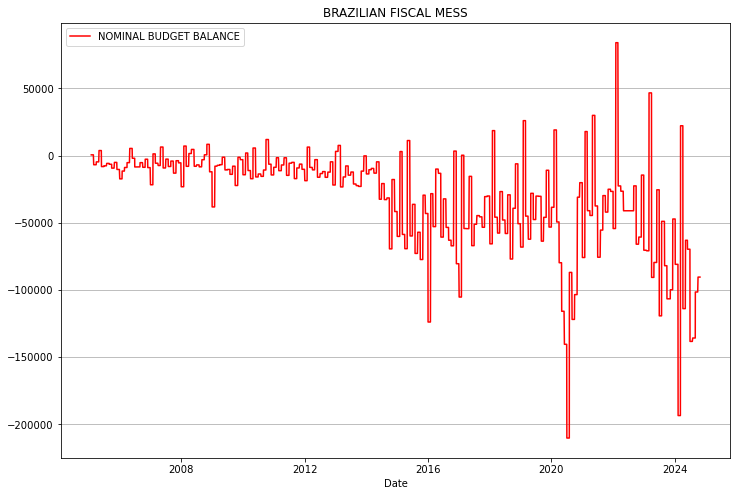

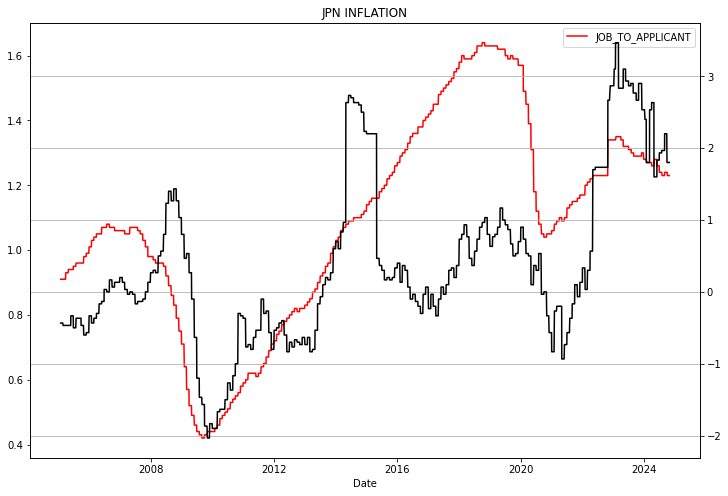

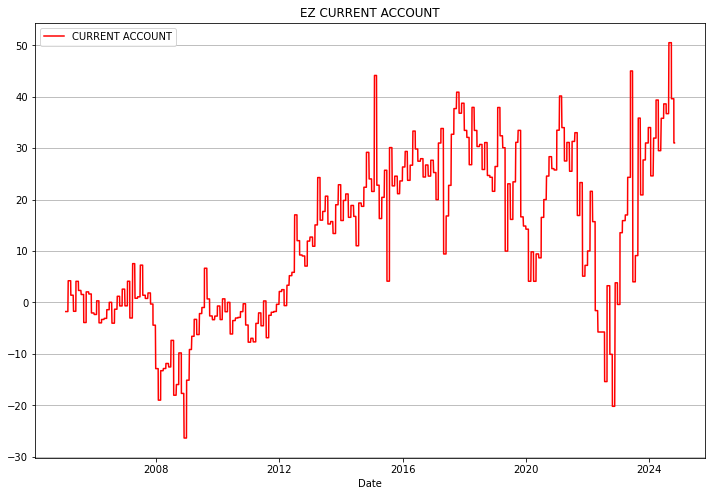

In [3]:
#SPECIFICS 1

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df 

def open_df(*args):
    open_str = args[0]
    
    query_open = 'SELECT * FROM ' + open_str
    opened_df = pd.read_sql_query(query_open, engine)
    opened_df = Set_DF(opened_df)
    opened_df = DD_Index(opened_df)
    opened_df = opened_df.sort_index()
    
    return opened_df

br_df = open_df('br_macro')
nomD_s = br_df['NOMINAL BUDGET BALANCE']
nomD_s.plot(c = 'r', figsize = (12, 8)).legend(loc = 'best')
plt.grid(axis = 'y')
plt.title('BRAZILIAN FISCAL MESS')
plt.show()

jp_df = open_df('jp_macro')
jp_s = jp_df.T[jp_df.columns.map(lambda x: x.find('JOB_')) != -1].T
jpINF_s = jp_df.T[jp_df.columns.map(lambda x: x.find('CPI')) != -1].T.mean(axis = 1)
jp_s.plot(c = 'r', figsize = (12, 8), label = 'INFLATION').twinx()
jpINF_s.plot(c = 'k')
plt.grid(axis = 'y')
plt.title('JPN INFLATION')
plt.show()

ea_df = open_df('ea_macro')
eaCA_s = ea_df.T[ea_df.columns.map(lambda x: x.find('CURRENT')) != -1].T
eaTB_s = ea_df.T[ea_df.columns.map(lambda x: x.find('TRADE')) != -1].T
(eaCA_s).plot(c = 'r', figsize = (12, 8), label = 'EZ CURRENT ACCOUNT')
#(eaTB_s / abs(eaTB_s.iloc[0])).plot(c = 'k', label = 'EZ TRADE BALANCE').legend(loc = 'best')
plt.grid(axis = 'y')
plt.title('EZ CURRENT ACCOUNT')
plt.show()

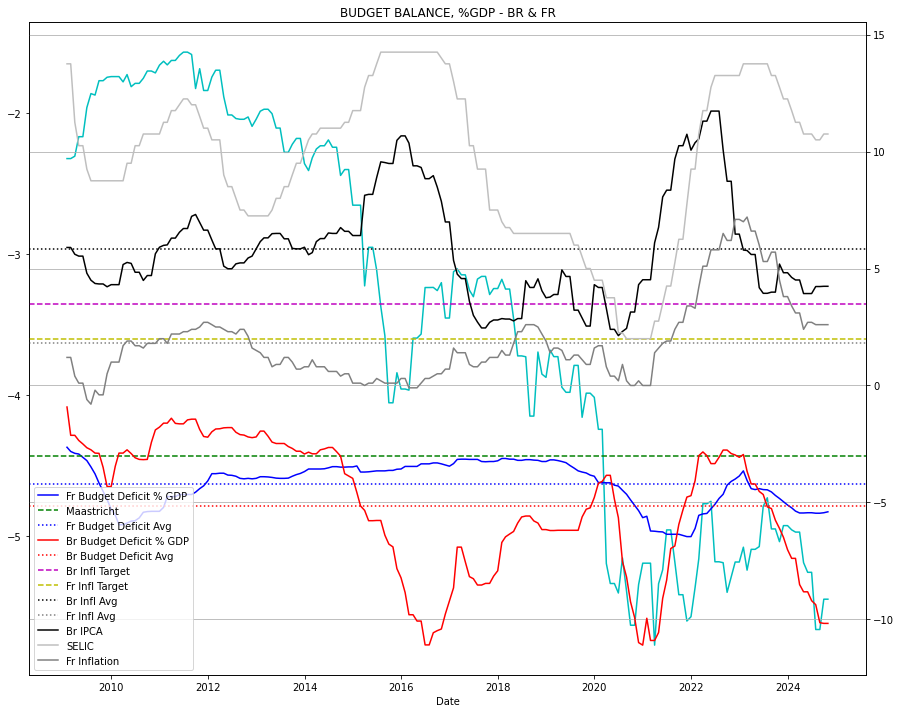

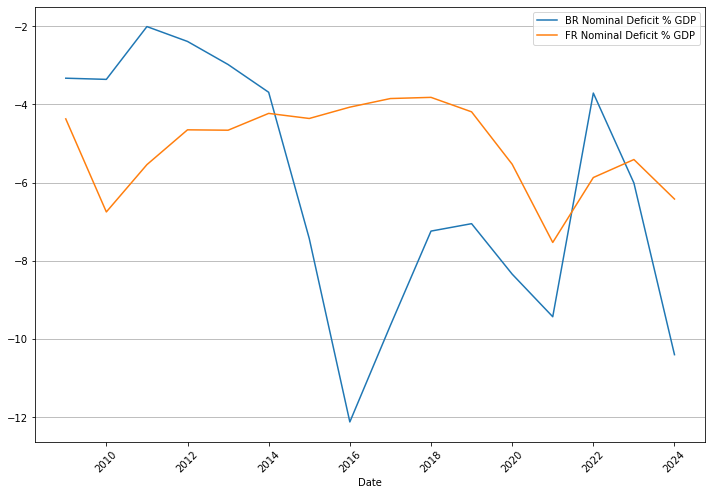

BR Nominal Deficit % GDP  FR Nominal Deficit % GDP
Date                                                            
2009                             -3.33                     -4.37
2010                             -3.36                     -6.75
2011                             -2.01                     -5.54
2012                             -2.39                     -4.65
2013                             -2.98                     -4.66
2014                             -3.69                     -4.23
2015                             -7.43                     -4.36
2016                            -12.12                     -4.07
2017                             -9.65                     -3.85
2018                             -7.24                     -3.82
2019                             -7.05                     -4.19
2020                             -8.34                     -5.53
2021                             -9.43                     -7.53
2022                             -3.71                     -5.87
2023                             -6.01                     -5.41
2024                            -10.40                     -6.42
Last 10y Avg                     -8.14                     -5.10

In [4]:
# SPECIFICS - BR, FR

fx_df = open_df('fxprices_relation')
brl_s = fx_df['USDBRL']
br_df = open_df('br_macro')
nomD_s = br_df['NOMINAL BUDGET BALANCE']
MnomD_s = nomD_s.copy()
MnomD_s.index = nomD_s.index.map(lambda x: datetime(x.year, x.month, x.day))
MnomD_s = MnomD_s.resample('M').last()
YnomD_s = MnomD_s.rolling(12).sum().dropna()
YnomD_s = YnomD_s.rolling(3).median().dropna()

gdpBR_csv = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\gdp_br.csv")
gdpBR_df = pd.DataFrame(gdpBR_csv)
gdpBR_df = Set_DF(gdpBR_df)
gdpBR_df = DD_Index(gdpBR_df)
old_index = gdpBR_df.index
gdpBR_df.index = gdpBR_df.index.map(lambda x: x.split(' ')[1])
YgdpBR_df = gdpBR_df.groupby(gdpBR_df.index).last()

YnomD_dates_s = YnomD_s.index
YnomD_s.index = YnomD_s.index.map(lambda x: x.year)
gdpBR_ttl_s = YgdpBR_df.sum(axis = 1)
YnomD_df = pd.DataFrame(YnomD_s)
YnomD_df['GDP Br (Last)'] = YnomD_df.index.map(lambda x: gdpBR_ttl_s.loc[str(x)])
YnomD_df.index = YnomD_dates_s
YnomD_df['Br Budget Deficit % GDP'] = round(100 * YnomD_df['NOMINAL BUDGET BALANCE'] / YnomD_df['GDP Br (Last)'], 2)

YnomD_df.index = YnomD_df.index.map(lambda x: x.date())
IPCA_s = br_df['INFLATION RATE YOY']
SELIC_s = br_df['SELIC RATE']
YnomD_df = YnomD_df.join(IPCA_s).join(brl_s).join(SELIC_s)
YnomD_df = YnomD_df.fillna(method = 'ffill')


frGDP_df = pd.DataFrame([1.48, 1.54, 1.59, 1.63, 1.7, 1.77, 1.85, 1.94, 1.99, 1.94, 2, 2.06, 2.09, 2.12, 2.15, 2.2, 2.23, 2.3, 
                         2.36, 2.44, 2.32, 2.5, 2.64, 2.8], index = np.arange(24) + 2000, columns = ['Nom GDP (tr EUR)'])
frGDP_df.loc[2024] = frGDP_df.iloc[-1]

fr_df = open_df('fr_macro')
frINFL_s =fr_df['HARMONISED INFLATION RATE YOY']
frINFL_s.name = 'Fr Inflation YoY'
FRnomD_s = fr_df.T[fr_df.columns.map(lambda x: x.find('BUDGET')) != -1].T
FRMnomD_s = FRnomD_s.copy()
FRMnomD_s.index = FRnomD_s.index.map(lambda x: datetime(x.year, x.month, x.day))
FRMnomD_s = FRMnomD_s.resample('M').last()
FRYnomD_s = FRMnomD_s.rolling(12).sum().dropna()
FRYnomD_s = FRYnomD_s.rolling(3).median().dropna()

FRYnomD_dates_s = FRYnomD_s.index
FRYnomD_s.index = FRYnomD_s.index.map(lambda x: x.year)
FRYnomD_df = pd.DataFrame(FRYnomD_s)
FRYnomD_df['Nom GDP (tr EUR)'] = FRYnomD_df.index.map(lambda x: frGDP_df.loc[x, 'Nom GDP (tr EUR)'])
FRYnomD_df.index = FRYnomD_dates_s
FRYnomD_df['Fr Budget Deficit % GDP'] = round(FRYnomD_df['BUDGET BALANCE'] / FRYnomD_df['Nom GDP (tr EUR)'] / 100000, 2)
FRYnomD_df.index = FRYnomD_df.index.map(lambda x: x.date())
FRYnomD_df = FRYnomD_df.join(frINFL_s) 
FRYnomD_df = FRYnomD_df.fillna(method = 'ffill')

cutoff_dt = datetime(2009, 1, 1).date()
YnomD_df = YnomD_df[YnomD_df.index >= cutoff_dt]
FRYnomD_df = FRYnomD_df[FRYnomD_df.index >= cutoff_dt]

(-YnomD_df['USDBRL']).plot(c = 'c', label = 'USDBRL').twinx()
FRYnomD_df['Fr Budget Deficit % GDP'].plot(c = 'b', figsize = (15, 12))
plt.axhline(y = -3, c = 'g', linestyle = 'dashed', label = 'Maastricht')
plt.axhline(y = FRYnomD_df['Fr Budget Deficit % GDP'].mean(), c = 'b', linestyle = 'dotted', label = 'Fr Budget Deficit Avg') 
YnomD_df['Br Budget Deficit % GDP'].plot(c = 'r')
plt.axhline(y = YnomD_df['Br Budget Deficit % GDP'].mean(), c = 'r', linestyle = 'dotted', label = 'Br Budget Deficit Avg') 
plt.axhline(y = 3.5, c = 'm', linestyle = 'dashed', label = 'Br Infl Target')
plt.axhline(y = 2, c = 'y', linestyle = 'dashed', label = 'Fr Infl Target')
plt.axhline(y = YnomD_df['INFLATION RATE YOY'].mean(), c = 'k', linestyle = 'dotted', label = 'Br Infl Avg')
plt.axhline(y = FRYnomD_df['Fr Inflation YoY'].mean(), c = '0.5', linestyle = 'dotted', label = 'Fr Infl Avg')
YnomD_df['INFLATION RATE YOY'].plot(c= 'k', label = 'Br IPCA')
YnomD_df['SELIC RATE'].plot(c= '0.75', label = 'SELIC')
FRYnomD_df['Fr Inflation YoY'].plot(c= '0.5', label = 'Fr Inflation').legend(loc = 'best')
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.title('BUDGET BALANCE, %GDP - BR & FR')
plt.show()

BRSummary_df = round(100 * (gdpBR_df.T / gdpBR_df.T.sum()).T, 2)
BRSummary_df.index = old_index
BRSummary_df.loc['Averages'] = round(BRSummary_df.mean(), 2)

NYnomD_df = YnomD_df.copy()
NYnomD_df.index = NYnomD_df.index.map(lambda x: datetime(x.year, x.month, x.day))
NY_ND_s = NYnomD_df.resample('Y').sum()[NYnomD_df.columns[0]]
NY_GDP_s = NYnomD_df.resample('Y').last()[NYnomD_df.columns[1]]
NY_ND_s /= NY_GDP_s.index.map(lambda x: NY_GDP_s.loc[x])
NY_ND_s *= 10
NY_ND_s.iloc[-1] = NYnomD_df[NYnomD_df.columns[0]][-12:].sum() / NYnomD_df[NYnomD_df.columns[1]].iloc[-1] * 10
NY_ND_s.name = 'BR Nominal Deficit % GDP'

FRNYnomD_df = FRYnomD_df.copy()
FRNYnomD_df.index = FRNYnomD_df.index.map(lambda x: datetime(x.year, x.month, x.day))
FRNY_ND_s = FRNYnomD_df.resample('Y').sum()[FRNYnomD_df.columns[0]]
FRNY_GDP_s = FRNYnomD_df.resample('Y').last()[FRNYnomD_df.columns[1]]
FRNY_ND_s /= FRNY_GDP_s.index.map(lambda x: FRNY_GDP_s.loc[x])
FRNY_ND_s /= 1000000
FRNY_ND_s.iloc[-1] = FRNYnomD_df[FRNYnomD_df.columns[0]][-12:].sum() / FRNYnomD_df[FRNYnomD_df.columns[1]].iloc[-1] / 1000000
FRNY_ND_s.name = 'FR Nominal Deficit % GDP'

SUmmary_ND_df = round(pd.DataFrame(NY_ND_s).join(FRNY_ND_s), 2)
SUmmary_ND_df.index = SUmmary_ND_df.index.map(lambda x: x.year)
SUmmary_ND_df.plot(figsize = (12, 8)).legend(loc = 'best')
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.show()
SUmmary_ND_df.loc['Last 10y Avg'] = round(SUmmary_ND_df[-10:].mean(), 2)
SUmmary_ND_df

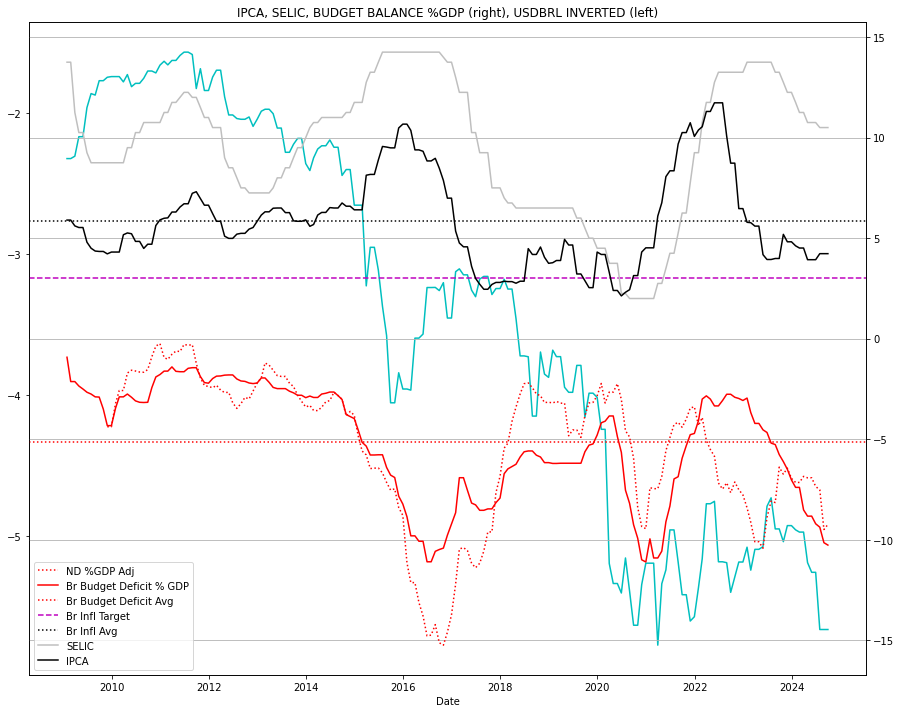

In [13]:
(-YnomD_df['USDBRL']).plot(c = 'c', label = 'USDBRL').twinx()
brND_s = YnomD_df['Br Budget Deficit % GDP']
brNDAdj_s = brND_s - (YnomD_df['INFLATION RATE YOY'].shift(10) - YnomD_df['INFLATION RATE YOY'].mean())
brNDAdj_s.plot(c = 'r', linestyle = 'dotted', figsize = (15, 12), label = 'ND %GDP Adj')
brND_s.plot(c = 'r')
plt.axhline(y = YnomD_df['Br Budget Deficit % GDP'].mean(), c = 'r', linestyle = 'dotted', label = 'Br Budget Deficit Avg') 
plt.axhline(y = 3, c = 'm', linestyle = 'dashed', label = 'Br Infl Target')
plt.axhline(y = YnomD_df['INFLATION RATE YOY'].mean(), c = 'k', linestyle = 'dotted', label = 'Br Infl Avg')
YnomD_df['SELIC RATE'].plot(c= '0.75', label = 'SELIC')
YnomD_df['INFLATION RATE YOY'].plot(c= 'k', label = 'IPCA').legend(loc = 'best')
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.title('IPCA, SELIC, BUDGET BALANCE %GDP (right), USDBRL INVERTED (left)')
plt.show()

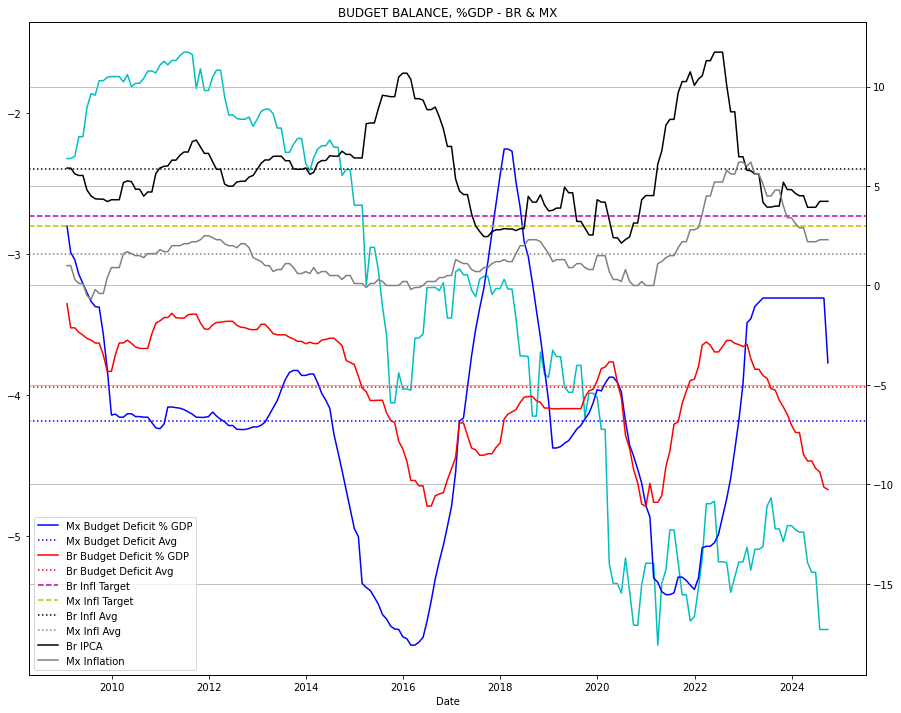

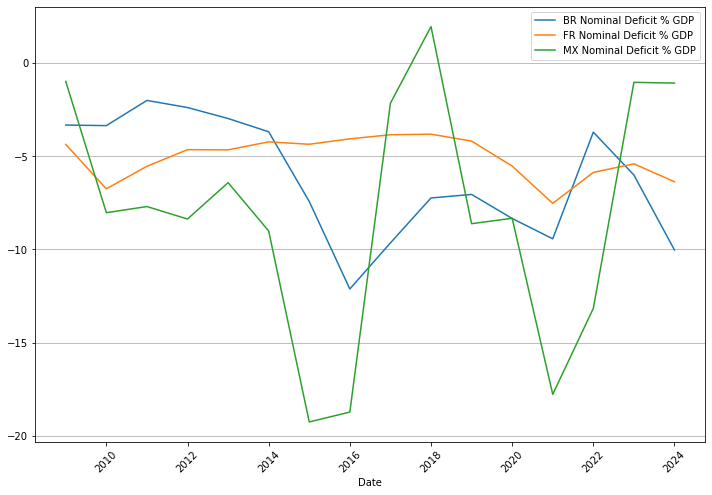

BR Nominal Deficit % GDP  FR Nominal Deficit % GDP  \
Date                                                               
2009                             -3.33                     -4.37   
2010                             -3.36                     -6.75   
2011                             -2.01                     -5.54   
2012                             -2.39                     -4.65   
2013                             -2.98                     -4.66   
2014                             -3.69                     -4.23   
2015                             -7.43                     -4.36   
2016                            -12.12                     -4.07   
2017                             -9.65                     -3.85   
2018                             -7.24                     -3.82   
2019                             -7.05                     -4.19   
2020                             -8.34                     -5.53   
2021                             -9.43                     -7.53   
2022                             -3.71                     -5.87   
2023                             -6.01                     -5.41   
2024                            -10.03                     -6.37   
Last 10y Avg                     -8.10                     -5.10   

              MX Nominal Deficit % GDP  
Date                                    
2009                             -0.99  
2010                             -8.03  
2011                             -7.70  
2012                             -8.37  
2013                             -6.42  
2014                             -9.01  
2015                            -19.25  
2016                            -18.72  
2017                             -2.16  
2018                              1.95  
2019                             -8.62  
2020                             -8.33  
2021                            -17.77  
2022                            -13.16  
2023                             -1.04  
2024                             -1.08  
Last 10y Avg                     -8.82

In [333]:
# SPECIFICS - BR, MX

fx_df = open_df('fxprices_relation')
brl_s = fx_df['USDBRL']
br_df = open_df('br_macro')
nomD_s = br_df['NOMINAL BUDGET BALANCE']
MnomD_s = nomD_s.copy()
MnomD_s.index = nomD_s.index.map(lambda x: datetime(x.year, x.month, x.day))
MnomD_s = MnomD_s.resample('M').last()
YnomD_s = MnomD_s.rolling(12).sum().dropna()
YnomD_s = YnomD_s.rolling(3).median().dropna()

gdpBR_csv = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\gdp_br.csv")
gdpBR_df = pd.DataFrame(gdpBR_csv)
gdpBR_df = Set_DF(gdpBR_df)
gdpBR_df = DD_Index(gdpBR_df)
old_index = gdpBR_df.index
gdpBR_df.index = gdpBR_df.index.map(lambda x: x.split(' ')[1])
YgdpBR_df = gdpBR_df.groupby(gdpBR_df.index).last()

YnomD_dates_s = YnomD_s.index
YnomD_s.index = YnomD_s.index.map(lambda x: x.year)
gdpBR_ttl_s = YgdpBR_df.sum(axis = 1)
YnomD_df = pd.DataFrame(YnomD_s)
YnomD_df['GDP Br (Last)'] = YnomD_df.index.map(lambda x: gdpBR_ttl_s.loc[str(x)])
YnomD_df.index = YnomD_dates_s
YnomD_df['Br Budget Deficit % GDP'] = round(100 * YnomD_df['NOMINAL BUDGET BALANCE'] / YnomD_df['GDP Br (Last)'], 2)

YnomD_df.index = YnomD_df.index.map(lambda x: x.date())
IPCA_s = br_df['INFLATION RATE YOY']
YnomD_df = YnomD_df.join(IPCA_s).join(brl_s)
YnomD_df = YnomD_df.fillna(method = 'ffill')


mxGDP_df = pd.DataFrame([17.81, 17.73, 17.69, 17.9, 18.54, 18.93, 19.84, 20.25, 20.44, 19.16, 20.11, 20.8, 21.54, 21.72, 
                         22.27, 22.87, 23.27, 23.71, 24.18, 24.12, 22.04, 23.3, 24.22, 25], 
                        index = np.arange(24) + 2000, columns = ['Nom GDP (tr MXN)'])
mxGDP_df.loc[2024] = mxGDP_df.iloc[-1]

mx_df = open_df('mx_macro')
mxINFL_s =fr_df['INFLATION RATE YOY']
mxINFL_s.name = 'Mx Inflation YoY'
MXnomD_s = mx_df.T[mx_df.columns.map(lambda x: x.find('BUDGET')) != -1].T
MXMnomD_s = MXnomD_s.copy()
MXMnomD_s.index = MXnomD_s.index.map(lambda x: datetime(x.year, x.month, x.day))
MXMnomD_s = MXMnomD_s.resample('M').last()
MXYnomD_s = MXMnomD_s.rolling(12).sum().dropna()
MXYnomD_s = MXYnomD_s.rolling(3).median().dropna()

MXYnomD_dates_s = MXYnomD_s.index
MXYnomD_s.index = MXYnomD_s.index.map(lambda x: x.year)
MXYnomD_df = pd.DataFrame(MXYnomD_s)
MXYnomD_df['Nom GDP (tr MXN)'] = MXYnomD_df.index.map(lambda x: mxGDP_df.loc[x, 'Nom GDP (tr MXN)'])
MXYnomD_df.index = MXYnomD_dates_s
MXYnomD_df['Mx Budget Deficit % GDP'] = round(MXYnomD_df['BUDGET BAL'] / MXYnomD_df['Nom GDP (tr MXN)'] / 10, 2)
MXYnomD_df.index = MXYnomD_df.index.map(lambda x: x.date())
MXYnomD_df = MXYnomD_df.join(mxINFL_s) 
MXYnomD_df = MXYnomD_df.fillna(method = 'ffill')

cutoff_dt = datetime(2009, 1, 1).date()
YnomD_df = YnomD_df[YnomD_df.index >= cutoff_dt]
MXYnomD_df = MXYnomD_df[MXYnomD_df.index >= cutoff_dt]

(-YnomD_df['USDBRL']).plot(c = 'c', label = 'USDBRL').twinx()
MXYnomD_df['Mx Budget Deficit % GDP'].plot(c = 'b', figsize = (15, 12))
plt.axhline(y = MXYnomD_df['Mx Budget Deficit % GDP'].mean(), c = 'b', linestyle = 'dotted', label = 'Mx Budget Deficit Avg') 
YnomD_df['Br Budget Deficit % GDP'].plot(c = 'r')
plt.axhline(y = YnomD_df['Br Budget Deficit % GDP'].mean(), c = 'r', linestyle = 'dotted', label = 'Br Budget Deficit Avg') 
plt.axhline(y = 3.5, c = 'm', linestyle = 'dashed', label = 'Br Infl Target')
plt.axhline(y = 3, c = 'y', linestyle = 'dashed', label = 'Mx Infl Target')
plt.axhline(y = YnomD_df['INFLATION RATE YOY'].mean(), c = 'k', linestyle = 'dotted', label = 'Br Infl Avg')
plt.axhline(y = MXYnomD_df['Mx Inflation YoY'].mean(), c = '0.5', linestyle = 'dotted', label = 'Mx Infl Avg')
YnomD_df['INFLATION RATE YOY'].plot(c= 'k', label = 'Br IPCA')
MXYnomD_df['Mx Inflation YoY'].plot(c= '0.5', label = 'Mx Inflation').legend(loc = 'best')
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.title('BUDGET BALANCE, %GDP - BR & MX')
plt.show()

NYnomD_df = YnomD_df.copy()
NYnomD_df.index = NYnomD_df.index.map(lambda x: datetime(x.year, x.month, x.day))
NY_ND_s = NYnomD_df.resample('Y').sum()[NYnomD_df.columns[0]]
NY_GDP_s = NYnomD_df.resample('Y').last()[NYnomD_df.columns[1]]
NY_ND_s /= NY_GDP_s.index.map(lambda x: NY_GDP_s.loc[x])
NY_ND_s *= 10
NY_ND_s.iloc[-1] = NYnomD_df[NYnomD_df.columns[0]][-12:].sum() / NYnomD_df[NYnomD_df.columns[1]].iloc[-1] * 10
NY_ND_s.name = 'BR Nominal Deficit % GDP'

MXNYnomD_df = MXYnomD_df.copy()
MXNYnomD_df.index = MXNYnomD_df.index.map(lambda x: datetime(x.year, x.month, x.day))
MXNY_ND_s = MXNYnomD_df.resample('Y').sum()[MXNYnomD_df.columns[0]]
MXNY_GDP_s = MXNYnomD_df.resample('Y').last()[MXNYnomD_df.columns[1]]
MXNY_ND_s /= MXNY_GDP_s.index.map(lambda x: MXNY_GDP_s.loc[x])
MXNY_ND_s /= 100
MXNY_ND_s.iloc[-1] = MXNYnomD_df[MXNYnomD_df.columns[0]][-12:].sum() / MXNYnomD_df[MXNYnomD_df.columns[1]].iloc[-1] / 100
MXNY_ND_s.name = 'MX Nominal Deficit % GDP'

SUmmary_ND_df = round(pd.DataFrame(NY_ND_s).join(FRNY_ND_s).join(MXNY_ND_s), 2)
SUmmary_ND_df.index = SUmmary_ND_df.index.map(lambda x: x.year)
SUmmary_ND_df.plot(figsize = (12, 8)).legend(loc = 'best')
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.show()
SUmmary_ND_df.loc['Last 10y Avg'] = round(SUmmary_ND_df[-10:].mean(), 2)
SUmmary_ND_df

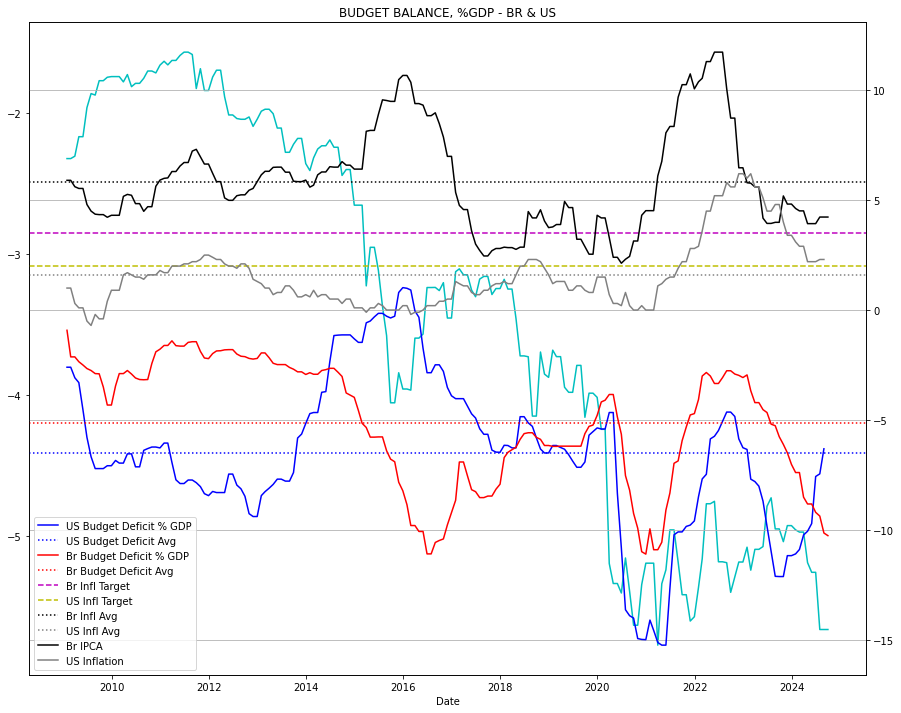

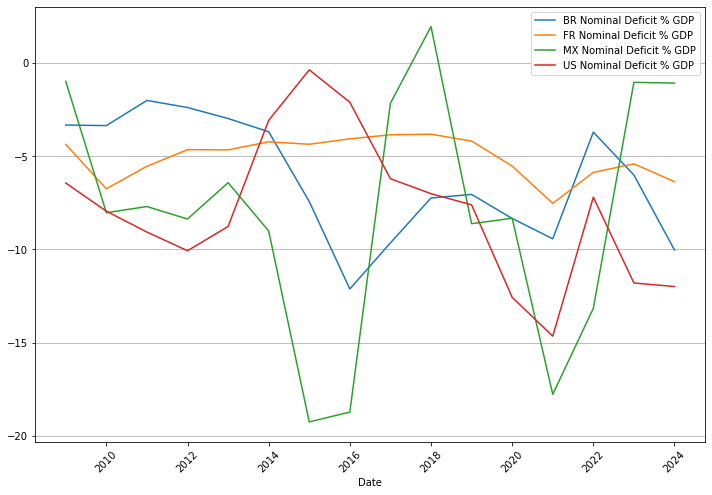

BR Nominal Deficit % GDP  FR Nominal Deficit % GDP  \
Date                                                               
2009                             -3.33                     -4.37   
2010                             -3.36                     -6.75   
2011                             -2.01                     -5.54   
2012                             -2.39                     -4.65   
2013                             -2.98                     -4.66   
2014                             -3.69                     -4.23   
2015                             -7.43                     -4.36   
2016                            -12.12                     -4.07   
2017                             -9.65                     -3.85   
2018                             -7.24                     -3.82   
2019                             -7.05                     -4.19   
2020                             -8.34                     -5.53   
2021                             -9.43                     -7.53   
2022                             -3.71                     -5.87   
2023                             -6.01                     -5.41   
2024                            -10.03                     -6.37   
Last 10y Avg                     -8.10                     -5.10   

              MX Nominal Deficit % GDP  US Nominal Deficit % GDP  
Date                                                              
2009                             -0.99                     -6.44  
2010                             -8.03                     -7.95  
2011                             -7.70                     -9.07  
2012                             -8.37                    -10.07  
2013                             -6.42                     -8.77  
2014                             -9.01                     -3.08  
2015                            -19.25                     -0.37  
2016                            -18.72                     -2.11  
2017                             -2.16                     -6.21  
2018                              1.95                     -7.01  
2019                             -8.62                     -7.61  
2020                             -8.33                    -12.57  
2021                            -17.77                    -14.65  
2022                            -13.16                     -7.20  
2023                             -1.04                    -11.80  
2024                             -1.08                    -11.99  
Last 10y Avg                     -8.82                     -8.15

In [334]:
# SPECIFICS - BR, US

mm_window = 3

fx_df = open_df('fxprices_relation')
brl_s = fx_df['USDBRL']
br_df = open_df('br_macro')
nomD_s = br_df['NOMINAL BUDGET BALANCE']
MnomD_s = nomD_s.copy()
MnomD_s.index = nomD_s.index.map(lambda x: datetime(x.year, x.month, x.day))
MnomD_s = MnomD_s.resample('M').last()
YnomD_s = MnomD_s.rolling(12).sum().dropna()
YnomD_s = YnomD_s.rolling(mm_window).median().dropna()

gdpBR_csv = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\gdp_br.csv")
gdpBR_df = pd.DataFrame(gdpBR_csv)
gdpBR_df = Set_DF(gdpBR_df)
gdpBR_df = DD_Index(gdpBR_df)
old_index = gdpBR_df.index
gdpBR_df.index = gdpBR_df.index.map(lambda x: x.split(' ')[1])
YgdpBR_df = gdpBR_df.groupby(gdpBR_df.index).last()

YnomD_dates_s = YnomD_s.index
YnomD_s.index = YnomD_s.index.map(lambda x: x.year)
gdpBR_ttl_s = YgdpBR_df.sum(axis = 1)
YnomD_df = pd.DataFrame(YnomD_s)
YnomD_df['GDP Br (Last)'] = YnomD_df.index.map(lambda x: gdpBR_ttl_s.loc[str(x)])
YnomD_df.index = YnomD_dates_s
YnomD_df['Br Budget Deficit % GDP'] = round(100 * YnomD_df['NOMINAL BUDGET BALANCE'] / YnomD_df['GDP Br (Last)'], 2)

YnomD_df.index = YnomD_df.index.map(lambda x: x.date())
IPCA_s = br_df['INFLATION RATE YOY']
YnomD_df = YnomD_df.join(IPCA_s).join(brl_s)
YnomD_df = YnomD_df.fillna(method = 'ffill')


usGDP_df = pd.DataFrame([10.25, 10.58, 10.93, 11.46, 12.22, 13.04, 13.82, 14.47, 14.77, 14.48, 15.05, 15.6, 16.25, 16.88, 
                         17.61, 18.3, 18.8, 19.61, 20.66, 21.52, 21.32, 23.59, 25.74, 27.36], 
                        index = np.arange(24) + 2000, columns = ['Nom GDP (tr USD)'])
usGDP_df.loc[2024] = usGDP_df.iloc[-1]

us_df = open_df('us_macro')
usINFL_s =fr_df['INFLATION RATE YOY']
usINFL_s.name = 'US Inflation YoY'
USnomD_s = us_df.T[us_df.columns.map(lambda x: x.find('BUDGET')) != -1].T
USMnomD_s = USnomD_s.copy()
USMnomD_s.index = USnomD_s.index.map(lambda x: datetime(x.year, x.month, x.day))
USMnomD_s = USMnomD_s.resample('M').last()
USYnomD_s = USMnomD_s.rolling(12).sum().dropna()
USYnomD_s = USYnomD_s.rolling(mm_window).median().dropna()

USYnomD_dates_s = USYnomD_s.index
USYnomD_s.index = USYnomD_s.index.map(lambda x: x.year)
USYnomD_df = pd.DataFrame(USYnomD_s)
USYnomD_df['Nom GDP (tr USD)'] = USYnomD_df.index.map(lambda x: usGDP_df.loc[x, 'Nom GDP (tr USD)'])
USYnomD_df.index = USYnomD_dates_s
USYnomD_df['US Budget Deficit % GDP'] = round(USYnomD_df['MONTHLY BUDGET STATEMENT'] / USYnomD_df['Nom GDP (tr USD)'] / 10, 2)
USYnomD_df.index = USYnomD_df.index.map(lambda x: x.date())
USYnomD_df = USYnomD_df.join(usINFL_s) 
USYnomD_df = USYnomD_df.fillna(method = 'ffill')

cutoff_dt = datetime(2009, 1, 1).date()
YnomD_df = YnomD_df[YnomD_df.index >= cutoff_dt]
USYnomD_df = USYnomD_df[USYnomD_df.index >= cutoff_dt]

(-YnomD_df['USDBRL']).plot(c = 'c', label = 'USDBRL').twinx()
USYnomD_df['US Budget Deficit % GDP'].plot(c = 'b', figsize = (15, 12))
plt.axhline(y = USYnomD_df['US Budget Deficit % GDP'].mean(), c = 'b', linestyle = 'dotted', label = 'US Budget Deficit Avg') 
YnomD_df['Br Budget Deficit % GDP'].plot(c = 'r')
plt.axhline(y = YnomD_df['Br Budget Deficit % GDP'].mean(), c = 'r', linestyle = 'dotted', label = 'Br Budget Deficit Avg') 
plt.axhline(y = 3.5, c = 'm', linestyle = 'dashed', label = 'Br Infl Target')
plt.axhline(y = 2, c = 'y', linestyle = 'dashed', label = 'US Infl Target')
plt.axhline(y = YnomD_df['INFLATION RATE YOY'].mean(), c = 'k', linestyle = 'dotted', label = 'Br Infl Avg')
plt.axhline(y = USYnomD_df['US Inflation YoY'].mean(), c = '0.5', linestyle = 'dotted', label = 'US Infl Avg')
YnomD_df['INFLATION RATE YOY'].plot(c= 'k', label = 'Br IPCA')
USYnomD_df['US Inflation YoY'].plot(c= '0.5', label = 'US Inflation').legend(loc = 'best')
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.title('BUDGET BALANCE, %GDP - BR & US')
plt.show()

NYnomD_df = YnomD_df.copy()
NYnomD_df.index = NYnomD_df.index.map(lambda x: datetime(x.year, x.month, x.day))
NY_ND_s = NYnomD_df.resample('Y').sum()[NYnomD_df.columns[0]]
NY_GDP_s = NYnomD_df.resample('Y').last()[NYnomD_df.columns[1]]
NY_ND_s /= NY_GDP_s.index.map(lambda x: NY_GDP_s.loc[x])
NY_ND_s *= 10
NY_ND_s.iloc[-1] = NYnomD_df[NYnomD_df.columns[0]][-12:].sum() / NYnomD_df[NYnomD_df.columns[1]].iloc[-1] * 10
NY_ND_s.name = 'BR Nominal Deficit % GDP'

USNYnomD_df = USYnomD_df.copy()
USNYnomD_df.index = USNYnomD_df.index.map(lambda x: datetime(x.year, x.month, x.day))
USNY_ND_s = USNYnomD_df.resample('Y').sum()[USNYnomD_df.columns[0]]
USNY_GDP_s = USNYnomD_df.resample('Y').last()[USNYnomD_df.columns[1]]
USNY_ND_s /= USNY_GDP_s.index.map(lambda x: USNY_GDP_s.loc[x])
USNY_ND_s /= 100
USNY_ND_s.iloc[-1] = USNYnomD_df[USNYnomD_df.columns[0]][-12:].sum() / USNYnomD_df[USNYnomD_df.columns[1]].iloc[-1] / 100
USNY_ND_s.name = 'US Nominal Deficit % GDP'

SUmmary_ND_df = round(pd.DataFrame(NY_ND_s).join(FRNY_ND_s).join(MXNY_ND_s).join(USNY_ND_s), 2)
SUmmary_ND_df.index = SUmmary_ND_df.index.map(lambda x: x.year)
SUmmary_ND_df.plot(figsize = (12, 8)).legend(loc = 'best')
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.show()
SUmmary_ND_df.loc['Last 10y Avg'] = round(SUmmary_ND_df[-10:].mean(), 2)
SUmmary_ND_df

Plot mkt graphs (Y/y or empty)? 
Enter Start Date (empty for 01-Jan-2015, or YY/MM/DD): 


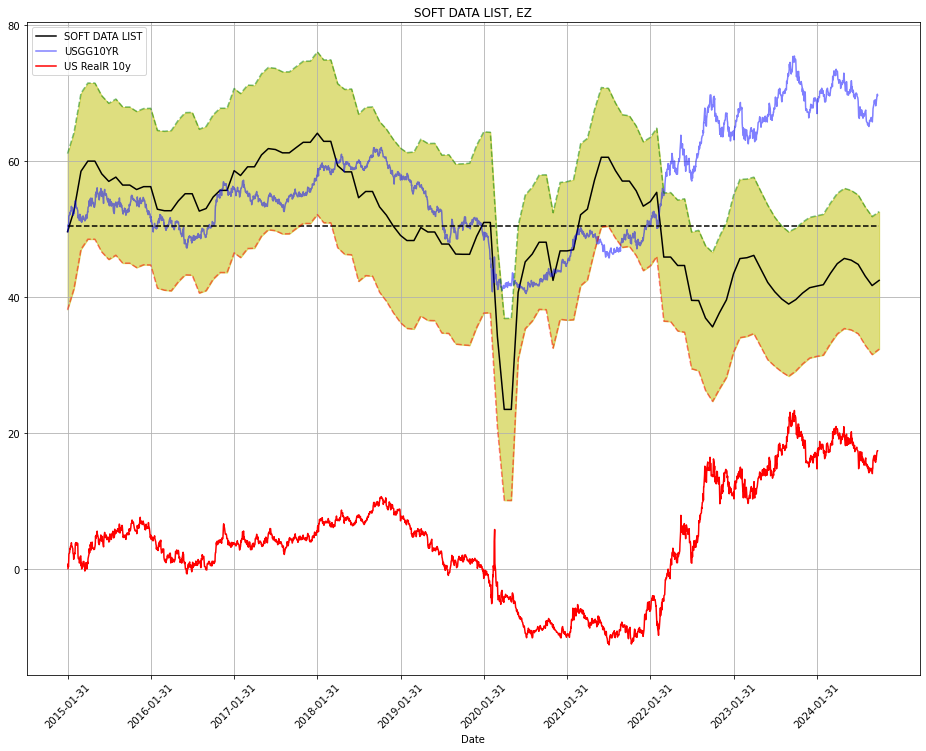

['S&P GLOBAL COMPOSITE PMI_Eur',
 'S&P GLOBAL MANUFACTURING PMI_Eur',
 'S&P GLOBAL SERVICES PMI_Eur',
 'ECONOMIC SENTIMENT_Eur',
 'INDUSTRIAL SENTIMENT_Eur',
 'SERVICES SENTIMENT_Eur',
 'ZEW ECONOMIC SENTIMENT INDEX_Eur',
 'CONSUMER CONFIDENCE_Eur',
 'S&P GLOBAL COMPOSITE PMI_Ger',
 'S&P GLOBAL CONSTRUCTION PMI_Ger',
 'S&P GLOBAL MANUFACTURING PMI_Ger',
 'S&P GLOBAL SERVICES PMI_Ger',
 'ZEW ECONOMIC SENTIMENT INDEX_Ger',
 'GFK CONSUMER CONFIDENCE_Ger',
 'IFO BUSINESS CLIMATE_Ger',
 'IFO CURRENT CONDITIONS_Ger',
 'IFO EXPECTATIONS_Ger',
 'ZEW CURRENT CONDITIONS_Ger',
 'S&P GLOBAL COMPOSITE PMI_Fra',
 'S&P GLOBAL MANUFACTURING PMI_Fra',
 'S&P GLOBAL SERVICES PMI_Fra',
 'BUSINESS CONFIDENCE_Fra',
 'CONSUMER CONFIDENCE_Fra',
 'S&P GLOBAL COMPOSITE PMI_Esp',
 'S&P GLOBAL MANUFACTURING PMI_Esp',
 'S&P GLOBAL SERVICES PMI_Esp',
 'S&P GLOBAL COMPOSITE PMI_Ita',
 'S&P GLOBAL MANUFACTURING PMI_Ita',
 'S&P GLOBAL SERVICES PMI_Ita',
 'CONSUMER CONFIDENCE_Ita',
 'BUSINESS CONFIDENCE_Ita',
 'NEVI MA

In [5]:
#Builds macro graphs

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df 

def open_df(*args):
    open_str = args[0]
    
    query_open = 'SELECT * FROM ' + open_str
    opened_df = pd.read_sql_query(query_open, engine)
    opened_df = Set_DF(opened_df)
    opened_df = DD_Index(opened_df)
    opened_df = opened_df.sort_index()
    
    return opened_df

def on_selection_regions(value):
    global region_option
    region_option = value
    root.destroy() 
    
def on_selection_options(value):
    global opt_option
    opt_option = value
    root.destroy()     

dm1_l = ['USA', 'Eur', 'Ger', 'Fra', 'Esp', 'Can', 'Ita', 'Aus', 'Jpn', 'Swe', 'Swz', 'Nth', 'Skr', 'Gbr']
dm2_l = ['USA', 'Eur', 'Can', 'Aus', 'Gbr', 'Jpn']
em_l = ['Mxn', 'Ind', 'Bra', 'Sgp', 'Hkg', 'Chn', 'Mya', 'Tha', 'Phi', 'Ido', 'RSA', 'Vtn']
ez_l = ['Eur', 'Ger', 'Fra', 'Esp', 'Ita', 'Nth']
g3_l = ['USA', 'Eur', 'Ger', 'Fra', 'Esp', 'Can', 'Ita', 'Aus', 'Nth', 'Gbr']
asia_l = ['Chn', 'Sgp', 'Hkg', 'Mya', 'Tha', 'Phi', 'Ido', 'Vtn']
emtoxic_l = ['Mxn', 'Ind', 'Bra', 'RSA']
all_l = ['USA', 'Eur', 'Ger', 'Fra', 'Esp', 'Can', 'Ita', 'Aus', 'Jpn', 'Swe', 'Swz', 'Nth', 'Skr', 'Gbr', 
         'Mxn', 'Ind', 'Bra', 'Sgp', 'Hkg', 'Chn', 'Mya', 'Tha', 'Phi', 'Ido', 'RSA', 'Vtn']

options_l = ['DM large', 'DM narrow', 'G3', 'EM', 'EZ', 'ASIA', 'EM_Toxic', 'ALL']
options_dikt = {'DM large': dm1_l, 'DM narrow': dm2_l, 'EM': em_l, 'EZ': ez_l, 'G3': g3_l, 'ASIA': asia_l, 
                'EM_Toxic': emtoxic_l, 'ALL': all_l}

macro_dikt = {'Eur': 'EA', 'Ger': 'DE', 'USA': 'US', 'Fra': 'FR', 'Esp': 'ES', 'Can': 'CA', 'Ita': 'IT', 
              'Aus': 'AU', 'Jpn': 'JP', 'Swe': 'SE', 'Swz': 'CH', 'Nth': 'NL', 'Skr': 'KR', 'Gbr': 'GB', 
              'Ind': 'IN', 'Bra': 'BR', 'Mxn': 'MX', 'Sgp': 'SG', 'Hkg': 'HK', 'Chn': 'CN', 'Mya': 'MY', 
              'Tha': 'TH', 'Phi': 'PH', 'Ido': 'ID', 'RSA': 'ZA', 'Vtn': 'VN'}

PMI_l = ['PMI', 'ISM', 'SENTIMENT', 'OPTIMISM', 'CONFIDENCE', 'BUSINESS', 'EMPIRE', 'PHILADELPHIA', 'CHICAGO', 
         'KANSAS', 'DALLAS', 'RICHMOND', 'NAHB', 'IFO', 'ZEW', 'GFK', 'SURVEY']
HD_l = ['RETAIL SALES', 'INDUSTRIAL PRODUCTION', 'IP YOY', 'RS YOY']
CPI_l = ['INFLATION', 'CPI', 'PPI', 'PCE', 'HICP', 'CPIF', 'HOURLY EARNINGS YOY']
HOUSING_l = ['HOUSING STARTS', 'BUILDING PERMITS', 'EXISTING HOME SALES', 'HOUSE', 'SHILLER']
UR_l = ['UNEMPLOYMENT RATE', 'UNDEREMPLOYMENT']
CUSTOM_l = ['SOFT DATA LIST', 'HARD DATA LIST', 'INFLATION LIST', 'HOUSING LIST', 'UR LIST', 'keywords']

custom_dikt = {'SOFT DATA LIST': PMI_l, 'HARD DATA LIST': HD_l, 'INFLATION LIST': CPI_l, 
               'HOUSING LIST': HOUSING_l, 'UR LIST': UR_l}

Prices_df = open_df('prices_relation')
spx_series = Prices_df['SPX']
qqq_series = Prices_df['QQQ US']
arkk_series = Prices_df['ARKK US']
tsy_series = Prices_df['USGG10YR']
arkk_series = arkk_series ** (-1)
arkk_series /= arkk_series.iloc[0]
    
root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *(options_l + all_l), command = on_selection_regions)
tk.Label(root, text = "Choose Region: ").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()    

if (region_option in all_l):
    country_l = [region_option]
else:
    country_l = options_dikt[region_option]

root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *CUSTOM_l, command = on_selection_options)
tk.Label(root, text = "OPTIONS: ").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()    
    
if (opt_option == 'keywords'):    
    kw_l = []
    more = True
    while (more):
        kw = input('Enter Keyword: ').upper()
        if (kw == ''):
            more = False       
        else:
            kw_l.append(kw)     
else:
    kw_l = custom_dikt[opt_option]  
        
mkt_graphs = input('Plot mkt graphs (Y/y or empty)? ').upper()        
plot_expectations = False        
addYOY_from_MOM = True
if (len(kw_l) > 0):
    default_start = datetime(2015, 1, 1).date()
    st_date = input('Enter Start Date (empty for 01-Jan-2015, or YY/MM/DD): ')
    try:
        st_date = datetime.strptime(st_date, "%y/%m/%d").date()
    except:
        st_date = default_start
    
    if ('INFLATION' in kw_l) | ('CPI' in kw_l) | ('PCE' in kw_l):
        plot_expectations = True
        exp10y_s = Prices_df[Prices_df.index >= st_date]['T10YIE']
        exp10y_s.name = '10y Exp'
        exp5y5y_s = Prices_df[Prices_df.index >= st_date]['T5YIFR']
        exp5y5y_s.name = '5y5y Exp'        
    
    first_r = True
    for idx, c_country in enumerate(country_l):
            
        rel_str = macro_dikt[c_country] + '_Macro'
        cmacro_df = open_df(rel_str)
        Ocmacro_df = cmacro_df.copy()
        cmacro_df = cmacro_df[cmacro_df.index >= st_date]
        MOMexc_l1 = cmacro_df.T[cmacro_df.columns.map(lambda x: x.find('MOM')) != -1].index.tolist()
        MOMexc_l2 = cmacro_df.T[cmacro_df.columns.map(lambda x: x.find('QOQ')) != -1].index.tolist()
        MOMexc_l = pd.unique(MOMexc_l1 + MOMexc_l2).tolist()
        cmacro_df = cmacro_df.drop(MOMexc_l, axis = 1)                                    
        cmacro_df.columns = cmacro_df.columns.map(lambda x: x + '_' + c_country)
        for n, c_kw in enumerate(kw_l):
            Scmacro_df = cmacro_df.T[cmacro_df.columns.map(lambda x: x.find(c_kw)) != -1].T
            if (n == 0):
                Fcmacro_df = Scmacro_df.copy()
            else:
                exc_l = [c for c in Scmacro_df.columns if c in Fcmacro_df]
                Scmacro_df = Scmacro_df.drop(exc_l, axis = 1)
                if (Scmacro_df.shape[1] > 0):
                    Fcmacro_df = Fcmacro_df.join(Scmacro_df)                   

        if (Fcmacro_df.shape[1] > 0):
            Fcmacro_df.index = Fcmacro_df.index.map(lambda x: datetime(x.year, x.month, x.day))
            RScmacro_df = Fcmacro_df.resample('M').last()
            if (first_r):
                Final_df = RScmacro_df.copy()
                first_r = False
            else:
                Final_df = Final_df.join(RScmacro_df)
        else:
            if (Final_df.shape[1] == 0):
                first_r = True
                
        if (addYOY_from_MOM):
            for c_yoy in MOMexc_l1:
                yoy_eq = c_yoy.split('MOM')[0] + 'YOY' + '_' + c_country
                if (yoy_eq not in Final_df.columns):
                    add_yoy = False
                    for c_kw in kw_l:
                        if (yoy_eq.find(c_kw) != -1):                          
                            add_yoy = True
                    if (add_yoy):   
                        add_YOY_s = Ocmacro_df[c_yoy]
                        add_YOY_s.index = add_YOY_s.index.map(lambda x: datetime(x.year, x.month, x.day))
                        Radd_YOY_s = add_YOY_s.resample('M').last()
                        idx_Add_s = (1 + Radd_YOY_s / 100).expanding().apply(np.prod)
                        idx_YOY_s = round(100 * (idx_Add_s / idx_Add_s.shift(12) - 1), 2).dropna()    
                        
                        Final_df[yoy_eq] = np.nan
                        Final_df.loc[Final_df[Final_df.index >= idx_YOY_s.index[0]].index, 
                                     yoy_eq] = idx_YOY_s.loc[Final_df[Final_df.index >= idx_YOY_s.index[0]].index].values                         
            
        
Final_df = Final_df.dropna(how = 'all') 
spx_series = spx_series[spx_series.index >= Final_df.index[0]]
qqq_series = qqq_series[qqq_series.index >= Final_df.index[0]]
arkk_series = arkk_series[arkk_series.index >= Final_df.index[0]]
tsy_series = tsy_series[tsy_series.index >= Final_df.index[0]]
rr10y_s = Prices_df[Prices_df.index >= Final_df.index[0]]['USGG10YR'] - Prices_df[Prices_df.index >= Final_df.index[0]]['T10YIE']
rr10y_s.name = 'US RealR 10y'

Final_df.index = Final_df.index.map(lambda x: x.date())
std_s = Final_df.rolling(12).mean().std(axis = 1).fillna(method = 'bfill')
mean_s = Final_df.mean(axis = 1)
tsy_series = tsy_series * (mean_s.std() / tsy_series.std())
rr10y_s = rr10y_s * (mean_s.std() / rr10y_s.std())
tsy_series = tsy_series + mean_s.iloc[0] - tsy_series.iloc[0]
spx_series = spx_series * (mean_s.std() / spx_series.std())
spx_series = spx_series + mean_s.iloc[0] - spx_series.iloc[0]
qqq_series = qqq_series * (mean_s.std() / qqq_series.std())
qqq_series = qqq_series + mean_s.iloc[0] - qqq_series.iloc[0]
arkk_series = arkk_series * (mean_s.std() / arkk_series.std())
arkk_series = arkk_series + mean_s.iloc[0] - arkk_series.iloc[0]

upper_s = mean_s + (std_s / 4)
lower_s = mean_s - (std_s / 4)

if (opt_option == 'keywords'):
    mean_s.plot(c = 'k', figsize = (16, 12), label = kw_l[0])
else:
    mean_s.plot(c = 'k', figsize = (16, 12), label = opt_option)
if (plot_expectations):
    exp10y_s = 10 * (exp10y_s - exp10y_s.mean())
    exp10y_s = exp10y_s + (mean_s.iloc[0] - exp10y_s.iloc[0])
    exp5y5y_s = 10 * (exp5y5y_s - exp5y5y_s.mean())
    exp5y5y_s = exp5y5y_s + (mean_s.iloc[0] - exp5y5y_s.iloc[0])    
    exp10y_s.plot(c = 'm', alpha = 0.5)
    exp5y5y_s.plot(c = 'y', alpha = 0.5)
    plt.plot(mean_s.index, np.ones(mean_s.shape[0]) * exp10y_s.mean(), c = 'b', linestyle = 'dashed')
    plt.plot(mean_s.index, np.ones(mean_s.shape[0]) * exp5y5y_s.mean(), c = 'g', linestyle = 'dashed')
    plt.plot(mean_s.index, np.ones(mean_s.shape[0]) * 2, c = 'b')
if (mkt_graphs):
    spx_series.plot(c = 'm', alpha = .5)
    qqq_series.plot(c = 'y', alpha = .5, label = 'QQQ')
    arkk_series.plot(c = 'k', alpha = .5, label = 'ARKK Inv')
tsy_series.plot(c = 'b', alpha = .5)
rr10y_s.plot(c = 'r').legend(loc = 'best')
plt.plot(mean_s.index, np.ones(mean_s.shape[0]) * mean_s.mean(), c = 'k', linestyle = 'dashed')
upper_s.plot(c = 'g', linestyle = 'dashed', alpha = .5)
lower_s.plot(c = 'r', linestyle = 'dashed', alpha = .5)
plt.fill_between(mean_s.index, lower_s.values, upper_s.values, color = 'y', alpha = 0.5)
if (opt_option == 'keywords'):
    plt.title(kw_l[0] + ', ' + region_option)
else:
    plt.title(opt_option + ', ' + region_option)
plt.xticks(Final_df.index[::int(round(Final_df.shape[0] / 10, 0))], rotation = 45)
plt.grid()
plt.show()   

Final_df.columns.tolist()

Enter Start Date (empty for 01-Jan-2015, or YY/MM/DD): 


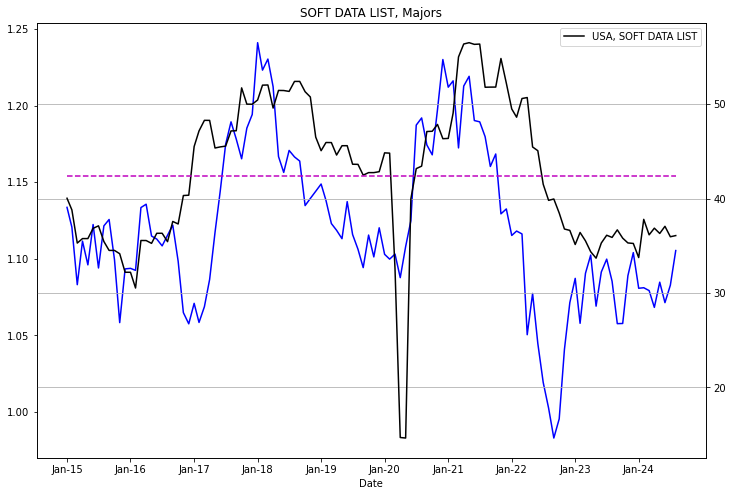


['ISM MANUFACTURING PMI_USA', 'ISM NON-MANUFACTURING PMI_USA', 'CHICAGO PMI_USA', 'S&P GLOBAL COMPOSITE PMI_USA', 'S&P GLOBAL MANUFACTURING PMI_USA', 'S&P GLOBAL SERVICES PMI_USA', 'ISM MANUFACTURING EMPLOYMENT_USA', 'ISM MANUFACTURING NEW ORDERS_USA', 'ISM MANUFACTURING PRICES_USA', 'ISM NON-MANUFACTURING EMPLOYMENT_USA', 'ISM NON-MANUFACTURING NEW ORDERS_USA', 'ISM NON-MANUFACTURING PRICES_USA', 'ISM NON-MANUFACTURING BUSINESS ACTIVITY_USA', 'NFIB BUSINESS OPTIMISM INDEX_USA', 'ISM MANUFACTURING INVENTORIES_USA', 'MICHIGAN CONSUMER SENTIMENT_USA', 'CB CONSUMER CONFIDENCE_USA', 'NY EMPIRE STATE MANUFACTURING INDEX_USA', 'PHILADELPHIA FED MANUFACTURING INDEX_USA', 'PHILADELPHIA FED PRICES PAID_USA', 'PHILADELPHIA FED EMPLOYMENT_USA', 'PHILADELPHIA FED CAPEX INDEX_USA', 'CHICAGO FED NATIONAL ACTIVITY INDEX_USA', 'KANSAS FED COMPOSITE INDEX_USA', 'DALLAS FED MANUFACTURING INDEX_USA', 'RICHMOND FED MANUFACTURING INDEX_USA', 'NAHB HOUSING MARKET INDEX_USA', 'BUSINESS INVENTORIES YOY_USA']

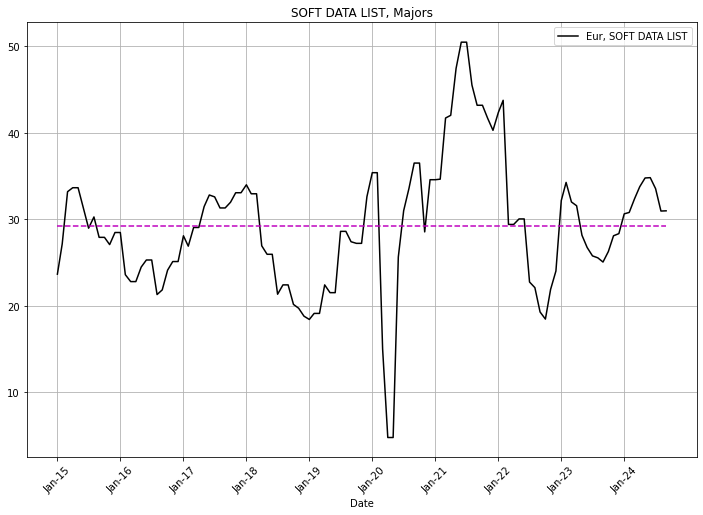


['S&P GLOBAL COMPOSITE PMI_Eur', 'S&P GLOBAL MANUFACTURING PMI_Eur', 'S&P GLOBAL SERVICES PMI_Eur', 'ECONOMIC SENTIMENT_Eur', 'INDUSTRIAL SENTIMENT_Eur', 'SERVICES SENTIMENT_Eur', 'ZEW ECONOMIC SENTIMENT INDEX_Eur', 'CONSUMER CONFIDENCE_Eur']



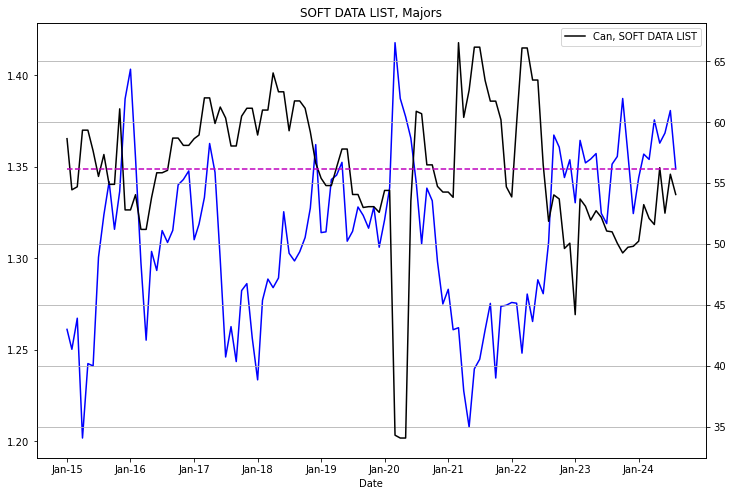


['IVEY PMI S.A_Can', 'S&P GLOBAL MANUFACTURING PMI_Can', 'CFIB BUSINESS BAROMETER_Can']

No FX available...


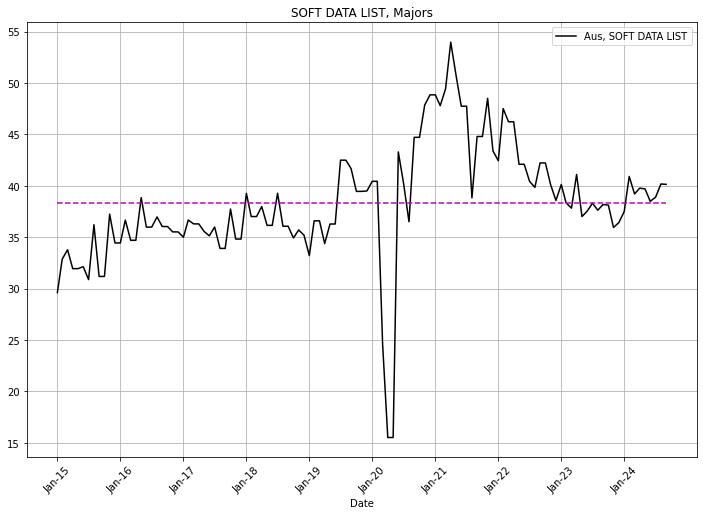


['S&P GLOBAL COMPOSITE PMI_Aus', 'S&P GLOBAL MANUFACTURING PMI_Aus', 'S&P GLOBAL SERVICES PMI_Aus', 'NAB BUSINESS CONFIDENCE_Aus', 'WESTPAC CONSUMER CONFIDENCE INDEX_Aus', 'WESTPAC CONSUMER CONFIDENCE CHANGE_Aus']

No FX available...


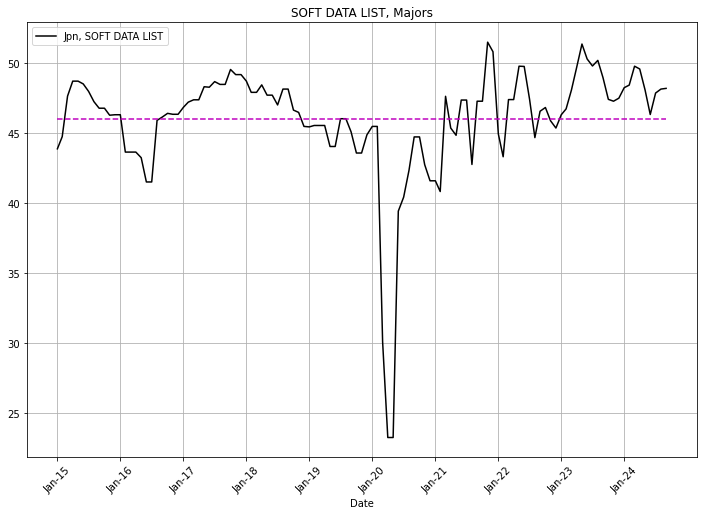


['JIBUN BANK COMPOSITE PMI_Jpn', 'JIBUN BANK MANUFACTURING PMI_Jpn', 'JIBUN BANK SERVICES PMI_Jpn', 'CONSUMER CONFIDENCE_Jpn', 'ECO WATCHERS SURVEY CURRENT_Jpn', 'ECO WATCHERS SURVEY OUTLOOK_Jpn']

No FX available...


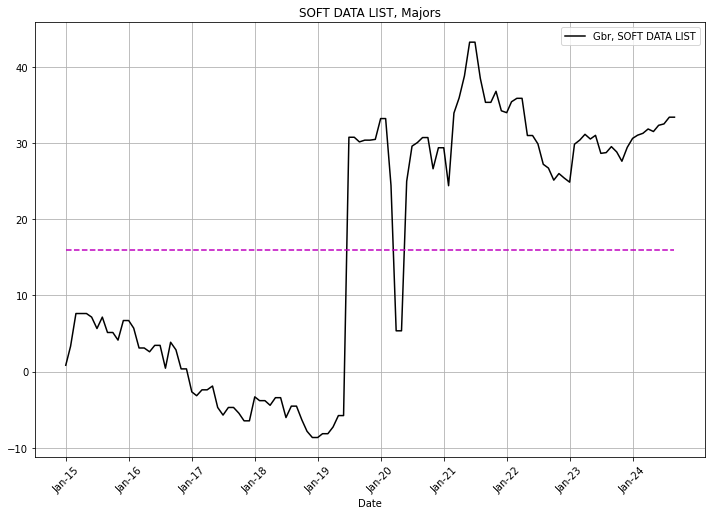


['S&P GLOBAL/CIPS COMPOSITE PMI_Gbr', 'S&P GLOBAL/CIPS CONSTRUCTION PMI_Gbr', 'S&P GLOBAL/CIPS MANUFACTURING PMI_Gbr', 'S&P GLOBAL/CIPS UK SERVICES PMI_Gbr', 'BUSINESS INVESTMENT YOY PRE_Gbr', 'GFK CONS CONF_Gbr']

No FX available...


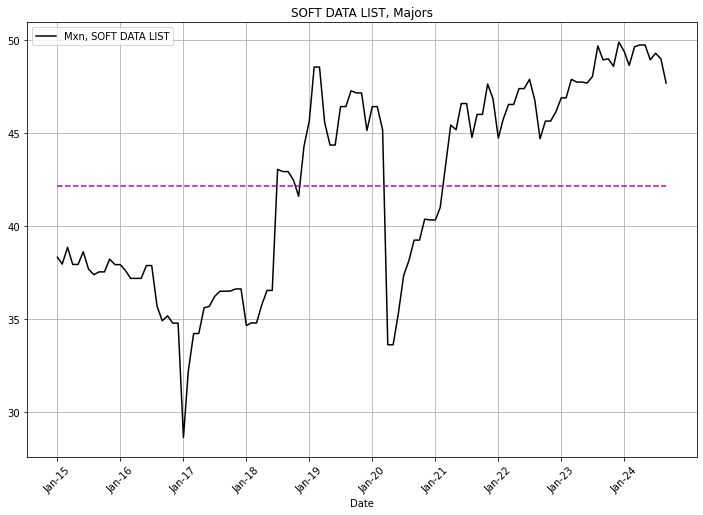


['S&P GLOBAL MANUFACTURING PMI_Mxn', 'CONSUMER CONFIDENCE_Mxn']

No FX available...


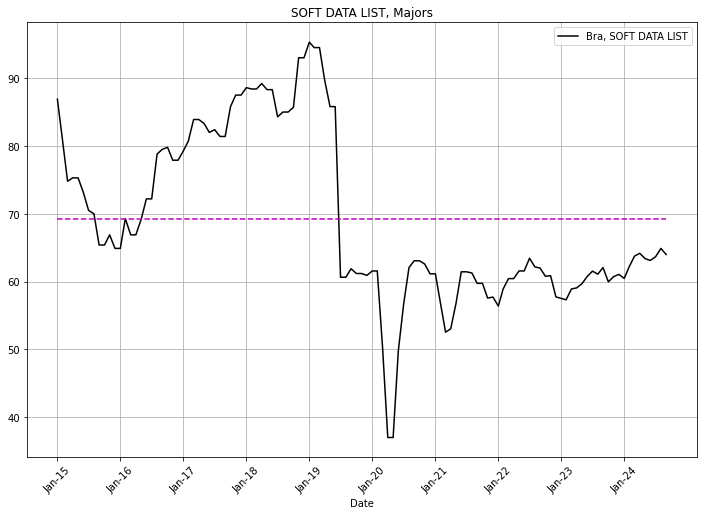


['S&P GLOBAL COMPOSITE PMI_Bra', 'S&P GLOBAL MANUFACTURING PMI_Bra', 'S&P GLOBAL SERVICES PMI_Bra', 'FGV CONSUMER CONFIDENCE_Bra']



In [205]:
#Builds individual macro graphs vs FX

import pandas as pd
import numpy as np
import math
import os
import csv
import yfinance as yf
#import mysql.connector
import psycopg2
import requests
import json
import tkinter as tk
import re
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from datetime import date
from sklearn.linear_model import LinearRegression
from sqlalchemy import create_engine

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df 

def open_df(*args):
    open_str = args[0]
    
    query_open = 'SELECT * FROM ' + open_str
    opened_df = pd.read_sql_query(query_open, engine)
    opened_df = Set_DF(opened_df)
    opened_df = DD_Index(opened_df)
    opened_df = opened_df.sort_index()
    
    return opened_df

def on_selection_regions(value):
    global region_option
    region_option = value
    root.destroy() 
    
def on_selection_options(value):
    global opt_option
    opt_option = value
    root.destroy()     

majors = ['USA', 'Eur', 'Can', 'Aus', 'Jpn', 'Gbr', 'Mxn', 'Bra']
DM_majors = ['USA', 'Eur', 'Can', 'Aus', 'Jpn', 'Gbr']
EM_majors = ['Mxn', 'Bra']

options_l = ['Majors', 'DM majors', 'EM majors']
all_l = ['USA', 'Eur', 'Can', 'Aus', 'Jpn', 'Gbr', 'Mxn', 'Bra']

options_dikt = {'Majors': majors, 'DM majors': DM_majors, 'EM majors': EM_majors}

macro_dikt = {'Eur': 'EA', 'Ger': 'DE', 'USA': 'US', 'Fra': 'FR', 'Esp': 'ES', 'Can': 'CA', 'Ita': 'IT', 
              'Aus': 'AU', 'Jpn': 'JP', 'Swe': 'SE', 'Swz': 'CH', 'Nth': 'NL', 'Skr': 'KR', 'Gbr': 'GB', 
              'Ind': 'IN', 'Bra': 'BR', 'Mxn': 'MX', 'Sgp': 'SG', 'Hkg': 'HK', 'Chn': 'CN', 'Mya': 'MY', 
              'Tha': 'TH', 'Phi': 'PH', 'Ido': 'ID', 'RSA': 'ZA', 'Vtn': 'VN'}
fx_dikt = {'Eur': 'EURUSD', 'USA': 'EURUSD', 'Can': 'USDCAD', 'Aus': 'AUDUSD', 'Jpn': 'USDJPY', 'Gbr': 'GBPUSD', 
           'Bra': 'USDBRL', 'Mxn': 'USDMXN'}

PMI_l = ['PMI', 'ISM', 'SENTIMENT', 'OPTIMISM', 'CONFIDENCE', 'BUSINESS', 'EMPIRE', 'PHILADELPHIA', 'CHICAGO', 
         'KANSAS', 'DALLAS', 'RICHMOND', 'NAHB', 'IFO', 'ZEW', 'GFK', 'SURVEY']
HD_l = ['RETAIL SALES', 'INDUSTRIAL PRODUCTION', 'IP YOY', 'RS YOY']
CPI_l = ['INFLATION', 'CPI', 'PPI', 'PCE', 'HICP', 'IGP-M', 'CPIF']
HOUSING_l = ['HOUSING STARTS', 'BUILDING PERMITS', 'EXISTING HOME SALES']
UR_l = ['UNEMPLOYMENT RATE', 'UNDEREMPLOYMENT']
TRADE_l = ['TRADE BALANCE', 'BALANCE OF TRADE', 'TRADE BAL']
CA_l = ['CURRENT ACCOUNT', 'CA BAL', 'CURR ACCT']

CUSTOM_l = ['TRADE LIST', 'CA LIST', 'SOFT DATA LIST', 'HARD DATA LIST', 'INFLATION LIST', 'HOUSING LIST', 'UR LIST', 'keywords']

custom_dikt = {'CA LIST': CA_l, 'SOFT DATA LIST': PMI_l, 'HARD DATA LIST': HD_l, 'INFLATION LIST': CPI_l, 
               'TRADE LIST': TRADE_l, 'HOUSING LIST': HOUSING_l, 'UR LIST': UR_l}

FX_Prices_df = open_df('fxprices_relation')
 
root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *(options_l + all_l), command = on_selection_regions)
tk.Label(root, text = "Choose Region: ").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()    

if (region_option in all_l):
    country_l = [region_option]
else:
    country_l = options_dikt[region_option]

root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *CUSTOM_l, command = on_selection_options)
tk.Label(root, text = "OPTIONS: ").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()    
    
if (opt_option == 'keywords'):    
    kw_l = []
    more = True
    while (more):
        kw = input('Enter Keyword: ').upper()
        if (kw == ''):
            more = False       
        else:
            kw_l.append(kw)     
else:
    kw_l = custom_dikt[opt_option]  
        
addYOY_from_MOM = True
if (len(kw_l) > 0):
    default_start = datetime(2015, 1, 1).date()
    st_date = input('Enter Start Date (empty for 01-Jan-2015, or YY/MM/DD): ')
    try:
        st_date = datetime.strptime(st_date, "%y/%m/%d").date()
    except:
        st_date = default_start    
    
    for idx, c_country in enumerate(country_l):
            
        rel_str = macro_dikt[c_country] + '_Macro'
        cmacro_df = open_df(rel_str)
        Ocmacro_df = cmacro_df.copy()
        cmacro_df = cmacro_df[cmacro_df.index >= st_date]
        MOMexc_l1 = cmacro_df.T[cmacro_df.columns.map(lambda x: x.find('MOM')) != -1].index.tolist()
        MOMexc_l2 = cmacro_df.T[cmacro_df.columns.map(lambda x: x.find('QOQ')) != -1].index.tolist()
        MOMexc_l3 = cmacro_df.T[cmacro_df.columns.map(lambda x: x.find('WEEKLY')) != -1].index.tolist()
        MOMexc_l = pd.unique(MOMexc_l1 + MOMexc_l2 + MOMexc_l3).tolist()
        cmacro_df = cmacro_df.drop(MOMexc_l, axis = 1)
        cmacro_df.columns = cmacro_df.columns.map(lambda x: x + '_' + c_country)
        for n, c_kw in enumerate(kw_l):
            Scmacro_df = cmacro_df.T[cmacro_df.columns.map(lambda x: x.find(c_kw)) != -1].T
            if (n == 0):
                Fcmacro_df = Scmacro_df.copy()
            else:
                exc_l = [c for c in Scmacro_df.columns if c in Fcmacro_df]
                Scmacro_df = Scmacro_df.drop(exc_l, axis = 1)
                if (Scmacro_df.shape[1] > 0):
                    Fcmacro_df = Fcmacro_df.join(Scmacro_df)

        Fcmacro_df.index = Fcmacro_df.index.map(lambda x: datetime(x.year, x.month, x.day))
        Final_df = Fcmacro_df.resample('M').last()        
        Final_df = Final_df.dropna(how = 'all')         
        
        if (addYOY_from_MOM):
            for c_yoy in MOMexc_l1:
                yoy_eq = c_yoy.split('MOM')[0] + 'YOY' + '_' + c_country
                if (yoy_eq not in Final_df.columns):
                    add_yoy = False
                    for c_kw in kw_l:
                        if (yoy_eq.find(c_kw) != -1):                          
                            add_yoy = True
                    if (add_yoy):   
                        add_YOY_s = Ocmacro_df[c_yoy]
                        add_YOY_s.index = add_YOY_s.index.map(lambda x: datetime(x.year, x.month, x.day))
                        Radd_YOY_s = add_YOY_s.resample('M').last()
                        idx_Add_s = (1 + Radd_YOY_s / 100).expanding().apply(np.prod)
                        idx_YOY_s = round(100 * (idx_Add_s / idx_Add_s.shift(12) - 1), 2).dropna() 
                        Final_df[yoy_eq] = np.nan
                        Final_df.loc[Final_df[Final_df.index >= idx_YOY_s.index[0]].index, 
                                     yoy_eq] = idx_YOY_s.loc[Final_df[Final_df.index >= idx_YOY_s.index[0]].index].values       
        
        Final_df.index = Final_df.index.map(lambda x: x.date())
        Final_df = Final_df.T.dropna(how = 'all').T
        if (Final_df.shape[1] > 0) & (Final_df.shape[0] > 0):
            mean_s = Final_df.mean(axis = 1)
#           mean_s /= abs(mean_s.iloc[0])
            
            try:
                fx_s = FX_Prices_df[fx_dikt[c_country]]
                fx_s.index = fx_s.index.map(lambda x: datetime(x.year, x.month, x.day))
                Rfx_s = fx_s.resample('M').last()
                Rfx_s.index = Rfx_s.index.map(lambda x: x.date())            
                Rfx_s.loc[mean_s.index].plot(figsize = (12, 8), c = 'b').twinx()
            except:
                print('No FX available...')
            
            mean_s.plot(figsize = (12, 8), c = 'k', label = c_country + ', ' + opt_option).legend(loc = 'best')
            plt.plot(mean_s.index, np.ones(mean_s.shape[0]) * mean_s.mean(), c = 'm', linestyle = 'dashed')            
            if (opt_option == 'keywords'):
                plt.title(kw_l[0] + ', ' + region_option)
            else:
                plt.title(opt_option + ', ' + region_option)
            plt.xticks(Final_df.index[:: int(round(Final_df.shape[0] / 10, 0))], 
                       Final_df.index.map(lambda x: x.strftime('%b-%y'))[:: int(round(Final_df.shape[0] / 10, 0))], rotation = 45)
            plt.grid()
            plt.show()   

            print('')
            print(Final_df.columns.tolist())
            print('')

Input region: US
Leading? (Y/N): N
Normalize? (Y/N): Y
Correlation floor (0-1): 0.2
                                     -100  Forecasts CORE INFLATION RATE YOY
CORE INFLATION RATE YOY d                                                   
ISM NON-MANUFACTURING PRICES     0.916265                           3.721054
CORE PPI YOY                     0.891279                           5.391224
PPI EX-FOOD/ENERGY/TRADE YOY     0.882043                           6.000000
CORE INFLATION RATE YOY          0.851187                           6.510712
CORE PCE PRICE INDEX YOY         0.836304                           6.216582
PPI YOY                          0.833251                           5.123102
SMH US                           0.810676                           5.604991
JOLTS JOB OPENINGS               0.775246                           5.500171
GDP PRICE INDEX QOQ              0.750485                           3.368115
CORE PCE PRICES QOQ              0.730316                           5

                                      -40  Forecasts CORE INFLATION RATE YOY
CORE INFLATION RATE YOY d                                                   
CORE INFLATION RATE YOY          0.954515                           6.568161
CORE PPI YOY                     0.921460                           5.671131
PPI EX-FOOD/ENERGY/TRADE YOY     0.919284                           5.900000
CORE PCE PRICE INDEX YOY         0.918150                           6.535805
ISM NON-MANUFACTURING PRICES     0.881280                           5.746180
PPI YOY                          0.873032                           5.380699
EMPLOYMENT COST INDEX QO         0.817792                           5.315090
EMPLOYMENT COST - WAGES QO       0.795393                           5.431685
GDP PRICE INDEX QOQ              0.783069                           2.535963
INFLATION RATE YOY               0.782071                           5.730267
JOLTS JOB OPENINGS               0.777835                           5.516718

Standard scaling? (Y/N): N
                       Data Series  Forecasts CORE INFLATION RATE YOY
Graph 01                                                             
r          CORE INFLATION RATE YOY                           6.589270
k         CORE PCE PRICE INDEX YOY                           6.547617
b          CORE INFLATION RATE YOY                           6.589270

                           Data Series  Forecasts CORE INFLATION RATE YOY
Graph 02                                                                 
r         PPI EX-FOOD/ENERGY/TRADE YOY                           6.300000
k                         CORE PPI YOY                           6.072109
b              CORE INFLATION RATE YOY                           6.989270

                           Data Series  Forecasts CORE INFLATION RATE YOY
Graph 03                                                                 
r                              PPI YOY                           5.784557
k         ISM NON-MANUFACTURI

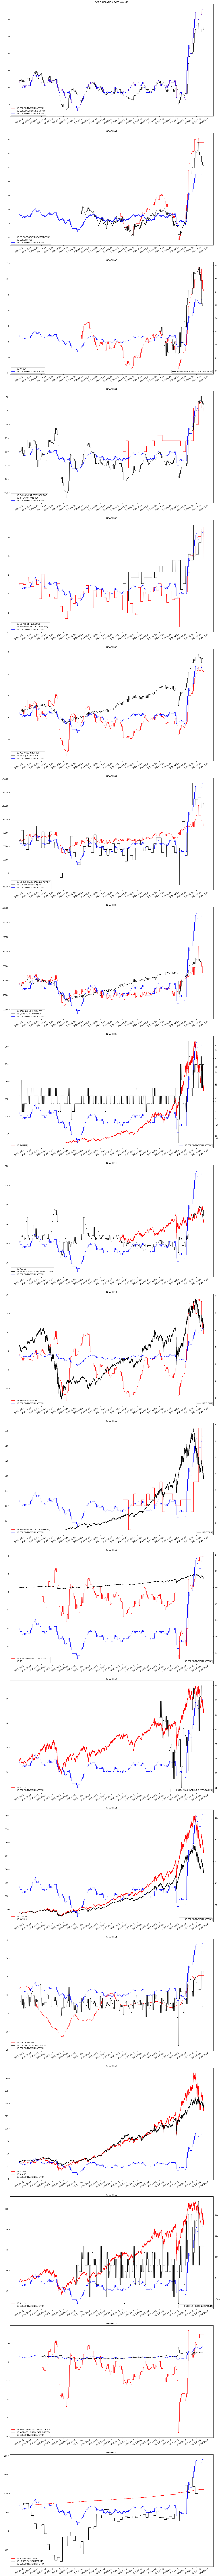

In [10]:
#Builds Leading Indicators DataFrame

import pandas as pd
import math
import numpy as np
import os
import csv
import yfinance as yf
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
import tkinter as tk
import re
from datetime import datetime
from datetime import timedelta
from datetime import date
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def round_up(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.ceil(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
        
    return merged_df

def on_selection(value):
    global choice
    choice = value  # store the user's choice
    root.destroy()  # close window

def on_selection_delay(value):
    global choice_delay
    choice_delay = value  # store the user's choice
    root.destroy()  # close window
    
def authenticate(username,password):
    
    auth_url = 'https://app.visiblealpha.com/auth/'
    headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}
    payload = {'username':username, 'password':password}
    
    response = requests.post(auth_url, json = payload, headers = headers)
    
    try:
        jwt = response.json()['jwt']
        # update and return headers
        headers['Authorization'] = 'Bearer '+jwt
        return headers
    
    except:
        print('Review response')
        return response  
    
dbase = "visiblealpha_laptop"
    
headers = authenticate('leonardob.moraes@outlook.com','akf7a7j5@@')

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="akf7a7j5",
    host="localhost",
    port=5432,
    database=dbase))

float_to_str = lambda x: str(x)
macro_beta = lambda x: MacroSTD_df[x][-1] / MacroSTD_df[choice][-1] 
macro_corr = lambda x: best_corr_df.loc[x, 'Correlations']
macro_last = lambda x: country_macro_df[x][-1]
macro_delta = lambda x: (country_macro_df[x][-1] - country_macro_df[x][delay - 1])

dbase = "visiblealpha_laptop"

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

corr_threshold = 0.3

query_vayf = 'SELECT * FROM va_yf'    
vayf_df = pd.read_sql_query(query_vayf, engine)
vayf_df = Set_DF(vayf_df)
vayf_df = DD_Index(vayf_df)

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

color_codes = {'0': 'r', '1': 'k', '2': 'b', '3': 'g', '4': 'y', '5': 'c', '6': 'm', '7': '0.25', '8': '0.5', '9': '0.75'}
extra_list = ['USDEUR', 'USDAUD', 'USGG2YR', 'USGG10YR', 'Crude Oil USD/Bbl', 'CRB Index Index Points', 'T10YIE', 'T5YIFR']
regions_list = ['KR', 'JP', 'CA', 'IT', 'EA', 'IN', 'BR', 'ES', 'DE', 'AU', 'CL', 'ZA', 'GR', 'FR', 'CH', 'NL', 'SE', 'SG', 'VN', 'TH', 'TW', 'MY', 'ID', 'GB', 'US', 'HK', 'MX', 'PH', 'CN']
indices = {'KR': 'US', 'JP': 'US', 'CA': 'US', 'IT': 'EA', 'EA': 'EA', 'IN': 'US', 'BR': 'BR', 'ES': 'EA', 'DE': 'EA', 'AU': 'US', 'CL': 'US', 'ZA': 'US', 'GR': 'EA', 'FR': 'EA', 'CH': 'CN', 'NL': 'EA', 'SE': 'EA', 'SG': 'US', 'VN': 'CN', 'TH': 'CN', 'TW': 'US', 'MY': 'US', 'ID': 'US', 'GB': 'EA', 'US': 'US', 'HK': 'CH', 'MX': 'US', 'PH': 'US', 'CN': 'CN'}
region = input("Input region: ").upper()

key_index = 'Index ' + indices[region]
index_list = vayf_df[vayf_df['Class'] == key_index].index.values.tolist()

if (region in regions_list):
    country_macro_df_name = region.lower() + '_macro'
    country_reports_df_name = region.lower() + '_reports'

if (country_macro_df_name in new_tables_list):
    query_macro = "SELECT * FROM " + country_macro_df_name
    country_macro_df = pd.read_sql_query(query_macro, engine)
    country_macro_df = Set_DF(country_macro_df)
    country_macro_df = DD_Index(country_macro_df)
    original_macro_df = country_macro_df
    
mult = 1
lead = input("Leading? (Y/N): ").upper()
if (lead == 'N'):
    mult = -1
reports = False

try:
    reports_csv = pd.read_csv(r'C:/Users/Utilizador/OneDrive/Documentos/Malta/Systematic/' + region.upper() + '_Reports.csv')
    country_reports_df = pd.DataFrame(reports_csv)
    country_reports_df = Set_DF(country_reports_df)
    country_reports_df = DD_Index(country_reports_df)
    country_reports_df.index = original_macro_df.columns
    country_reports_df.to_csv(r'C:/Users/Utilizador/OneDrive/Documentos/Malta/Systematic/' + region.upper() + '_Reports.csv')
    reports = True
except:
    pass

filter_r = 'N'
if (reports):
    filter_r = input("Filter Reports? (Y/N): ").upper()
    if (filter_r == 'Y'):
        if (mult == 1):
            str_filter = 'Lagging'
        else:
            str_filter = 'Leading'
        country_macro_df = country_macro_df[country_reports_df[country_reports_df['Nature'] == str_filter].index]

country_macro_df = country_macro_df.join(Prices_df[index_list][::-1])
country_macro_df = country_macro_df.join(Prices_df[extra_list][::-1])
country_macro_df.fillna(method = 'ffill', inplace = True)

original_macro_df = original_macro_df.join(Prices_df[index_list][::-1])
original_macro_df = original_macro_df.join(Prices_df[extra_list][::-1])
original_macro_df.fillna(method = 'ffill', inplace = True)

choice_list = original_macro_df.columns.values.tolist()
root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *choice_list, command = on_selection)
tk.Label(root, text = "Choose an Indicator").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()

if (filter_r == 'Y') & (choice not in country_macro_df.columns):
    country_macro_df = country_macro_df.join(original_macro_df[choice])

choice_d = choice + ' d'
corr_sum = 0
best_delay_fit = 0
select_reports = []
    
norm = False
norm_s = input("Normalize? (Y/N): ").upper()
if (norm_s == 'Y'):
    norm = True
    
corr_threshold = float(input("Correlation floor (0-1): "))


window_y = 2
n = (window_y * 4)

resampled_df = pd.DataFrame(country_macro_df, index = pd.Index(pd.date_range(country_macro_df.index[0], country_macro_df.index[-1], freq = 'B'), name = 'Date'), columns = country_macro_df.columns)
resampled_df = resampled_df.resample('Q').last()

MacroSTD_df = (abs(resampled_df.rolling(n).std()) / (window_y ** (1 / 2))).rolling(5).median()


delay_list = [100, 80, 60, 40, 20]
summary_list = ['WEIGHTED FORECAST', 'FORECAST MEAN', 'FORECAST MEDIAN', 'FORECAST TRIMMED']
delay_list = list(np.array(delay_list) * mult)
nr_reports_df = pd.DataFrame(np.nan, index = pd.Index(delay_list, name = 'Delays'), columns = ['# Reports'])
Summary_df = pd.DataFrame(np.nan, index = pd.Index(summary_list, name = 'Metrics'), columns = delay_list)

for delay in delay_list:
    delayed_series = pd.DataFrame(country_macro_df[choice].shift(delay).values.tolist(), index = country_macro_df.index, columns = [choice_d])
    new_country_macro_df = country_macro_df.join(delayed_series)
    nr_reports_curr = len(abs(new_country_macro_df.corr()[choice_d][abs(new_country_macro_df.corr()[choice_d]) > corr_threshold]).sort_values(ascending = False).index)
    nr_reports_df.loc[delay, '# Reports'] = nr_reports_curr
    
    previous_print = country_macro_df[choice][- delay]
    if (previous_print == country_macro_df[choice][-1]):
        previous_print = country_macro_df[choice][- delay - 20]

    last_delta = country_macro_df[choice][-1] - previous_print
    
    corr_df = pd.DataFrame(new_country_macro_df.corr()[choice_d].sort_values(ascending = False)[1:].values, index = new_country_macro_df.corr()[choice_d].sort_values(ascending = False)[1:].index, columns = [str(delay)])
    corr_df['Corr MOD'] = abs(corr_df[str(delay)])
    corr_df = corr_df[corr_df['Corr MOD'] > corr_threshold]
    corr_df.drop(['Corr MOD'], axis = 1, inplace = True)
    
    corr_df[choice_d] = corr_df.index
    if (lead != 'N'):
        corr_df['Forecasts'] = corr_df[choice_d].map(macro_beta) * corr_df[str(delay)] * last_delta + corr_df[choice_d].map(macro_last)
    else:
        corr_df['Forecasts ' + choice] = (corr_df[str(delay)] / corr_df[choice_d].map(macro_beta)) * corr_df[choice_d].map(macro_delta) + country_macro_df[choice][delay - 1]
    corr_df.drop([choice_d], axis = 1, inplace = True)
    corr_df.index.name = choice_d
    print(corr_df[:min(50, len(corr_df.index))])
    print('')
    
    if (lead == 'N'):
        map_quantile = lambda x: QuantileMap_df.loc[x, 'Quantile']
        QuantileMap_df = pd.DataFrame(pd.qcut(pd.unique(corr_df['Forecasts ' + choice]), q = 5, labels = False) , index = pd.Index(pd.unique(corr_df['Forecasts ' + choice]), name = 'Values'), columns = ['Quantile'])
        
        corr_df['Quantile'] = corr_df['Forecasts ' + choice].map(map_quantile)
        corr_df['Weighted Forecast'] = abs(corr_df[str(delay)]) * corr_df['Forecasts ' + choice]
        max_quant = corr_df['Quantile'].max()
        min_quant = corr_df['Quantile'].min()
        weighted_forecast = corr_df['Weighted Forecast'].sum() / abs(corr_df[str(delay)]).sum()
        forecast_mean = corr_df['Forecasts ' + choice].mean()
        forecast_median = corr_df['Forecasts ' + choice].median()
        forecast_trimmed = corr_df['Forecasts ' + choice][corr_df['Quantile'] != max_quant][corr_df['Quantile'] != min_quant].mean()
        Summary_df.loc['WEIGHTED FORECAST', delay] = round(weighted_forecast, 2)
        Summary_df.loc['FORECAST MEAN', delay] = round(forecast_mean, 2)
        Summary_df.loc['FORECAST MEDIAN', delay] = round(forecast_median, 2)
        Summary_df.loc['FORECAST TRIMMED', delay] = round(forecast_trimmed, 2)

    if (new_country_macro_df.corr()[choice_d].sort_values(ascending = False)[1:11].sum() > corr_sum):
        best_delay_fit = delay
        best_delayed_series = delayed_series
        
        select_reports = list(abs(new_country_macro_df.corr()[choice_d]).sort_values(ascending = False)[1:nr_reports_curr].index)
        all_reports = list(new_country_macro_df.corr()[choice_d].sort_values(ascending = False).index)
        best_corr_df = pd.DataFrame(new_country_macro_df.corr()[choice_d].sort_values(ascending = False).values, index = pd.Index(all_reports, name = 'Report'), columns = ['Correlations'])
        corr_sum = new_country_macro_df.corr()[choice_d].sort_values(ascending = False)[1:11].sum()
    
print('Best Delay: ' + str(best_delay_fit))
print('')
print('LAST: ' + str(round(country_macro_df[choice][-1], 2)))
print('')
print('')
print('')
print('')
print('FORECAST SUMMARY ' + choice + ':')
print(Summary_df)
print('')
print('')
print('')
print('')

choice_delay_list = delay_list
root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *choice_delay_list, command = on_selection_delay)
tk.Label(root, text = "Choose a Lag").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()

best_delay_fit = choice_delay
nr_reports = nr_reports_df.loc[best_delay_fit, '# Reports']
n_cpg = min(2, max(2, round_up(nr_reports / 10, 0)))
nr_graphs = round_up(nr_reports / n_cpg, 0)
#select_reports.append(choice_d)

fig1 = plt.figure(figsize = (20, 13 * nr_graphs))
plt.subplots_adjust(wspace = 0.1, hspace = 0.15)
ax1 = fig1.add_subplot(nr_graphs, 1, 1)
if (nr_graphs > 1):
    ax2 = fig1.add_subplot(nr_graphs, 1, 2)
if (nr_graphs > 2):
    ax3 = fig1.add_subplot(nr_graphs, 1, 3)
if (nr_graphs > 3):
    ax4 = fig1.add_subplot(nr_graphs, 1, 4)
if (nr_graphs > 4):
    ax5 = fig1.add_subplot(nr_graphs, 1, 5)
if (nr_graphs > 5):
    ax6 = fig1.add_subplot(nr_graphs, 1, 6)
if (nr_graphs > 6):
    ax7 = fig1.add_subplot(nr_graphs, 1, 7)
if (nr_graphs > 7):
    ax8 = fig1.add_subplot(nr_graphs, 1, 8)
if (nr_graphs > 8):
    ax9 = fig1.add_subplot(nr_graphs, 1, 9)
if (nr_graphs > 9):
    ax10 = fig1.add_subplot(nr_graphs, 1, 10)
if (nr_graphs > 10):
    ax11 = fig1.add_subplot(nr_graphs, 1, 11)
if (nr_graphs > 11):
    ax12 = fig1.add_subplot(nr_graphs, 1, 12)
if (nr_graphs > 12):
    ax13 = fig1.add_subplot(nr_graphs, 1, 13)
if (nr_graphs > 13):
    ax14 = fig1.add_subplot(nr_graphs, 1, 14)
if (nr_graphs > 14):
    ax15 = fig1.add_subplot(nr_graphs, 1, 15)
if (nr_graphs > 15):
    ax16 = fig1.add_subplot(nr_graphs, 1, 16)
if (nr_graphs > 16):
    ax17 = fig1.add_subplot(nr_graphs, 1, 17)
if (nr_graphs > 17):
    ax18 = fig1.add_subplot(nr_graphs, 1, 18)
if (nr_graphs > 18):
    ax19 = fig1.add_subplot(nr_graphs, 1, 19)
if (nr_graphs > 19):
    ax20 = fig1.add_subplot(nr_graphs, 1, 20)

trunc = False
max_ratio = 2.5

k = 0
len_f = 0
second_axis = False
old_max = 0

delay_pick = min(best_delay_fit, 0)
delay_others = min(-best_delay_fit, 0)

select_df = country_macro_df - country_macro_df.describe().loc['mean']
select_df = country_macro_df / country_macro_df.describe().loc['std']


standard_s = input("Standard scaling? (Y/N): ").upper()
if (standard_s == 'Y'):
    summary_macro_df = select_df
else:
    summary_macro_df = country_macro_df
     

t = 0
init_bound = (n_cpg * t)
final_bound = min((n_cpg * (t + 1)), len(select_reports))
select_reports_sl1 = select_reports[init_bound: final_bound]
select_reports_sl1.append(choice)

legend_df = pd.DataFrame(select_reports_sl1, columns = ['Data Series'])

delay = best_delay_fit
if (lead != 'N'):
    legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
else:
    legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit - 1]
    LegendAll_df = legend_df

    
    
legend_df['Graph 01'] = legend_df.index
legend_df.index = legend_df['Graph 01'].map(float_to_str).replace(color_codes)
legend_df.drop(['Graph 01'], axis = 1, inplace = True)
print(legend_df)
print('')  

for current_report in select_reports_sl1:
    
    cc = color_codes[str(k)]
    
    if (current_report == choice):
        lag = best_delay_fit
        current_series = summary_macro_df[current_report].shift(delay_pick)
    else:
        lag = 0
        current_series = summary_macro_df[current_report].shift(delay_others)
    
    inv = ''
    if (best_corr_df.loc[current_report, 'Correlations'] < 0):
        current_series = current_series * (-1)
        inv = ' INV'

    if (k == 0):
        first_max = float(current_series.max())
        len_first = len(current_series.index)
        index_first = current_series.index
    else:
        if (len(current_series.index) > len_first) & (trunc):
            current_series = current_series.loc[index_first]
        
    if (norm) & (old_max != 0):
        new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        if (new_max != 0):
            current_series = current_series * abs(old_max / new_max)
                
    len1 = len(current_series.index)
    len_f = max(len_f, len1)
        
    axis2 = 'N'
    if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
        if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
            axis2 = 'Y'

    if (axis2 == 'Y'):
        second_axis = True
        axr = ax1.twinx() 
        axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
    else:
        ax1.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

    ax1.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

    ax1.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

    if (k == 0):
        ax1.set_title(choice + ' ' + str(best_delay_fit))
        old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
    k = k + 1

if (second_axis):
    axr.legend(loc = 'lower right')
ax1.legend(loc = 'lower left')  

k = 0
len_f = 0
second_axis = False
old_max = 0

t = 1
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl2 = select_reports[init_bound: final_bound]
    select_reports_sl2.append(choice)
        
    legend_df = pd.DataFrame(select_reports_sl2, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 02'] = legend_df.index
    legend_df.index = legend_df['Graph 02'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 02'], axis = 1, inplace = True)
    print(legend_df)
    print('')

    for current_report in select_reports_sl2:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax2.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax2.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax2.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax2.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax2.set_title('GRAPH 02')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax2.legend(loc = 'lower left')

k = 0
len_f = 0
second_axis = False
old_max = 0

t = 2
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl3 = select_reports[init_bound: final_bound]
    select_reports_sl3.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl3, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)

    legend_df['Graph 03'] = legend_df.index
    legend_df.index = legend_df['Graph 03'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 03'], axis = 1, inplace = True)
    print(legend_df)
    print('')  

    for current_report in select_reports_sl3:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
        
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax3.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax3.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax3.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax3.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax3.set_title('GRAPH 03')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax3.legend(loc = 'lower left')  
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 3
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl4 = select_reports[init_bound: final_bound]
    select_reports_sl4.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl4, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 04'] = legend_df.index
    legend_df.index = legend_df['Graph 04'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 04'], axis = 1, inplace = True)
    print(legend_df)
    print('')

    for current_report in select_reports_sl4:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
        
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax4.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax4.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax4.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax4.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax4.set_title('GRAPH 04')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax4.legend(loc = 'lower left') 
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 4
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl5 = select_reports[init_bound: final_bound]
    select_reports_sl5.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl5, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 05'] = legend_df.index
    legend_df.index = legend_df['Graph 05'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 05'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl5:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax5.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax5.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax5.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax5.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax5.set_title('GRAPH 05')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax5.legend(loc = 'lower left')   

k = 0
len_f = 0
second_axis = False
old_max = 0

t = 5
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl6 = select_reports[init_bound: final_bound]
    select_reports_sl6.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl6, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 06'] = legend_df.index
    legend_df.index = legend_df['Graph 06'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 06'], axis = 1, inplace = True)
    print(legend_df)
    print('')

    for current_report in select_reports_sl6:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax6.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax6.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax6.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax6.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax6.set_title('GRAPH 06')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax6.legend(loc = 'lower left')    

k = 0
len_f = 0
second_axis = False
old_max = 0

t = 6
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl7 = select_reports[init_bound: final_bound]
    select_reports_sl7.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl7, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 07'] = legend_df.index
    legend_df.index = legend_df['Graph 07'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 07'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl7:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax7.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax7.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax7.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax7.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax7.set_title('GRAPH 07')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax7.legend(loc = 'lower left')      

k = 0
len_f = 0
second_axis = False
old_max = 0

t = 7
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl8 = select_reports[init_bound: final_bound]
    select_reports_sl8.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl8, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 08'] = legend_df.index
    legend_df.index = legend_df['Graph 08'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 08'], axis = 1, inplace = True)
    print(legend_df)
    print('')

    for current_report in select_reports_sl8:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax8.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax8.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax8.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax8.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax8.set_title('GRAPH 08')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax8.legend(loc = 'lower left')   

k = 0
len_f = 0
second_axis = False
old_max = 0

t = 8
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl9 = select_reports[init_bound: final_bound]
    select_reports_sl9.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl9, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 09'] = legend_df.index
    legend_df.index = legend_df['Graph 09'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 09'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl9:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax9.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax9.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax9.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax9.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax9.set_title('GRAPH 09')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax9.legend(loc = 'lower left') 

k = 0
len_f = 0
second_axis = False
old_max = 0

t = 9
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl10 = select_reports[init_bound: final_bound]
    select_reports_sl10.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl10, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 10'] = legend_df.index
    legend_df.index = legend_df['Graph 10'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 10'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl10:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax10.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax10.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax10.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax10.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax10.set_title('GRAPH 10')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax10.legend(loc = 'lower left')
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 10
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl11 = select_reports[init_bound: final_bound]
    select_reports_sl11.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl11, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 11'] = legend_df.index
    legend_df.index = legend_df['Graph 11'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 11'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl11:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax11.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax11.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax11.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax11.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax11.set_title('GRAPH 11')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax11.legend(loc = 'lower left')
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 11
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl12 = select_reports[init_bound: final_bound]
    select_reports_sl12.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl12, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 12'] = legend_df.index
    legend_df.index = legend_df['Graph 12'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 12'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl12:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax12.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax12.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax12.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax12.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax12.set_title('GRAPH 12')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax12.legend(loc = 'lower left')
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 12
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl13 = select_reports[init_bound: final_bound]
    select_reports_sl13.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl13, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 13'] = legend_df.index
    legend_df.index = legend_df['Graph 13'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 13'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl13:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax13.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax13.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax13.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax13.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax13.set_title('GRAPH 13')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax13.legend(loc = 'lower left')
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 13
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl14 = select_reports[init_bound: final_bound]
    select_reports_sl14.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl14, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 14'] = legend_df.index
    legend_df.index = legend_df['Graph 14'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 14'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl14:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax14.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax14.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax14.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax14.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax14.set_title('GRAPH 14')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax14.legend(loc = 'lower left')
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 14
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl15 = select_reports[init_bound: final_bound]
    select_reports_sl15.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl15, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 15'] = legend_df.index
    legend_df.index = legend_df['Graph 15'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 15'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl15:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax15.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax15.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax15.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax15.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax15.set_title('GRAPH 15')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax15.legend(loc = 'lower left')
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 15
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl16 = select_reports[init_bound: final_bound]
    select_reports_sl16.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl16, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 16'] = legend_df.index
    legend_df.index = legend_df['Graph 16'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 16'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl16:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax16.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax16.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax16.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax16.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax16.set_title('GRAPH 16')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax16.legend(loc = 'lower left')
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 16
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl17 = select_reports[init_bound: final_bound]
    select_reports_sl17.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl17, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 17'] = legend_df.index
    legend_df.index = legend_df['Graph 17'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 17'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl17:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax17.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax17.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax17.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax17.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax17.set_title('GRAPH 17')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax17.legend(loc = 'lower left')
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 17
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl18 = select_reports[init_bound: final_bound]
    select_reports_sl18.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl18, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 18'] = legend_df.index
    legend_df.index = legend_df['Graph 18'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 18'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl18:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax18.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax18.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax18.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax18.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax18.set_title('GRAPH 18')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax18.legend(loc = 'lower left')
    
k = 0
len_f = 0
second_axis = False
old_max = 0

t = 18
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl19 = select_reports[init_bound: final_bound]
    select_reports_sl19.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl19, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 19'] = legend_df.index
    legend_df.index = legend_df['Graph 19'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 19'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl19:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
            
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax19.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax19.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax19.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax19.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax19.set_title('GRAPH 19')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax19.legend(loc = 'lower left')

k = 0
len_f = 0
second_axis = False
old_max = 0

t = 19
if (len(select_reports) > (t * n_cpg)):
    init_bound = (n_cpg * t)
    final_bound = min((n_cpg * (t + 1)), len(select_reports))
    select_reports_sl20 = select_reports[init_bound: final_bound]
    select_reports_sl20.append(choice)
    
    legend_df = pd.DataFrame(select_reports_sl20, columns = ['Data Series'])
    if (lead != 'N'):
        legend_df['Forecasts'] = legend_df['Data Series'].map(macro_beta) * legend_df['Data Series'].map(macro_corr) * last_delta + legend_df['Data Series'].map(macro_last)
    else:
        legend_df['Forecasts ' + choice] = (legend_df['Data Series'].map(macro_corr) / legend_df['Data Series'].map(macro_beta)) * legend_df['Data Series'].map(macro_delta) + country_macro_df[choice][best_delay_fit]
        LegendAll_df = pd.concat([LegendAll_df, legend_df], axis = 0)
        
    legend_df['Graph 20'] = legend_df.index
    legend_df.index = legend_df['Graph 20'].map(float_to_str).replace(color_codes)
    legend_df.drop(['Graph 20'], axis = 1, inplace = True)
    print(legend_df)
    print('') 

    for current_report in select_reports_sl20:

        cc = color_codes[str(k)]

        if (current_report == choice):
            lag = best_delay_fit
            current_series = summary_macro_df[current_report].shift(delay_pick)
        else:
            lag = 0
            current_series = summary_macro_df[current_report].shift(delay_others)
        
        inv = ''
        if (best_corr_df.loc[current_report, 'Correlations'] < 0):
            current_series = current_series * (-1)
            inv = ' INV'

        if (k == 0):
            first_max = float(current_series.max())
            len_first = len(current_series.index)
            index_first = current_series.index
        else:
            if (len(current_series.index) > len_first) & (trunc):
                current_series = current_series.loc[index_first]

        if (norm) & (old_max != 0):
            new_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
            if (new_max != 0):
                current_series = current_series * abs(old_max / new_max)

        len1 = len(current_series.index)
        len_f = max(len_f, len1)

        axis2 = 'N'
        if (float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()) != float(first_max)):
            if (k > 0) & ((max(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max) / min(float(current_series[current_series.replace({np.nan: 'z'}) != 'z'].max()), first_max)) > max_ratio):
                axis2 = 'Y'

        if (axis2 == 'Y'):
            second_axis = True
            axr = ax20.twinx() 
            axr.plot(current_series, color = cc, label = region + ' ' + current_report + inv)
        else:
            ax20.plot(current_series, color = cc, label = region + ' ' + current_report + inv)

        ax20.set_xticks(current_series.index[::int(round(len_f / 25, 0))])

        ax20.set_xticklabels(current_series.index[::int(round(len_f / 25, 0))], rotation = 30)

        if (k == 0):
            ax20.set_title('GRAPH 20')
            old_max = float(current_series[current_series.replace({np.nan: 'z'}) != 'z'][0])
        k = k + 1

    if (second_axis):
        axr.legend(loc = 'lower right')
    ax20.legend(loc = 'lower left')

In [828]:
#AMENDS MACRO RELATIONS

country_macro_df.drop(index_list, axis = 1, inplace = True)
country_macro_df.drop(extra_list, axis = 1, inplace = True)
country_macro_df['GOODS TRADE BALANCE ADV'][country_macro_df['GOODS TRADE BALANCE ADV'] > -1000] = country_macro_df['GOODS TRADE BALANCE ADV'] * 1000
#country_macro_df.to_sql('ea_macro', engine, index = True, if_exists = 'replace')
#country_macro_df.to_csv(r'C:/Users/Utilizador/OneDrive/Documentos/Malta/Systematic/us_macro.csv')

In [71]:
#Random Forest to forecast macro indicators

import pandas as pd
import math
import numpy as np
import os
import csv
import yfinance as yf
import matplotlib.pyplot as plt
import psycopg2
import requests
import json
import tkinter as tk
import re
from datetime import datetime
from datetime import timedelta
from datetime import date
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def Average(lst):
    return sum(lst) / len(lst)

def Set_DF(dframe):
    
    dframe.index = dframe[dframe.columns.values.tolist()[0]]
    dframe.index.name = dframe.columns.values.tolist()[0]
    New_df = dframe.drop(dframe.columns.values.tolist()[0], axis=1)
    
    return New_df

def DD_Index(dframe):
    
    dframe['dummy'] = dframe.index
    dframe.drop_duplicates(['dummy'], inplace=True)
    dframe.drop('dummy', axis=1, inplace=True)
    New_df = dframe
    
    return New_df

def round_down(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.floor(n * multiplier) / multiplier)

def round_up(n, decimals = 0): 
    multiplier = 10 ** decimals 
    return int(math.ceil(n * multiplier) / multiplier)

def Filter_df(tbf_df, merging_dates_list):
    
    filter_df = pd.DataFrame(merging_dates_list, columns=['Date'])
    merged_df = pd.merge(tbf_df, filter_df, on='Date')
    merged_df.index = filter_df['Date'] 
    merged_df.index.name = 'Date'
    merged_df.drop(['Date'], axis=1, inplace=True)
        
    return merged_df

def on_selection(value):
    global choice
    choice = value  # store the user's choice
    root.destroy()  # close window

def on_selection_delay(value):
    global choice_delay_
    choice_delay = value  # store the user's choice
    root.destroy()  # close window
    
warnings.filterwarnings('ignore')

float_to_str = lambda x: str(x)
macro_beta = lambda x: MacroSTD_df[x][-1] / MacroSTD_df[choice][-1] 
macro_corr = lambda x: best_corr_df.loc[x, 'Correlations']
macro_last = lambda x: country_macro_df[x][-1]
macro_delta1 = lambda x: (country_macro_df[x][-1] - country_macro_df[x][delay - 1])
macro_delta2 = lambda x: (country_macro_df[x][-1] - country_macro_df[x][choice_delay - 1])
map_date = lambda x: datetime.strptime(x.strftime("%Y-%m-%d"), "%Y-%m-%d")

dbase = "visiblealpha_laptop"

conn = psycopg2.connect(host="localhost", user="postgres", password="akf7a7j5", dbname=dbase, port=5432)
cursor = conn.cursor()
cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
tables_list = cursor.fetchall()
new_tables_list = list(pd.DataFrame(tables_list, columns=['Old'])['Old'])

query_vayf = 'SELECT * FROM va_yf'    
vayf_df = pd.read_sql_query(query_vayf, engine)
vayf_df = Set_DF(vayf_df)
vayf_df = DD_Index(vayf_df)

query_prices = 'SELECT * FROM prices_relation'    
Prices_df = pd.read_sql_query(query_prices, engine)
Prices_df = Set_DF(Prices_df)
Prices_df = DD_Index(Prices_df)

color_codes = {'0': 'r', '1': 'k', '2': 'b', '3': 'g', '4': 'y', '5': 'c', '6': 'm', '7': '0.25', '8': '0.5', '9': '0.75'}
extra_list = ['USGG2YR', 'USGG10YR', 'Crude Oil USD/Bbl', 'CRB Index Index Points', 'T10YIE', 'T5YIFR']
regions_list = ['KR', 'JP', 'CA', 'IT', 'EA', 'IN', 'BR', 'ES', 'DE', 'AU', 'CL', 'ZA', 'GR', 'FR', 'CH', 'NL', 'SE', 'SG', 'VN', 'TH', 'TW', 'MY', 'ID', 'GB', 'US', 'HK', 'MX', 'PH', 'CN']
indices = {'KR': 'US', 'JP': 'US', 'CA': 'US', 'IT': 'EA', 'EA': 'EA', 'IN': 'US', 'BR': 'BR', 'ES': 'EA', 'DE': 'EA', 'AU': 'US', 'CL': 'US', 'ZA': 'US', 'GR': 'EA', 'FR': 'EA', 'CH': 'CN', 'NL': 'EA', 'SE': 'EA', 'SG': 'US', 'VN': 'CN', 'TH': 'CN', 'TW': 'US', 'MY': 'US', 'ID': 'US', 'GB': 'EA', 'US': 'US', 'HK': 'CH', 'MX': 'US', 'PH': 'US', 'CN': 'CN'}
region = input("Input region: ").upper()

key_index = 'Index ' + indices[region]
index_list = vayf_df[vayf_df['Class'] == key_index].index.values.tolist()

if (region in regions_list):
    country_macro_df_name = region.lower() + '_macro'
    country_reports_df_name = region.lower() + '_reports'

if (country_macro_df_name in new_tables_list):
    query_macro = "SELECT * FROM " + country_macro_df_name
    country_macro_df = pd.read_sql_query(query_macro, engine)
    country_macro_df = Set_DF(country_macro_df)
    country_macro_df = DD_Index(country_macro_df)
    original_macro_df = country_macro_df
    
mult = -1
reports = False

try:
    reports_csv = pd.read_csv(r'C:/Users/Utilizador/OneDrive/Documentos/Malta/Systematic/' + region.upper() + '_Reports.csv')
    country_reports_df = pd.DataFrame(reports_csv)
    country_reports_df = Set_DF(country_reports_df)
    country_reports_df = DD_Index(country_reports_df)
    country_reports_df.index = original_macro_df.columns
    country_reports_df.to_csv(r'C:/Users/Utilizador/OneDrive/Documentos/Malta/Systematic/' + region.upper() + '_Reports.csv')
    reports = True
except:
    pass

filter_r = 'N'
if (reports):
    filter_r = input("Filter Reports? (Y/N): ").upper()
    if (filter_r == 'Y'):
        country_macro_df = country_macro_df[country_reports_df[country_reports_df['Nature'] == 'Leading'].index]

country_macro_df = country_macro_df.join(Prices_df[index_list][::-1])
country_macro_df = country_macro_df.join(Prices_df[extra_list][::-1])
country_macro_df.fillna(method = 'ffill', inplace = True)

original_macro_df = original_macro_df.join(Prices_df[index_list][::-1])
original_macro_df = original_macro_df.join(Prices_df[extra_list][::-1])
original_macro_df.fillna(method = 'ffill', inplace = True)

choice_list = sorted(original_macro_df.columns.values.tolist())
root = tk.Tk()
tkvar = tk.StringVar(root)
popupMenu = tk.OptionMenu(root, tkvar, *choice_list, command = on_selection)
tk.Label(root, text = "Choose an Indicator").grid(row = 0, column = 0)
popupMenu.grid(row = 1, column = 0)
root.mainloop()

if (filter_r == 'Y') & (choice not in country_macro_df.columns):
    country_macro_df = country_macro_df.join(original_macro_df[choice])

choice_d = choice + ' d'
corr_sum = 0
best_delay_fit = 0
select_reports = []
    
corr_threshold = float(input("Correlation floor (0-1): "))

window_y = 2
n = (window_y * 4)

resampled_df = pd.DataFrame(country_macro_df, index = pd.Index(pd.date_range(country_macro_df.index[0], country_macro_df.index[-1], freq = 'B'), name = 'Date'), columns = country_macro_df.columns)
resampled_df = resampled_df.resample('Q').last()

MacroSTD_df = (abs(resampled_df.rolling(n).std()) / (window_y ** (1 / 2))).rolling(5).median()

delay_list = [1, 2, 3, 4, 5]
summary_list = ['WEIGHTED FORECAST', 'FORECAST MEAN', 'FORECAST MEDIAN', 'FORECAST TRIMMED']
delay_list = list(np.array(delay_list) * mult)
Summary_df = pd.DataFrame(np.nan, index = pd.Index(summary_list, name = 'Metrics'), columns = delay_list)

country_macro_df['Dummy'] = country_macro_df.index
country_macro_df.index = country_macro_df['Dummy'].map(map_date)
country_macro_df.drop(['Dummy'], axis = 1, inplace = True)
country_macro_df = country_macro_df.resample('Q').last()

for delay in delay_list:
    delayed_series = pd.DataFrame(country_macro_df[choice].shift(delay).values.tolist(), index = country_macro_df.index, columns = [choice_d])
    new_country_macro_df = country_macro_df.join(delayed_series)
    nr_reports_curr = len(abs(new_country_macro_df.corr()[choice_d][abs(new_country_macro_df.corr()[choice_d]) > corr_threshold]).sort_values(ascending = False).index)
    
    corr_df = pd.DataFrame(new_country_macro_df.corr()[choice_d].sort_values(ascending = False)[1:].values, index = new_country_macro_df.corr()[choice_d].sort_values(ascending = False)[1:].index, columns = [str(delay)])
    corr_df['Corr MOD'] = abs(corr_df[str(delay)])
    corr_df = corr_df[corr_df['Corr MOD'] > corr_threshold]
    
    corr_df[choice_d] = corr_df.index
    
    corr_df['Forecasts ' + choice] = (corr_df[str(delay)] / corr_df[choice_d].map(macro_beta)) * corr_df[choice_d].map(macro_delta1) + country_macro_df[choice][delay - 1]
    corr_df.index.name = choice_d
    
    map_quantile = lambda x: QuantileMap_df.loc[x, 'Quantile']
    QuantileMap_df = pd.DataFrame(pd.qcut(pd.unique(corr_df['Forecasts ' + choice]), q = 5, labels = False) , index = pd.Index(pd.unique(corr_df['Forecasts ' + choice]), name = 'Values'), columns = ['Quantile'])

    corr_df['Quantile'] = corr_df['Forecasts ' + choice].map(map_quantile)
    corr_df['Weighted Forecast'] = abs(corr_df[str(delay)]) * corr_df['Forecasts ' + choice]
    max_quant = corr_df['Quantile'].max()
    min_quant = corr_df['Quantile'].min()
    weighted_forecast = corr_df['Weighted Forecast'].sum() / abs(corr_df[str(delay)]).sum()
    forecast_mean = corr_df['Forecasts ' + choice].mean()
    forecast_median = corr_df['Forecasts ' + choice].median()
    forecast_trimmed = corr_df['Forecasts ' + choice][corr_df['Quantile'] != max_quant][corr_df['Quantile'] != min_quant].mean()
    Summary_df.loc['WEIGHTED FORECAST', delay] = round(weighted_forecast, 2)
    Summary_df.loc['FORECAST MEAN', delay] = round(forecast_mean, 2)
    Summary_df.loc['FORECAST MEDIAN', delay] = round(forecast_median, 2)
    Summary_df.loc['FORECAST TRIMMED', delay] = round(forecast_trimmed, 2)

    if (corr_df['Corr MOD'].sum() > corr_sum):
        best_delay_fit = delay
        corr_sum = corr_df['Corr MOD'].sum()

print('')
print('Best Delay: ' + str(best_delay_fit))
print('')
print('LAST: ' + str(round(country_macro_df[choice][-1], 2)))
print('')
print('FORECAST SUMMARY ' + choice + ':')
print(Summary_df)
print('')

#choice_delay_list = delay_list
#root = tk.Tk()
#tkvar = tk.StringVar(root)
#popupMenu = tk.OptionMenu(root, tkvar, *choice_delay_list, command = on_selection_delay)
#tk.Label(root, text = "Choose a Lag (quarters): ").grid(row = 0, column = 0)
#popupMenu.grid(row = 1, column = 0)
#root.mainloop()

count = 0
forecast_sum = 0
rmse_sum = 0
for choice_delay in delay_list:
    delayed_series = pd.DataFrame(country_macro_df[choice].shift(choice_delay).values.tolist(), index = country_macro_df.index, columns = [choice_d])
    new_country_macro_df = country_macro_df.join(delayed_series)
    nr_reports_curr = len(abs(new_country_macro_df.corr()[choice_d][abs(new_country_macro_df.corr()[choice_d]) > corr_threshold]).sort_values(ascending = False).index)
    corr_df = pd.DataFrame(new_country_macro_df.corr()[choice_d].sort_values(ascending = False)[1:].values, index = new_country_macro_df.corr()[choice_d].sort_values(ascending = False)[1:].index, columns = [str(choice_delay)])
    corr_df['Corr MOD'] = abs(corr_df[str(choice_delay)])
    corr_df = corr_df[corr_df['Corr MOD'] > corr_threshold]
    corr_df[choice_d] = corr_df.index
    corr_df['Forecasts ' + choice] = (corr_df[str(choice_delay)] / corr_df[choice_d].map(macro_beta)) * corr_df[choice_d].map(macro_delta2) + country_macro_df[choice][choice_delay - 1]
    corr_df.index.name = choice_d
    corr_df.drop([choice_d, 'Corr MOD'], axis = 1, inplace = True)
    print('')
    print(corr_df)
    print('')

    CURRENT_country_macro_df = country_macro_df[corr_df.index]
    CURRENT_country_macro_df = CURRENT_country_macro_df.join(delayed_series)

    labels_series = CURRENT_country_macro_df[choice_d][:choice_delay]
    CURRENT_country_macro_df.drop([choice_d], axis = 1, inplace = True)

    first_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'median')),
        ('std_scaler', StandardScaler())
    ])

    Y = first_pipeline.fit_transform(CURRENT_country_macro_df)
    country_macro_df_Processed = pd.DataFrame(Y, index = CURRENT_country_macro_df.index, columns = CURRENT_country_macro_df.columns)
    country_macro_df_Processed_ = country_macro_df_Processed[:choice_delay]
    
    country_macro_df_Processed_ = country_macro_df_Processed_.join(labels_series)
    country_macro_df_Processed_.dropna(axis = 0, inplace = True)
    labels_series = country_macro_df_Processed_[choice_d]
    country_macro_df_Processed_.drop([choice_d], axis = 1, inplace = True)

    macro_train_set, macro_test_set = train_test_split(country_macro_df_Processed_, test_size = 0.25, random_state = 42)

    macro_train_set.sort_index(axis = 0, ascending = True, inplace = True)
    labels_train_set = macro_train_set.join(labels_series)[choice_d]

    macro_test_set.sort_index(axis = 0, ascending = True, inplace = True)
    labels_test_set = macro_test_set.join(labels_series)[choice_d]

    forest_reg = RandomForestRegressor()
    forest_reg.fit(macro_train_set, labels_train_set)
    RF_macro_predictions = forest_reg.predict(macro_train_set)
    RF_macro_mse = mean_squared_error(labels_train_set, RF_macro_predictions)
    RF_macro_rmse = np.sqrt(RF_macro_mse)
    RF_macro_predictions_test = forest_reg.predict(macro_test_set)
    RF_macro_mse_test = mean_squared_error(labels_test_set, RF_macro_predictions_test)
    RF_macro_rmse_test = np.sqrt(RF_macro_mse_test)
    RF_forecast = forest_reg.predict(pd.DataFrame(country_macro_df_Processed.iloc[-1]).swapaxes('index', 'columns'))
    print(str(choice_delay) + ' SUMMARY:')
    print('RMSE RF Train Set: ' + str(round(RF_macro_rmse, 2)))
    print('RMSE RF Test Set: ' + str(round(RF_macro_rmse_test, 2)))
    print('FORECAST: ' + str(round(RF_forecast[0], 2)))
    print('')
    count = count + 1
    forecast_sum = forecast_sum + RF_forecast[0]
    rmse_sum = rmse_sum + RF_macro_rmse_test

print('AVG FORECAST: ' + str(round(forecast_sum / count, 2)))
print('AVG RMSE (TEST): ' + str(round(rmse_sum / count, 2)))
print('LAST ' + choice + ': ' + str(round(country_macro_df[choice][-1], 2)))

Input region: US
Correlation floor (0-1): 0.25

Best Delay: -1

LAST: 517.0

FORECAST SUMMARY NON FARM PAYROLLS:
                       -1      -2      -3      -4      -5
Metrics                                                  
WEIGHTED FORECAST  227.99  314.81  362.96  330.76  525.54
FORECAST MEAN      242.83  313.33  364.09  329.57  518.16
FORECAST MEDIAN    263.00  315.00  390.00  322.53  485.88
FORECAST TRIMMED   258.45  324.09  378.46  336.87  489.14


                                               -1  Forecasts NON FARM PAYROLLS
NON FARM PAYROLLS d                                                           
INITIAL JOBLESS CLAIMS                   0.819950                   250.494024
RETAIL SALES CG MOM                      0.342370                   263.000000
HOUSE PX PURCHASE IND                    0.330292                   263.000000
ACG WEEKLY HOURS                         0.319057                   263.000000
S&P/CASE-SHILLER HOME PRICE YOY          0.317587              

-3 SUMMARY:
RMSE RF Train Set: 123.64
RMSE RF Test Set: 993.01
FORECAST: 375.76


                                            -4  Forecasts NON FARM PAYROLLS
NON FARM PAYROLLS d                                                        
ACG WEEKLY HOURS                      0.327618                   419.330288
CPI CORE INDEX NSA                    0.306143                   430.232732
CPI                                   0.300395                   455.634467
XLP US                                0.298055                   326.986284
XLU US                                0.295222                   260.206479
XLY US                                0.290274                   271.735053
NAHB HOUSING MARKET INDEX             0.288080                   195.684396
XLV US                                0.283881                   318.488431
IGV US                                0.279384                   326.581151
HOUSE PX PURCHASE IND                 0.278612                   398.000000
PHILAD

Forecasts:

1Y: 3.75
6M: 2.5
3M: 2.34
2M: 2.49
1M: 1.2



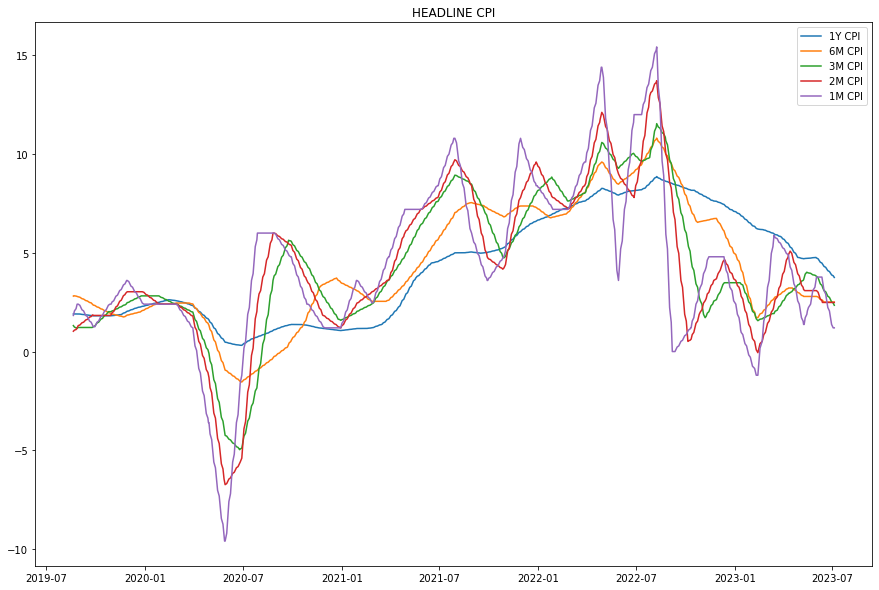

In [40]:
country_macro_df_name = 'us_macro'
query_macro = "SELECT * FROM " + country_macro_df_name
country_macro_df = pd.read_sql_query(query_macro, engine)
country_macro_df = Set_DF(country_macro_df)
country_macro_df = DD_Index(country_macro_df)

start = today + timedelta(1)
if (start.weekday() == 6):
    start = start + timedelta(1)
if (start.weekday() == 5):
    start = start + timedelta(2)

new_period = pd.date_range(start, start + timedelta(30), freq = 'B').date
new_series = pd.DataFrame(0.1, index = new_period, columns = ['INFLATION RATE MOM'])


current_series = pd.concat([new_series['INFLATION RATE MOM'], country_macro_df['INFLATION RATE MOM']]).sort_index()

(current_series.rolling(252).mean() * 12)[-1000:].plot(figsize = (15,10), label = '1Y CPI', title = 'HEADLINE CPI').legend()
(current_series.rolling(126).mean() * 12)[-1000:].plot(figsize = (15,10), label = '6M CPI').legend()
(current_series.rolling(63).mean() * 12)[-1000:].plot(figsize = (15,10), label = '3M CPI').legend()
(current_series.rolling(42).mean() * 12)[-1000:].plot(figsize = (15,10), label = '2M CPI').legend()
(current_series.rolling(21).mean() * 12)[-1000:].plot(figsize = (15,10), label = '1M CPI').legend()
print('Forecasts:')
print('')
print('1Y: ' + str(round((current_series.rolling(252).mean() * 12)[-1], 2)))
print('6M: ' + str(round((current_series.rolling(126).mean() * 12)[-1], 2)))
print('3M: ' + str(round((current_series.rolling(63).mean() * 12)[-1], 2)))
print('2M: ' + str(round((current_series.rolling(42).mean() * 12)[-1], 2)))
print('1M: ' + str(round((current_series.rolling(21).mean() * 12)[-1], 2)))
print('')
#print(country_macro_df['INFLATION RATE MOM'].rolling(252).mean() * 12)
#print(country_macro_df['INFLATION RATE MOM'].rolling(126).mean() * 6)
#print(country_macro_df['INFLATION RATE MOM'].rolling(63).mean() * 6)
#print(country_macro_df['INFLATION RATE MOM'].rolling(63).mean() * 4)
#print(country_macro_df['INFLATION RATE MOM'].rolling(63).mean() * 3)

Enter New Value: 2.4
Forecasts:

1Y: 2.75
6M: 2.86
3M: 2.51
2M: 1.97
1M: 1.37
JPow blend: 2.71



Text(0.5, 1.0, 'Last: 8.19')

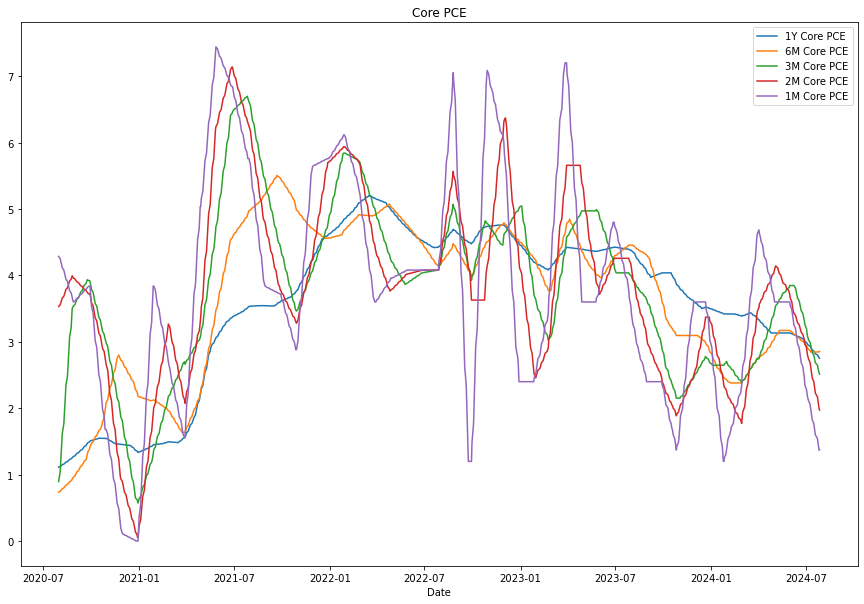

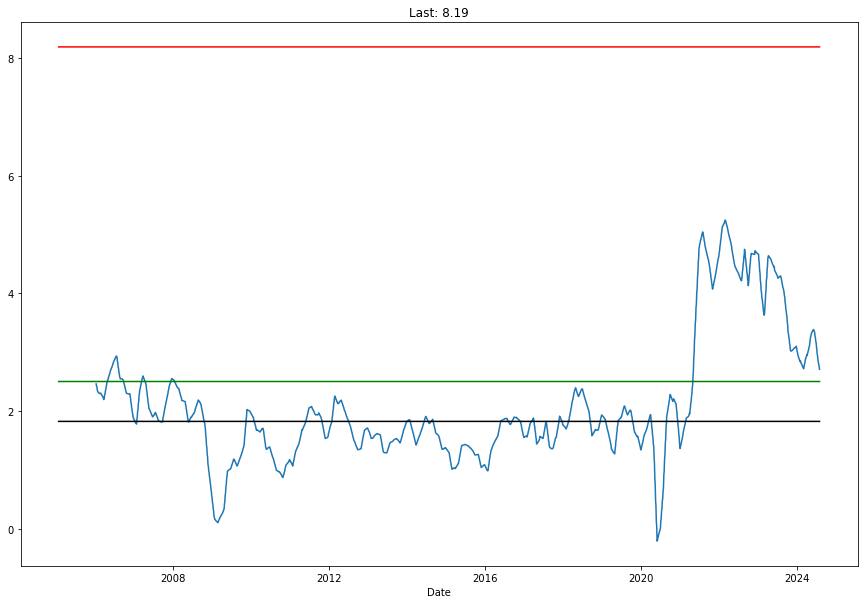

In [23]:
#JPOW INFLATION TRACKER (CORE PCE AVG(3, 6, 12M))

country_macro_df_name = 'us_macro'
query_macro = "SELECT * FROM " + country_macro_df_name
country_macro_df = pd.read_sql_query(query_macro, engine)
country_macro_df = Set_DF(country_macro_df)
country_macro_df = DD_Index(country_macro_df)

start = today + timedelta(1)
if (start.weekday() == 6):
    start = start + timedelta(1)
if (start.weekday() == 5):
    start = start + timedelta(2)
    
ind = 'CORE PCE PRICE INDEX MOM'

new_value = float(input('Enter New Value: '))

new_period = pd.date_range(start, start + timedelta(30), freq = 'B').date
new_series = pd.DataFrame(new_value, index = new_period, columns = [ind])

current_series = country_macro_df[ind].sort_index()
current_zerofilled_series = pd.concat([new_series[ind], country_macro_df[ind]]).sort_index()
#current_series = current_zerofilled_series

plt.figure(0)
(current_series.rolling(252).mean() * 12)[-1000:].plot(figsize = (15,10), label = '1Y Core PCE', title = 'Core PCE').legend()
(current_series.rolling(126).mean() * 12)[-1000:].plot(figsize = (15,10), label = '6M Core PCE').legend()
(current_series.rolling(63).mean() * 12)[-1000:].plot(figsize = (15,10), label = '3M Core PCE').legend()
(current_series.rolling(42).mean() * 12)[-1000:].plot(figsize = (15,10), label = '2M Core PCE').legend()
(current_series.rolling(21).mean() * 12)[-1000:].plot(figsize = (15,10), label = '1M Core PCE').legend()
print('Forecasts:')
print('')
print('1Y: ' + str(round((current_series.rolling(252).mean() * 12)[-1], 2)))
print('6M: ' + str(round((current_series.rolling(126).mean() * 12)[-1], 2)))
print('3M: ' + str(round((current_series.rolling(63).mean() * 12)[-1], 2)))
print('2M: ' + str(round((current_series.rolling(42).mean() * 12)[-1], 2)))
print('1M: ' + str(round((current_series.rolling(21).mean() * 12)[-1], 2)))
blend = (1 / 3) * ((current_series.rolling(252).mean() * 12)[-1] + (current_series.rolling(126).mean() * 12)[-1] + (current_series.rolling(63).mean() * 12)[-1])
print('JPow blend: ' + str(round(blend, 2)))
print('')

plt.figure(1, figsize = (15,10))
jpow_series = ((1 / 3) * ((current_series.rolling(252).mean() * 12) + (current_series.rolling(126).mean() * 12) + (current_series.rolling(63).mean() * 12)))
jpow_zf_series = ((1 / 3) * ((current_zerofilled_series.rolling(252).mean() * 12) + (current_zerofilled_series.rolling(126).mean() * 12) + (current_zerofilled_series.rolling(63).mean() * 12)))
jpow_series.plot()
series_median = jpow_series.median()
x_len = len(jpow_series)
x_array = jpow_series.index
y_target_array = np.array([2.5] * x_len)
y_median_array = np.array([series_median] * x_len)
last_zf = jpow_zf_series[-1]
y_zf_array = np.array([last_zf] * x_len)
plt.plot(x_array, y_target_array, c = 'g')
plt.plot(x_array, y_median_array, c = 'k')
plt.plot(x_array, y_zf_array, c = 'r')
plt.title('Last: ' + str(round(last_zf, 2)))

Enter more recent values? (Y/y or empty) 


Text(0.5, 1.0, 'G (% GDP), 1949 - Present, R2=44.01')

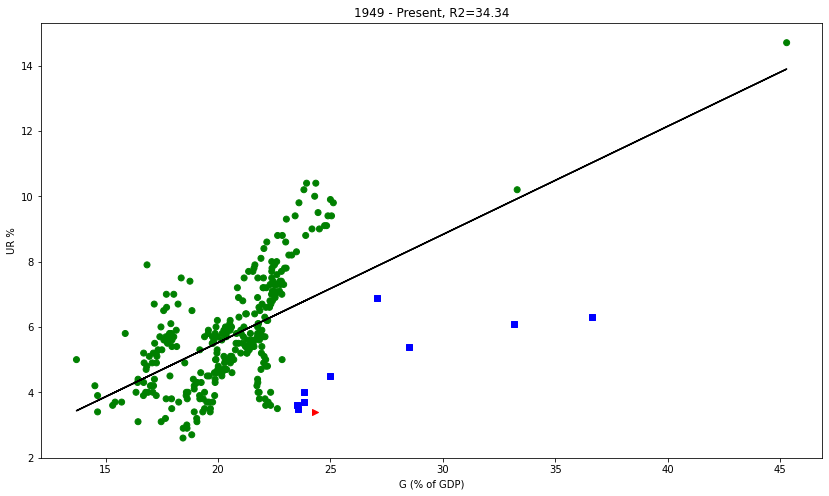

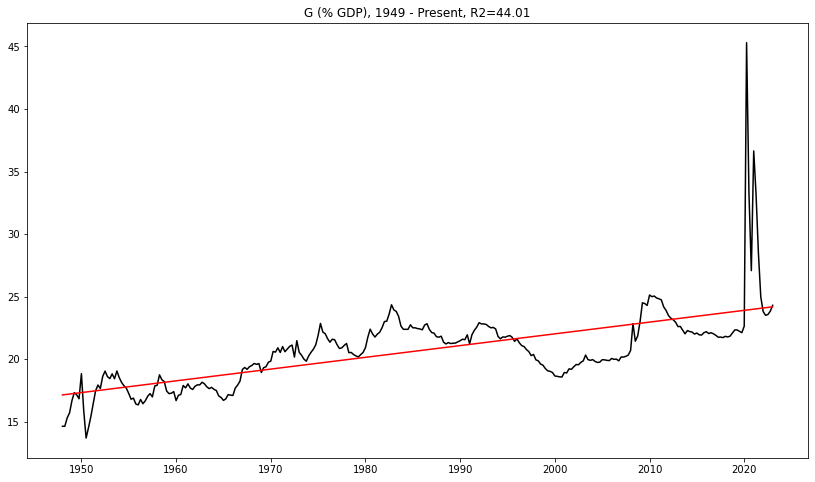

In [83]:
## ECO STUDY: GOVT EXPENDITURES VS UR

from sklearn.linear_model import LinearRegression
to_date = lambda x: datetime(x.year, x.month, x.day)

markers = ['o', 's', '>', '<']

URG_base = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\UR_vs_G.csv")
URG_df = pd.DataFrame(URG_base)
URG_df = Set_DF(URG_df)
URG_df = DD_Index(URG_df)
URG_df.index = URG_df.T.columns.map(lambda x: datetime.strptime(x, "%Y-%m-%d").date())

enter_l = input('Enter more recent values? (Y/y or empty) ').upper()
if (enter_l == 'Y'):
    ur_last = URG_df.iloc[-1]['UNRATE']
    g_last = URG_df.iloc[-1]['FGEXPND_GDP']
    URG_df.loc[today] = np.nan
    ur = input('Enter UR (last: ' + str(ur_last) + '): (empty to repeat last) ')
    if (ur == ''):
        URG_df.loc[today, 'UNRATE'] = ur_last
    else:
        URG_df.loc[today, 'UNRATE'] = float(ur)
    g = input('Enter G (last: ' + str(g_last) + '): (empty to repeat last) ')
    if (g == ''):
        URG_df.loc[today, 'FGEXPND_GDP'] = g_last
    else:
        URG_df.loc[today, 'FGEXPND_GDP'] = float(g)  
        
URG_df['SHAPES'] = 0
URG_df.loc[URG_df.index[-10: ], 'SHAPES'] = 1
URG_df.loc[URG_df.index[-1], 'SHAPES'] = 2
URG_df['COLORS'] = 'g'
URG_df.loc[URG_df.index[-10: ], 'COLORS'] = 'b'
URG_df.loc[URG_df.index[-1], 'COLORS'] = 'r'

figs = plt.figure(figsize = (14, 8))
axs = figs.add_subplot(1, 1, 1)
shape_list = pd.unique(URG_df['SHAPES']).tolist()

for curr_shape in shape_list:
    axs.scatter(URG_df[URG_df['SHAPES'] == curr_shape]['FGEXPND_GDP'], URG_df[URG_df['SHAPES'] == curr_shape]['UNRATE'], marker = markers[curr_shape], c = URG_df[URG_df['SHAPES'] == curr_shape]['COLORS'])

x_array = np.array(URG_df['FGEXPND_GDP']).reshape(-1, 1)
y_array = np.array(URG_df['UNRATE'])
model = LinearRegression().fit(x_array, y_array)
r_sq = model.score(x_array, y_array)
y0 = model.intercept_
growth = model.coef_[0]
r2_curr = round(100 * r_sq, 2)
axs.plot(x_array, y0 + model.coef_[0] * x_array, c = 'k', label = str(r2_curr))
plt.title('1949 - Present, R2=' + str(r2_curr))
plt.ylabel('UR %')
plt.xlabel('G (% of GDP)')

figg = plt.figure(figsize = (14, 8))
axg = figg.add_subplot(1, 1, 1)
axg.plot(URG_df['FGEXPND_GDP'], c = 'k')

g_x_array = np.arange(len(URG_df.index)).reshape(-1, 1)
g_y_array = np.array(URG_df['FGEXPND_GDP'])
g_model = LinearRegression().fit(g_x_array, g_y_array)
g_r_sq = g_model.score(g_x_array, g_y_array)
g_y0 = g_model.intercept_
g_growth = g_model.coef_[0]
g_r2_curr = round(100 * g_r_sq, 2)
axg.plot(URG_df.index, g_y0 + g_model.coef_[0] * g_x_array, c = 'r')

plt.title('G (% GDP), 1949 - Present, R2=' + str(g_r2_curr))

Enter more recent values? (Y/y or empty) 


Text(0.5, 1.0, 'National Savings, 1959 - Present, R2=44.7')

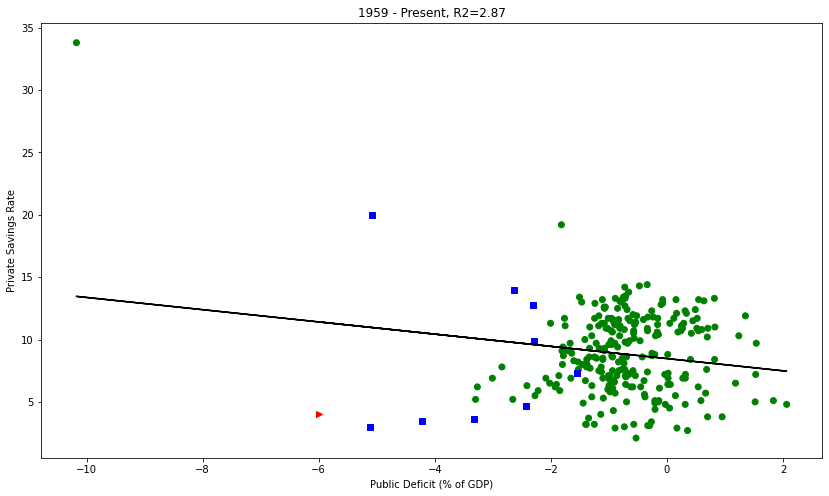

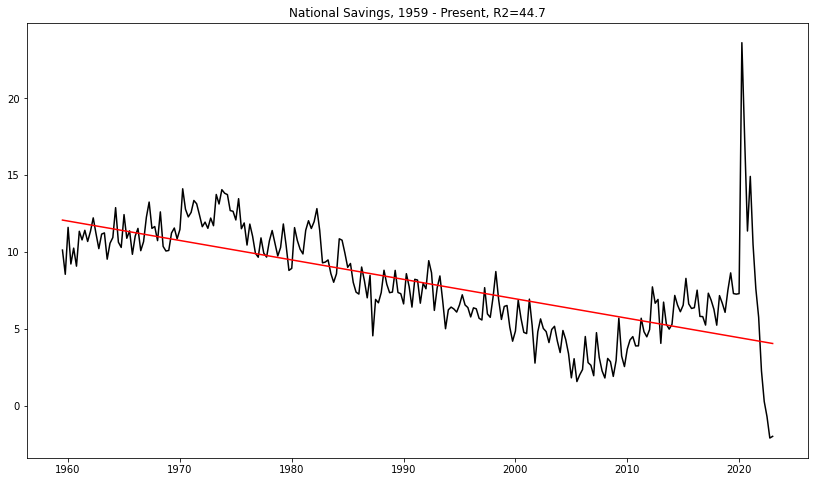

In [98]:
## ECO STUDY: PRIVATE VS PUBLIC SAVINGS

from sklearn.linear_model import LinearRegression
to_date = lambda x: datetime(x.year, x.month, x.day)

markers = ['o', 's', '>', '<']

URG_base = pd.read_csv(r"C:\Users\Utilizador\OneDrive\Documentos\Malta\Systematic\Public_vs_Private_S.csv")
URG_df = pd.DataFrame(URG_base)
URG_df = Set_DF(URG_df)
URG_df = DD_Index(URG_df)
URG_df.index = URG_df.T.columns.map(lambda x: datetime.strptime(x, "%m/%d/%Y").date())

enter_l = input('Enter more recent values? (Y/y or empty) ').upper()
if (enter_l == 'Y'):
    pu_last = URG_df.iloc[-1]['PUBLIC DEFICIT']
    pr_last = URG_df.iloc[-1]['PRIV S RATE']
    URG_df.loc[today] = np.nan
    pu = input('Enter Public D (last: ' + str(pu_last) + '): (empty to repeat last) ')
    if (ur == ''):
        URG_df.loc[today, 'PUBLIC DEFICIT'] = pu_last
    else:
        URG_df.loc[today, 'PUBLIC DEFICIT'] = float(pu)
    pr = input('Enter Priv S (last: ' + str(pr_last) + '): (empty to repeat last) ')
    if (g == ''):
        URG_df.loc[today, 'PRIV S RATE'] = pr_last
    else:
        URG_df.loc[today, 'PRIV S RATE'] = float(pr)  
        
URG_df['SHAPES'] = 0
URG_df.loc[URG_df.index[-10: ], 'SHAPES'] = 1
URG_df.loc[URG_df.index[-1], 'SHAPES'] = 2
URG_df['COLORS'] = 'g'
URG_df.loc[URG_df.index[-10: ], 'COLORS'] = 'b'
URG_df.loc[URG_df.index[-1], 'COLORS'] = 'r'

figs = plt.figure(figsize = (14, 8))
axs = figs.add_subplot(1, 1, 1)
shape_list = pd.unique(URG_df['SHAPES']).tolist()

for curr_shape in shape_list:
    axs.scatter(URG_df[URG_df['SHAPES'] == curr_shape]['PUBLIC DEFICIT'], URG_df[URG_df['SHAPES'] == curr_shape]['PRIV S RATE'], marker = markers[curr_shape], c = URG_df[URG_df['SHAPES'] == curr_shape]['COLORS'])

x_array = np.array(URG_df['PUBLIC DEFICIT']).reshape(-1, 1)
y_array = np.array(URG_df['PRIV S RATE'])
model = LinearRegression().fit(x_array, y_array)
r_sq = model.score(x_array, y_array)
y0 = model.intercept_
growth = model.coef_[0]
r2_curr = round(100 * r_sq, 2)
axs.plot(x_array, y0 + model.coef_[0] * x_array, c = 'k', label = str(r2_curr))
plt.title('1959 - Present, R2=' + str(r2_curr))
plt.ylabel('Private Savings Rate')
plt.xlabel('Public Deficit (% of GDP)')

URG_df['National Position'] = URG_df['PUBLIC DEFICIT'] + URG_df['PRIV S RATE']
figg = plt.figure(figsize = (14, 8))
axg = figg.add_subplot(1, 1, 1)
axg.plot(URG_df['National Position'], c = 'k')

g_x_array = np.arange(len(URG_df.index)).reshape(-1, 1)
g_y_array = np.array(URG_df['National Position'])
g_model = LinearRegression().fit(g_x_array, g_y_array)
g_r_sq = g_model.score(g_x_array, g_y_array)
g_y0 = g_model.intercept_
g_growth = g_model.coef_[0]
g_r2_curr = round(100 * g_r_sq, 2)
axg.plot(URG_df.index, g_y0 + g_model.coef_[0] * g_x_array, c = 'r')

plt.title('National Savings, 1959 - Present, R2=' + str(g_r2_curr))